# Travail réalisé par:
- Dhia eddine hizaoui
- Amine ayedi
- Roua zekri
- Molka chkir
- Khalil ayache
- Yousra chaieb

## buisness understanding
Developing predictive models capable of identifying patients at high risk of complications after a myocardial infarction.


## 2. Data Understanding

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('datasetP.csv', delimiter=';')

df.columns
df.head()

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  DLIT_AG  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0         0.0      7.0  ...          0           0         0          0   
1         0.0      0.0  ...          0           0         0          0   
2         0.0      2.0  ...          0           0         0          0   
3         0.0      3.0  ...          0           0         0          0   
4         0.0      7.0  ...          0           0         0          0   

   RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0       0         0    0       0          0       0  
1       0         0    0       0          0       0  
2       0         0    0       0          0       0  
3       0         0    1       0          0       0  
4       0         0    0       0          0       0  

[5 rows x 123 columns]

In [46]:
df.dtypes

AGE              float64
SEX                int64
INF_ANAM         float64
STENOK_AN        float64
FK_STENOK        float64
IBS_POST         float64
IBS_NASL         float64
GB               float64
SIM_GIPERT       float64
DLIT_AG          float64
ZSN_A            float64
nr_11            float64
nr_01            float64
nr_02            float64
nr_03            float64
nr_04            float64
nr_07            float64
nr_08            float64
np_01            float64
np_04            float64
np_05            float64
np_07            float64
np_08            float64
np_09            float64
np_10            float64
endocr_01        float64
endocr_02        float64
endocr_03        float64
zab_leg_01       float64
zab_leg_02       float64
zab_leg_03       float64
zab_leg_04       float64
zab_leg_06       float64
S_AD_KBRIG       float64
D_AD_KBRIG       float64
S_AD_ORIT        float64
D_AD_ORIT        float64
O_L_POST         float64
K_SH_POST        float64
MP_TP_POST       float64
SVT_POST         float64
GT_POST          float64
FIB_G_POST       float64
ant_im           float64
lat_im           float64
inf_im           float64
post_im          float64
IM_PG_P          float64
ritm_ecg_p_01    float64
ritm_ecg_p_02    float64
ritm_ecg_p_04    float64
ritm_ecg_p_06    float64
ritm_ecg_p_07    float64
ritm_ecg_p_08    float64
n_r_ecg_p_01     float64
n_r_ecg_p_02     float64
n_r_ecg_p_03     float64
n_r_ecg_p_04     float64
n_r_ecg_p_05     float64
n_r_ecg_p_06     float64
n_r_ecg_p_08     float64
n_r_ecg_p_09     float64
n_r_ecg_p_10     float64
n_p_ecg_p_01     float64
n_p_ecg_p_03     float64
n_p_ecg_p_04     float64
n_p_ecg_p_05     float64
n_p_ecg_p_06     float64
n_p_ecg_p_07     float64
n_p_ecg_p_08     float64
n_p_ecg_p_09     float64
n_p_ecg_p_10     float64
n_p_ecg_p_11     float64
n_p_ecg_p_12     float64
fibr_ter_01      float64
fibr_ter_02      float64
fibr_ter_03      float64
fibr_ter_05      float64
fibr_ter_06      float64
fibr_ter_07      float64
fibr_ter_08      float64
GIPO_K           float64
K_BLOOD          float64
GIPER_NA         float64
NA_BLOOD         float64
ALT_BLOOD        float64
AST_BLOOD        float64
KFK_BLOOD        float64
L_BLOOD          float64
ROE              float64
TIME_B_S         float64
R_AB_1_n         float64
R_AB_2_n         float64
R_AB_3_n         float64
NA_KB            float64
NOT_NA_KB        float64
LID_KB           float64
NITR_S           float64
NA_R_1_n         float64
NA_R_2_n         float64
NA_R_3_n         float64
NOT_NA_1_n       float64
NOT_NA_2_n       float64
NOT_NA_3_n       float64
LID_S_n          float64
B_BLOK_S_n       float64
ANT_CA_S_n       float64
GEPAR_S_n        float64
ASP_S_n          float64
TIKL_S_n         float64
TRENT_S_n        float64
FIBR_PREDS         int64
PREDS_TAH          int64
JELUD_TAH          int64
FIBR_JELUD         int64
A_V_BLOK           int64
OTEK_LANC          int64
RAZRIV             int64
DRESSLER           int64
ZSN                int64
REC_IM             int64
P_IM_STEN          int64
LET_IS             int64
dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


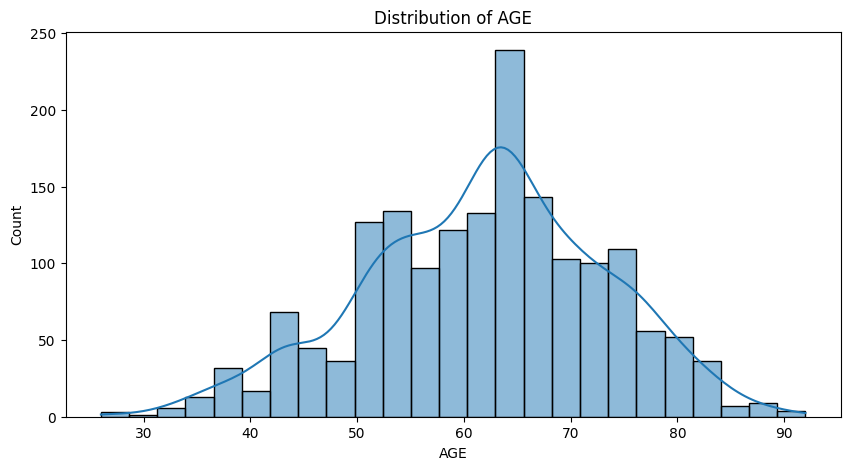

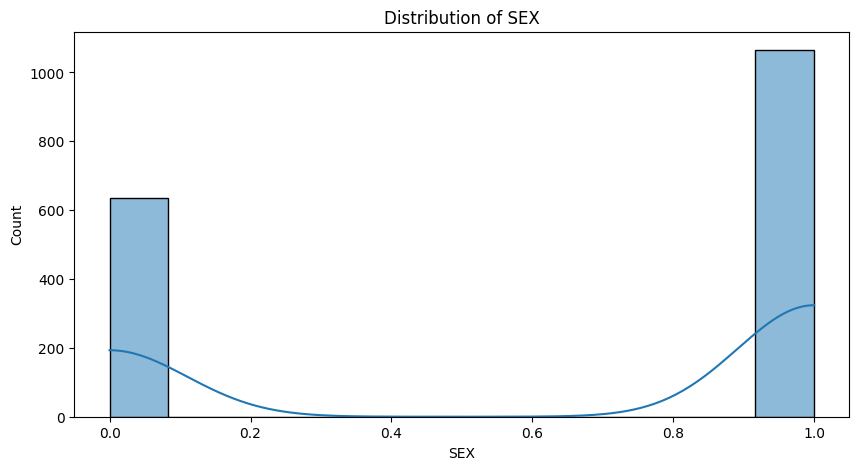

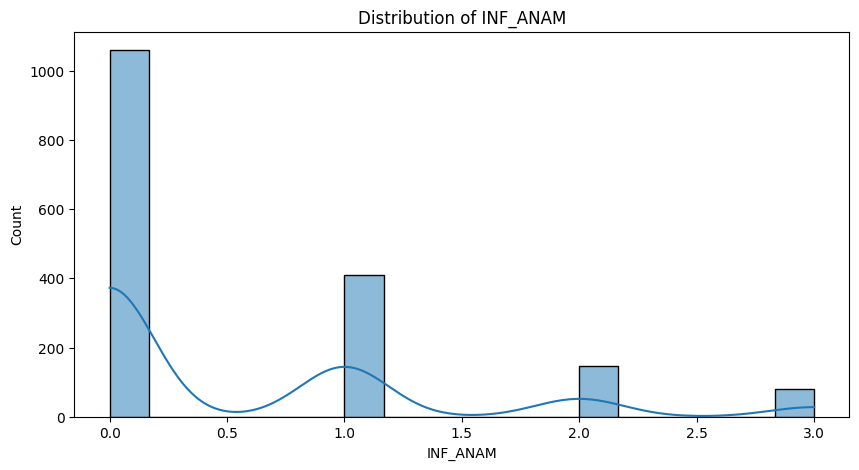

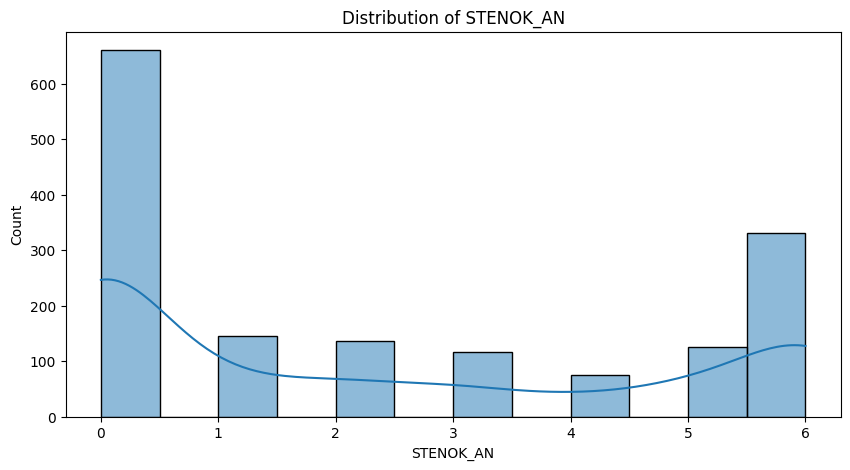

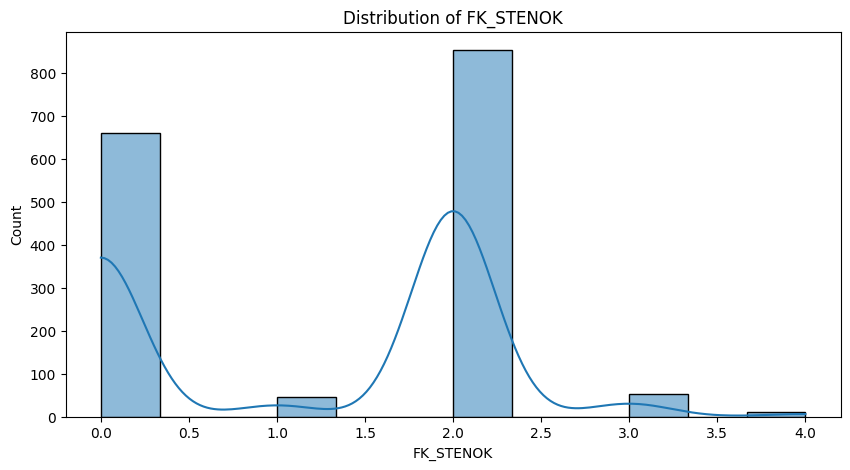

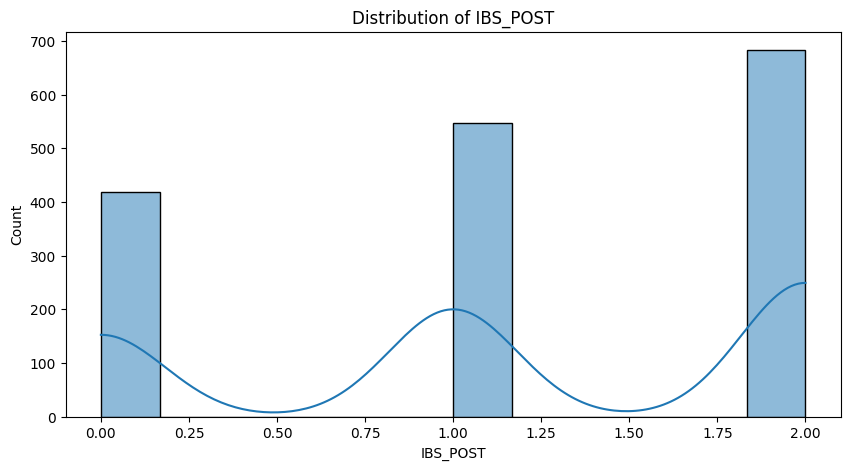

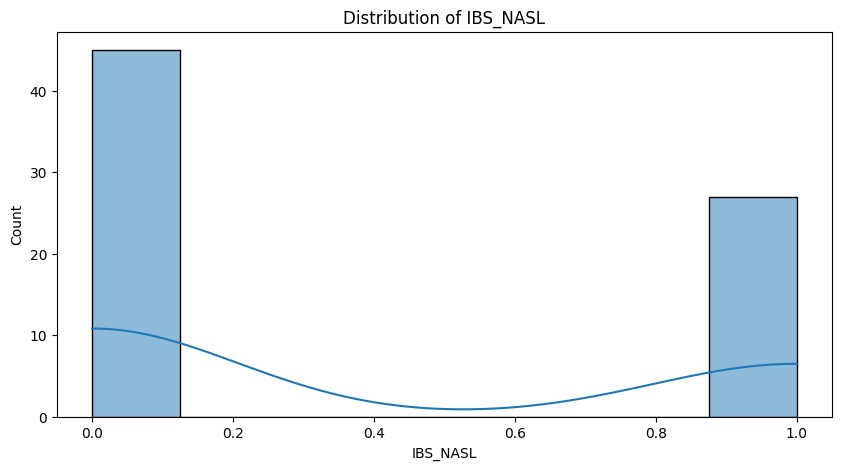

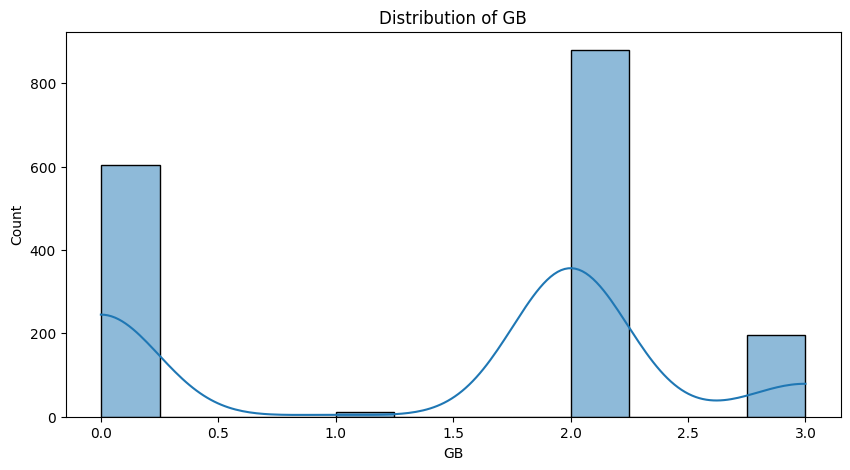

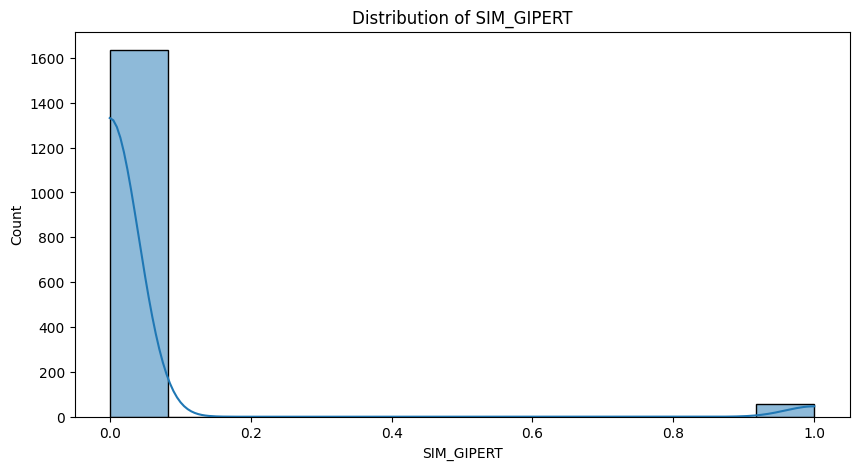

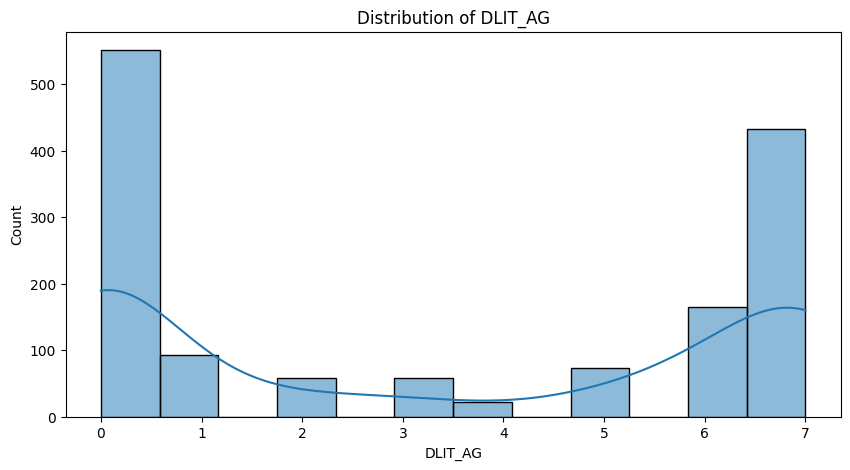

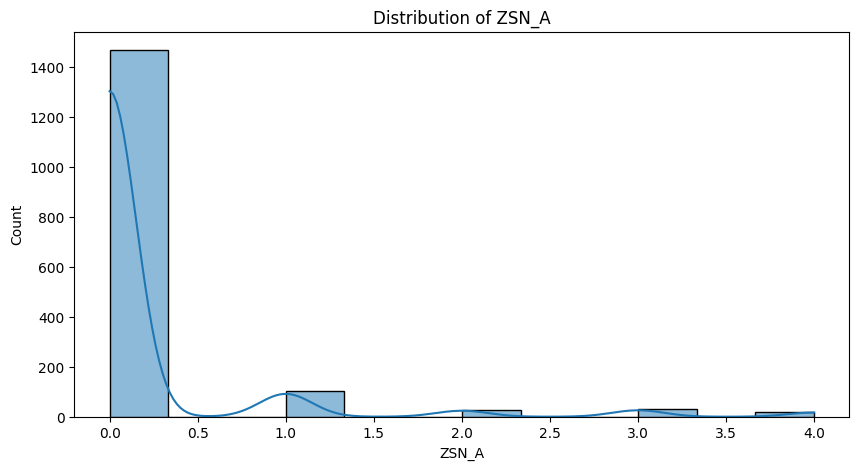

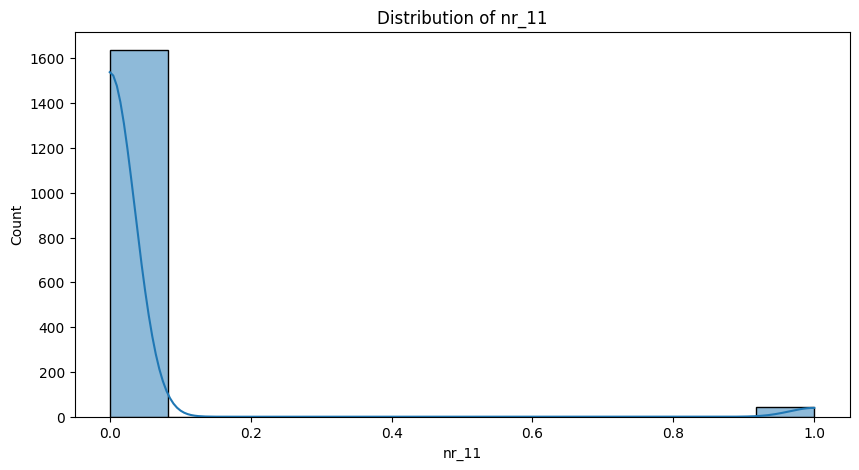

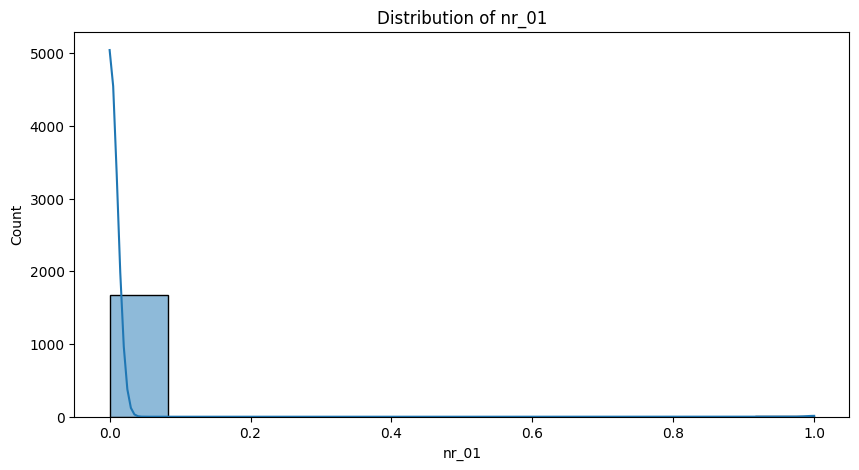

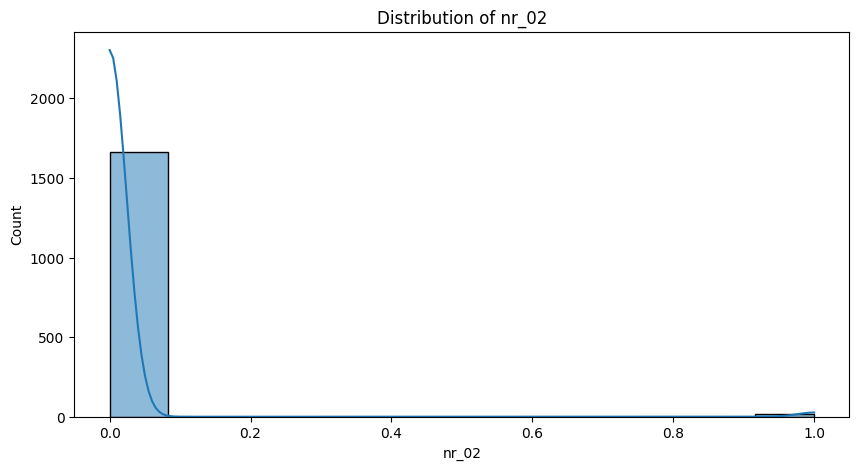

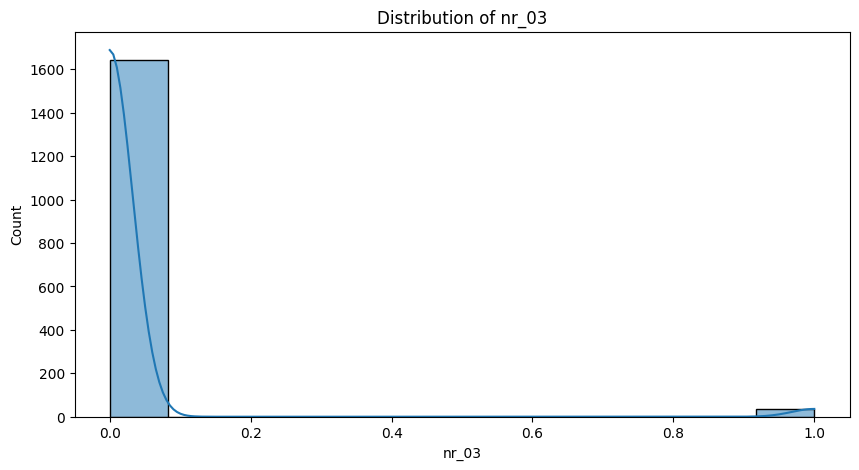

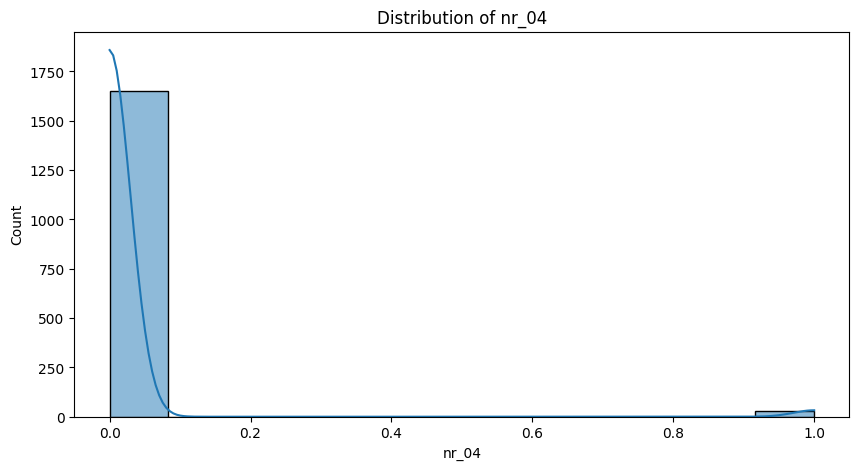

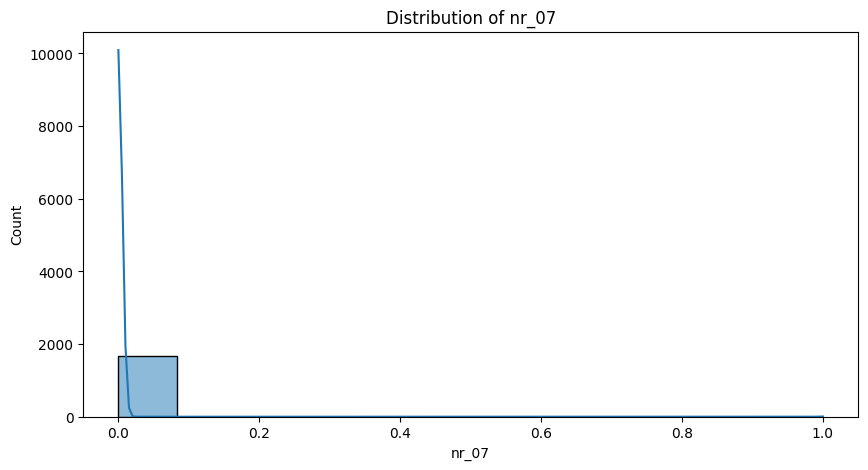

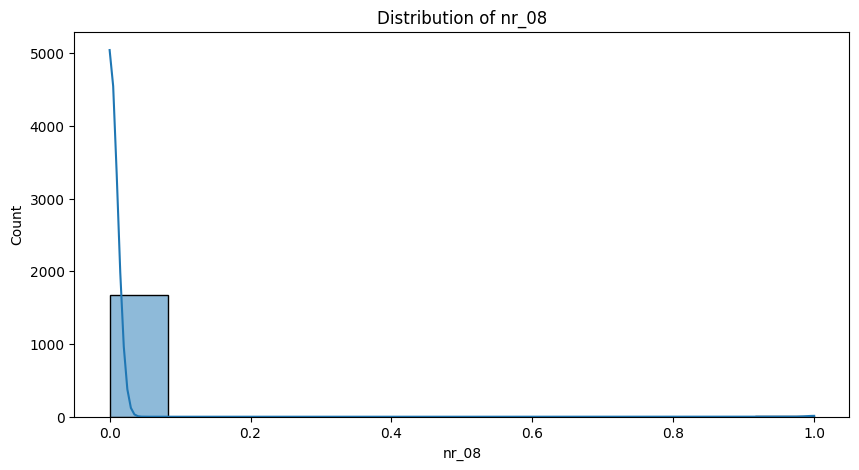

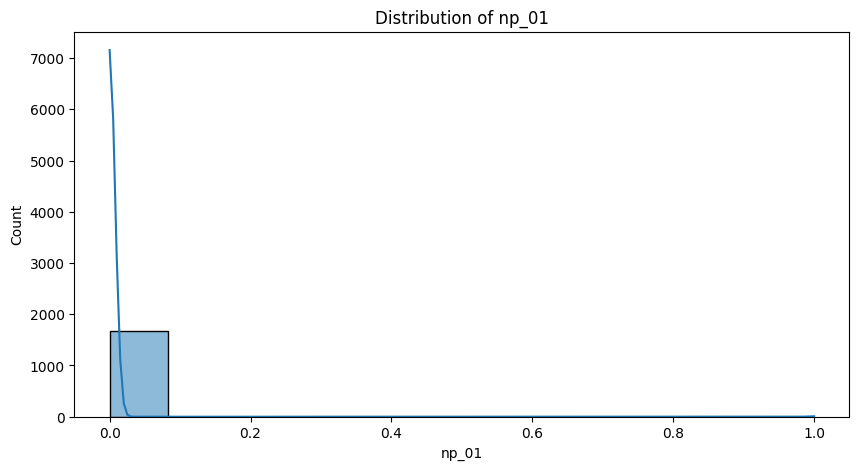

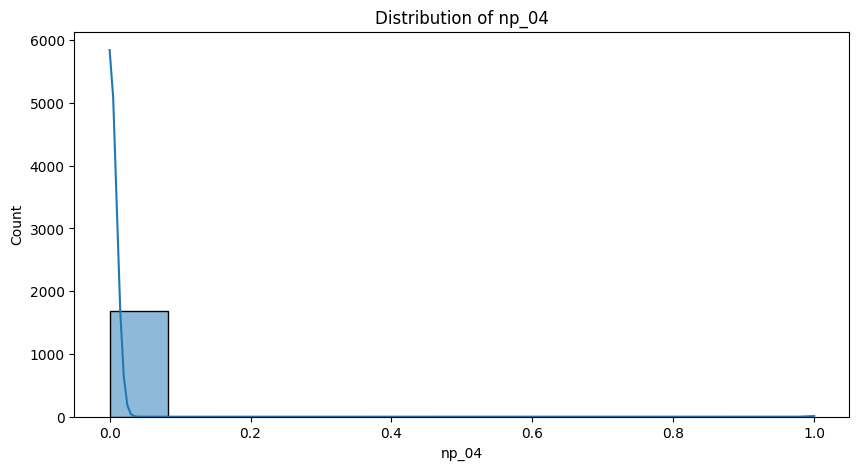

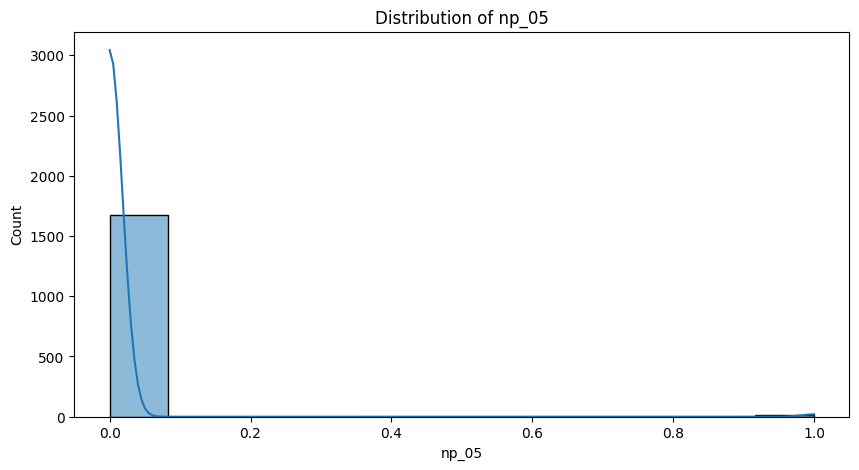

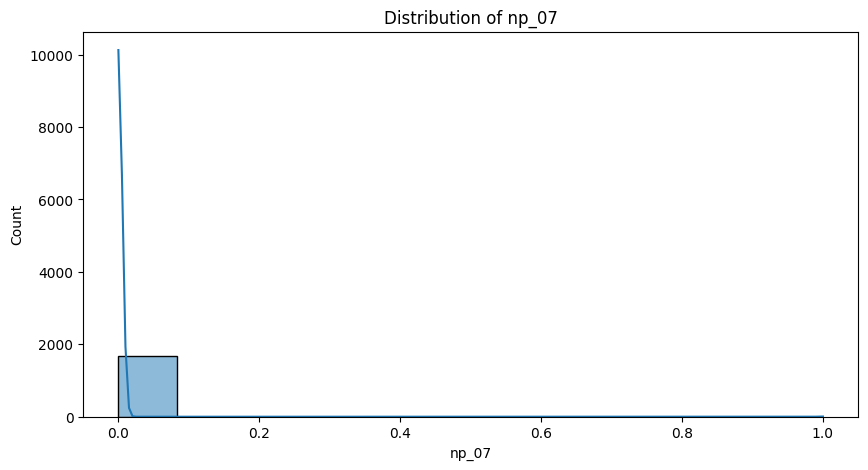

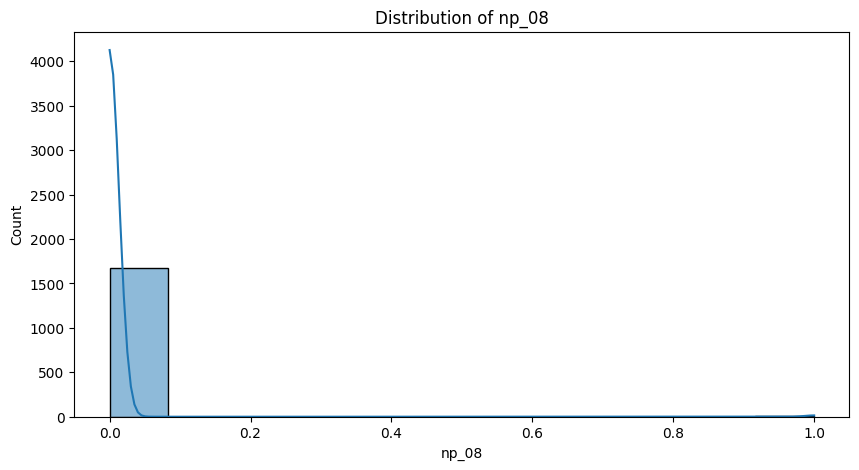

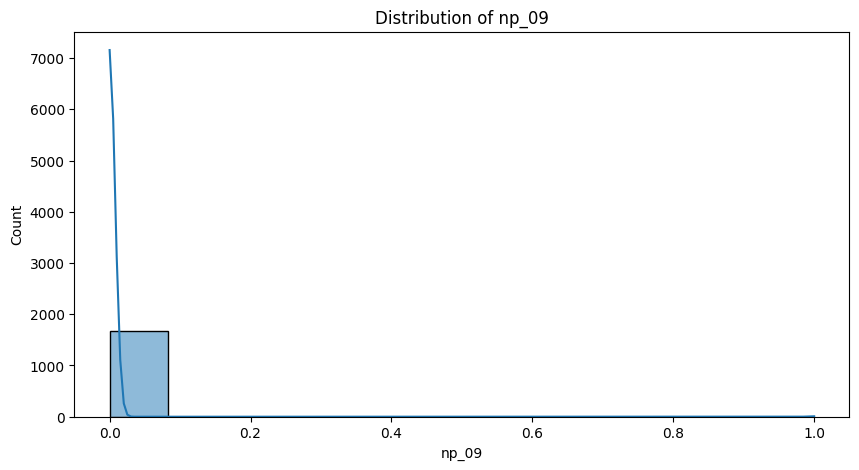

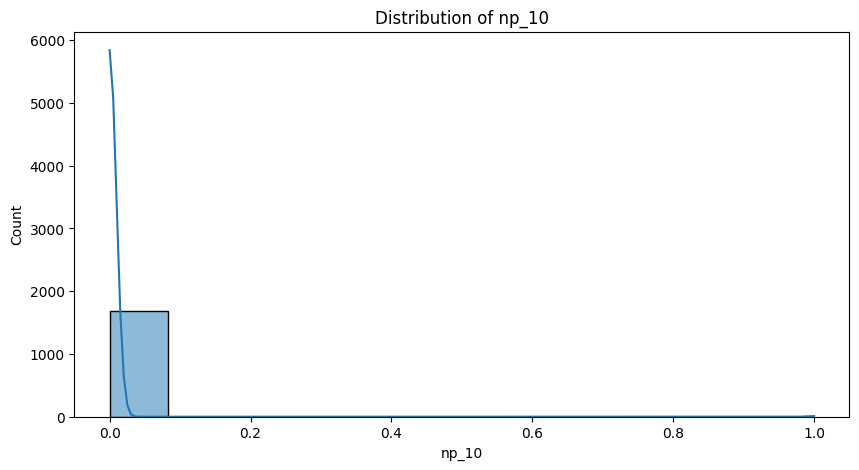

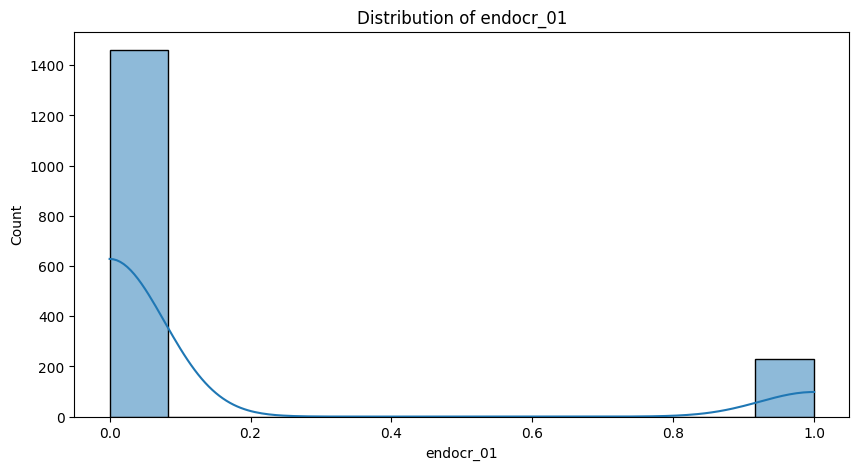

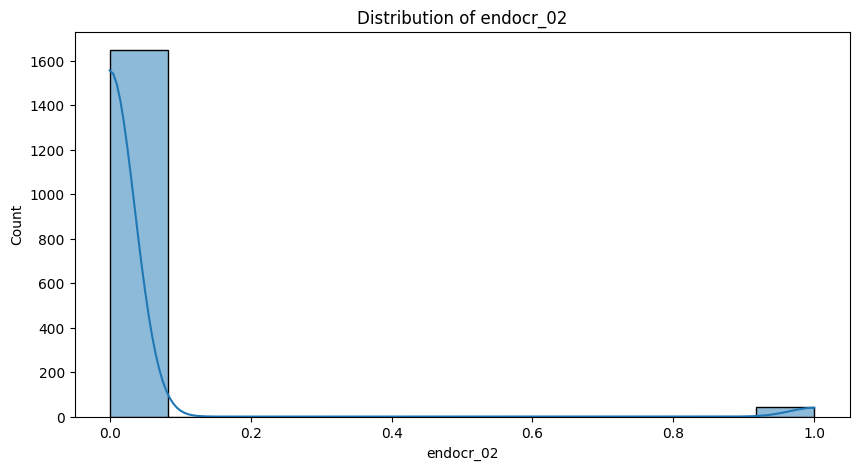

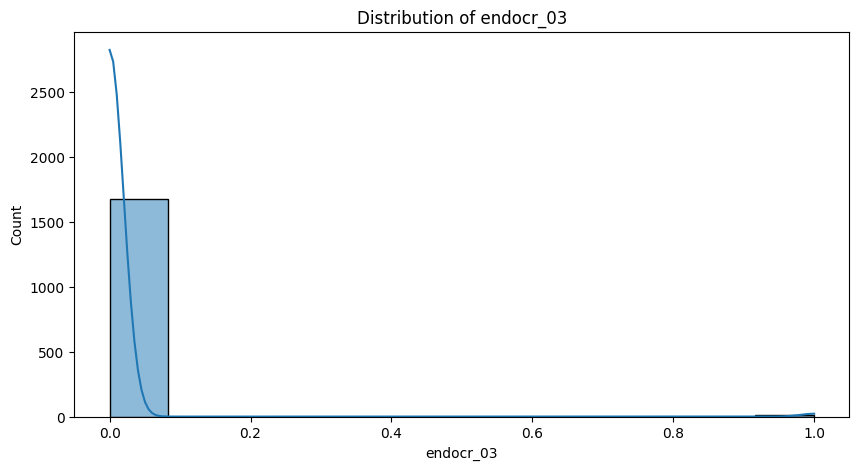

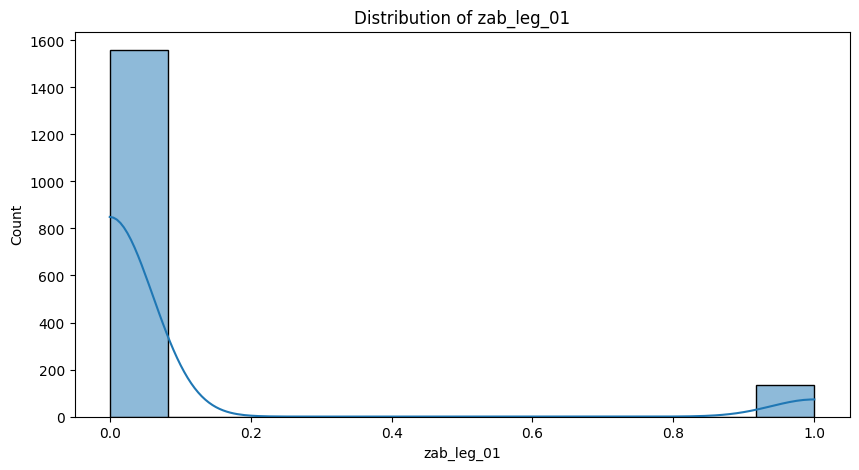

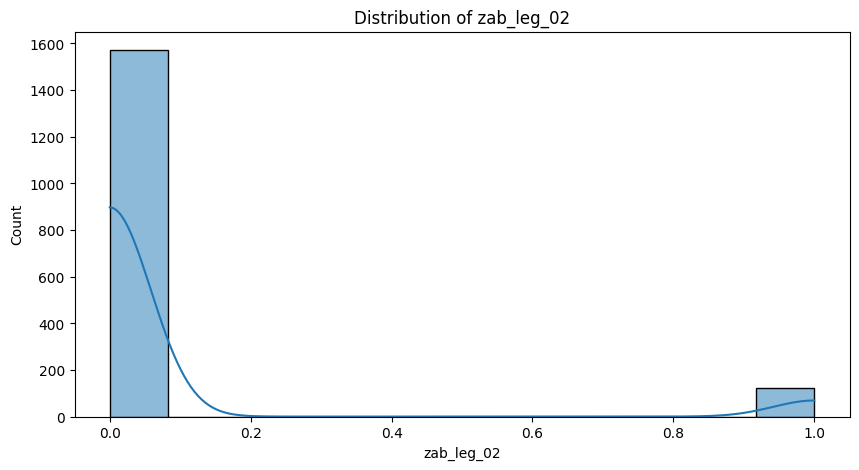

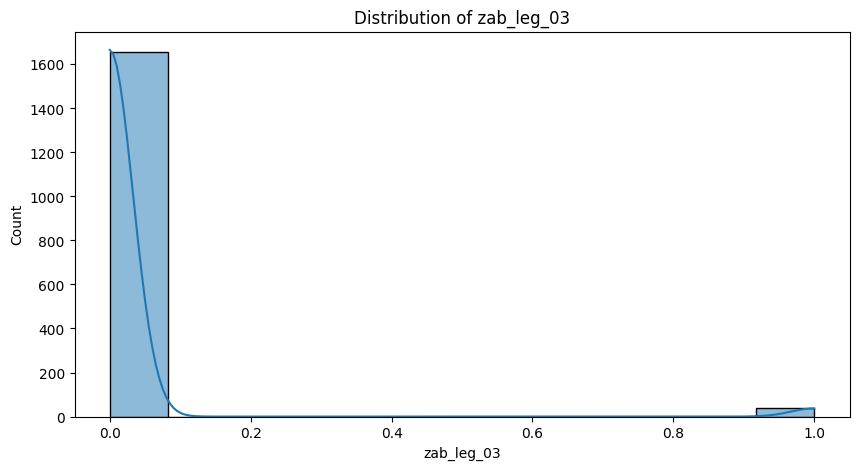

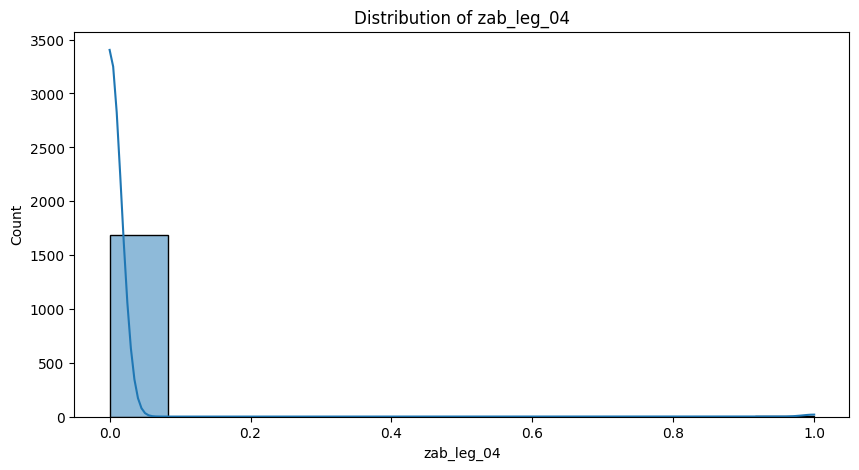

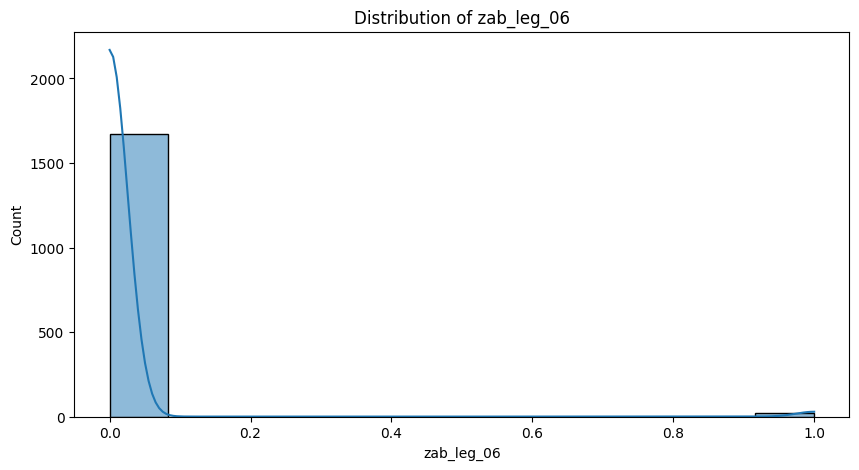

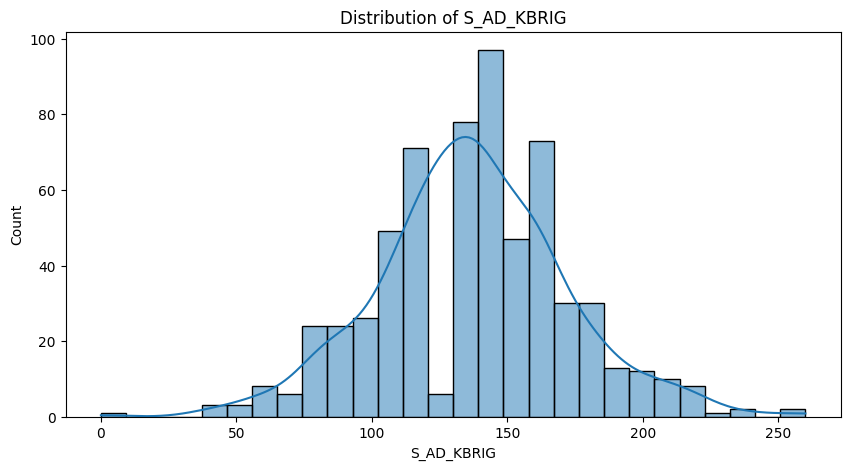

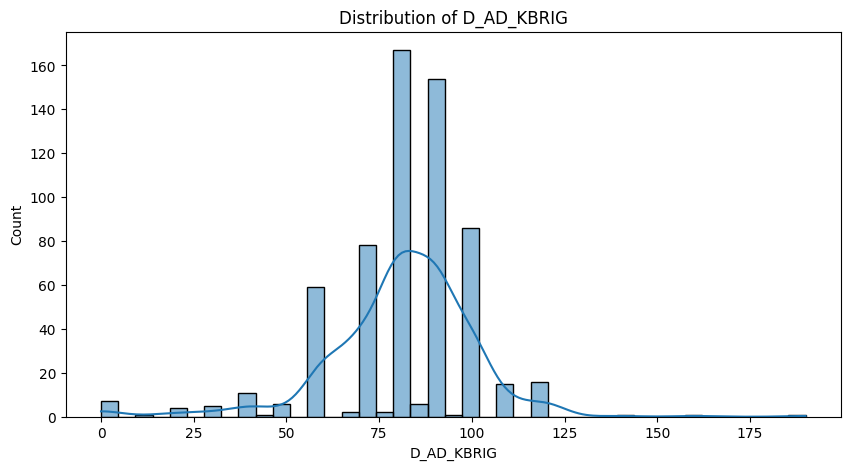

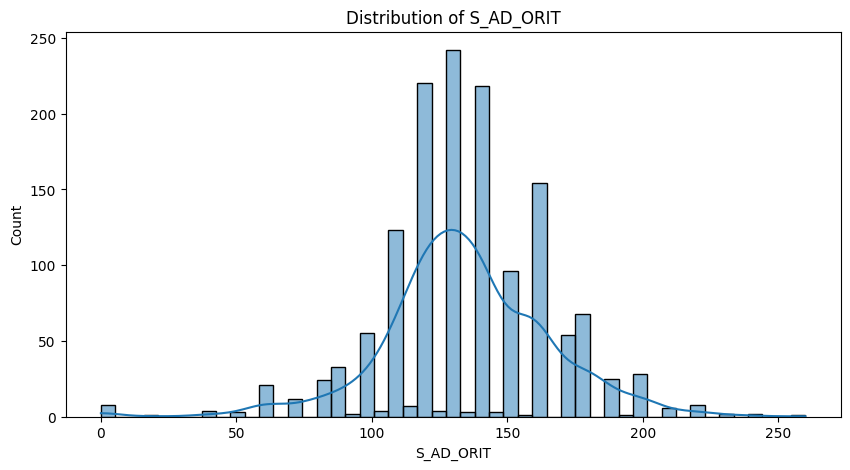

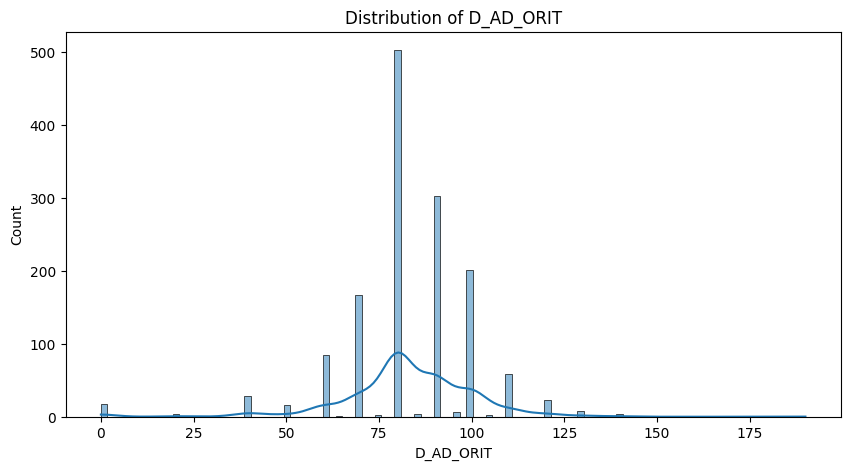

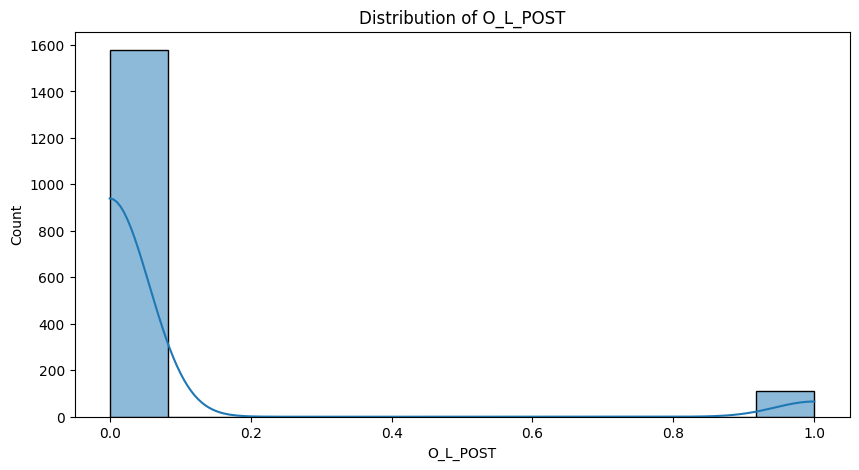

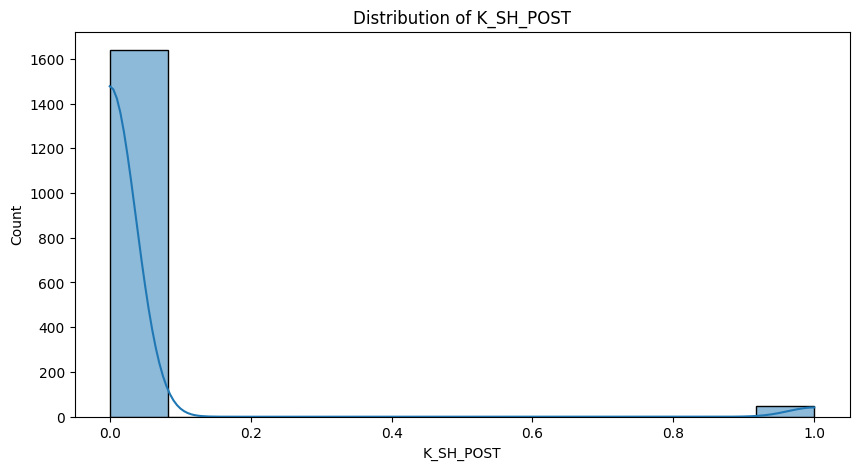

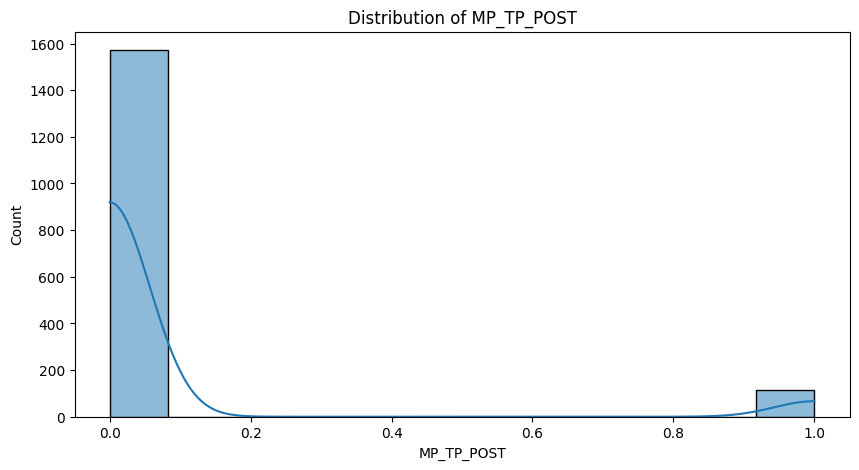

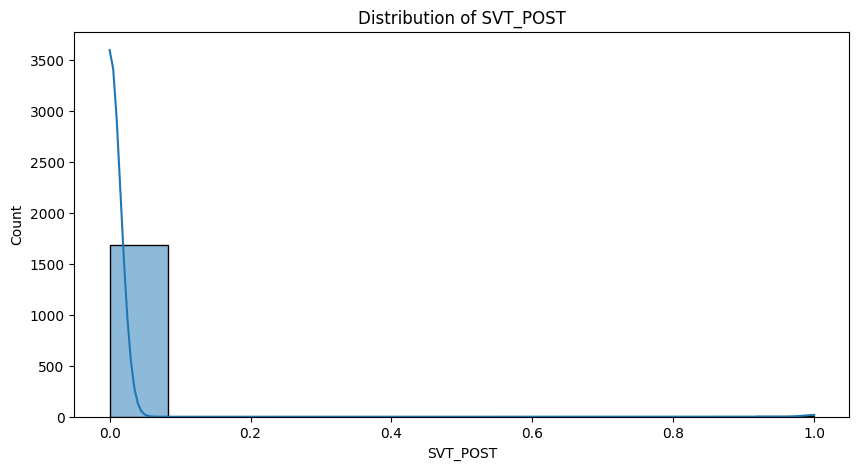

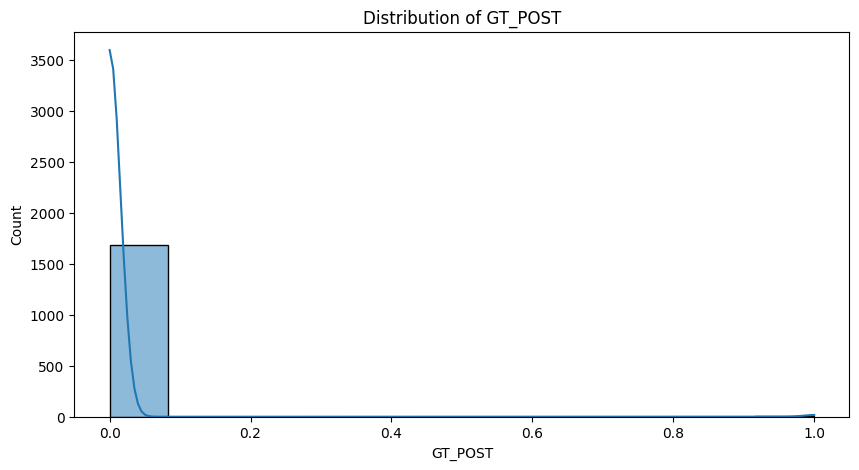

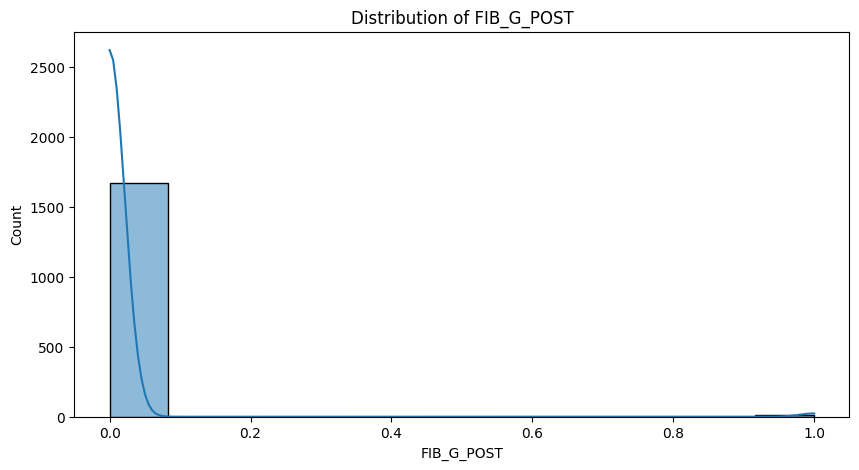

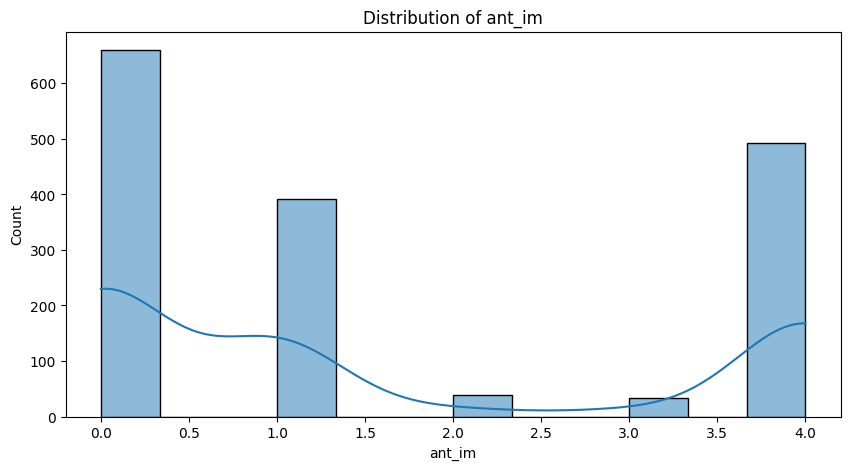

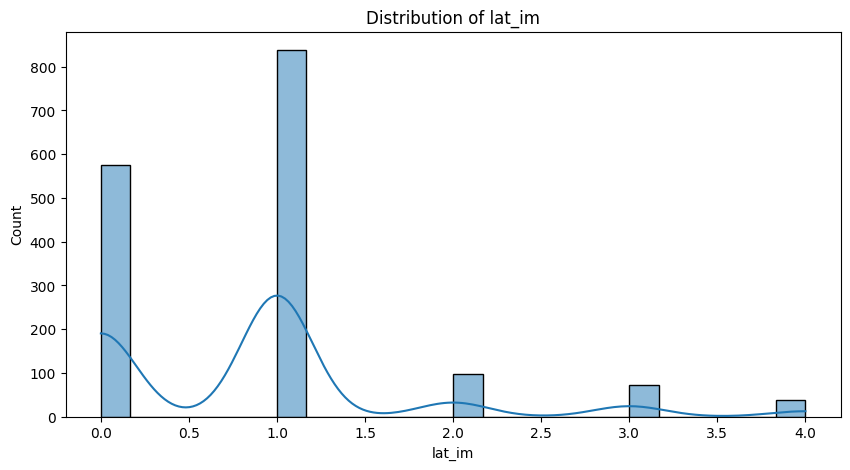

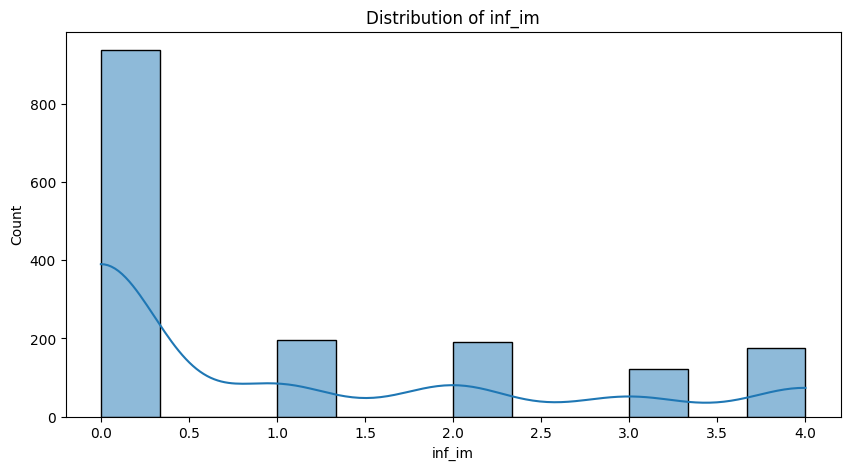

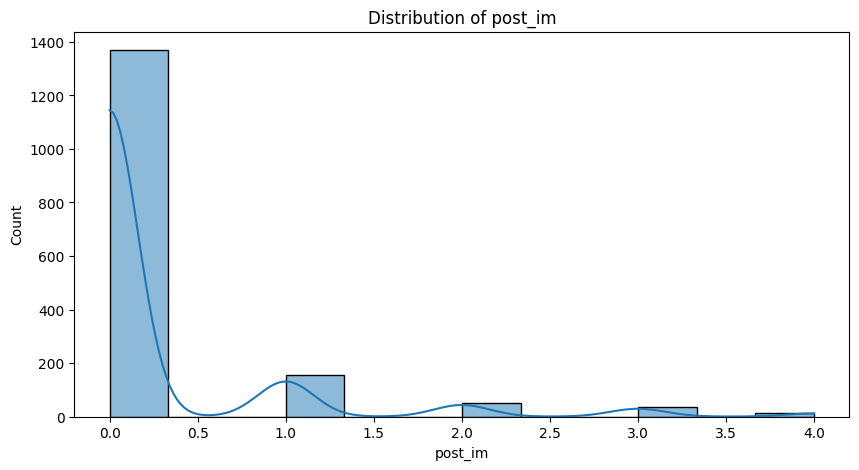

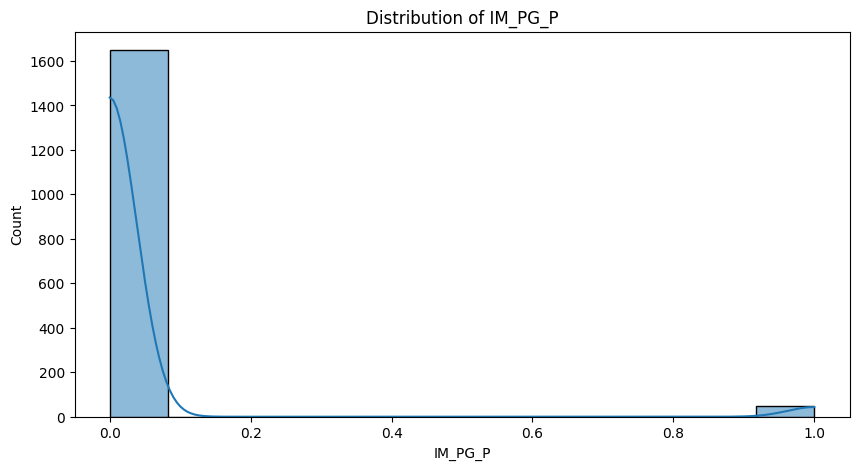

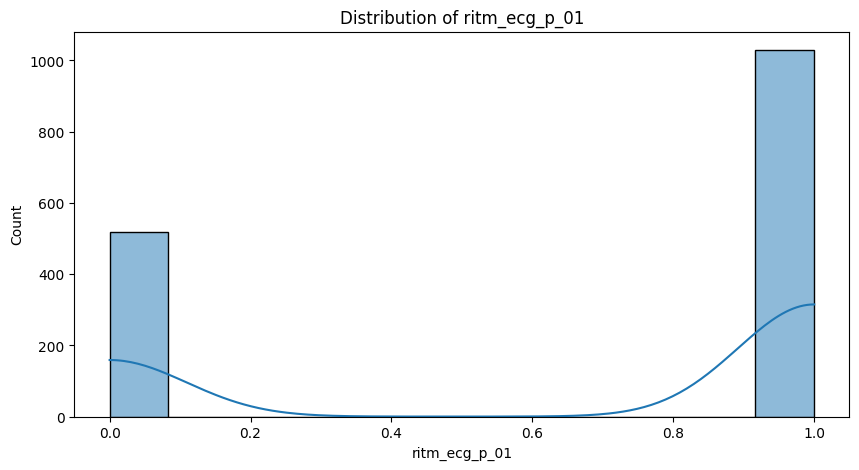

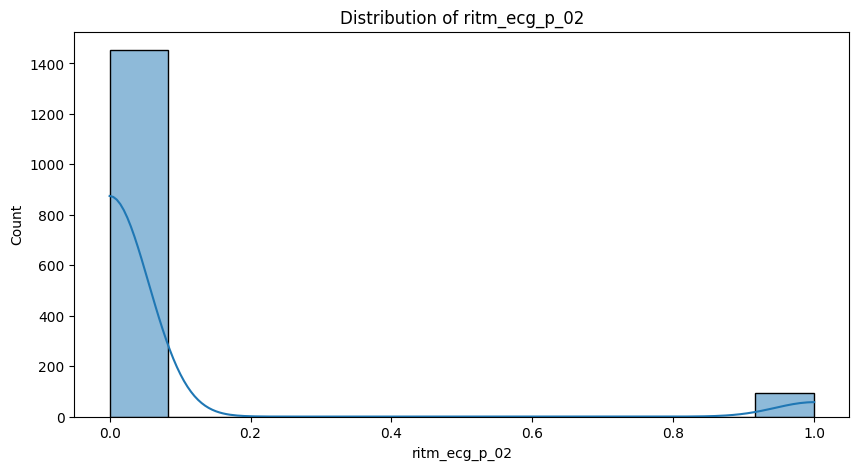

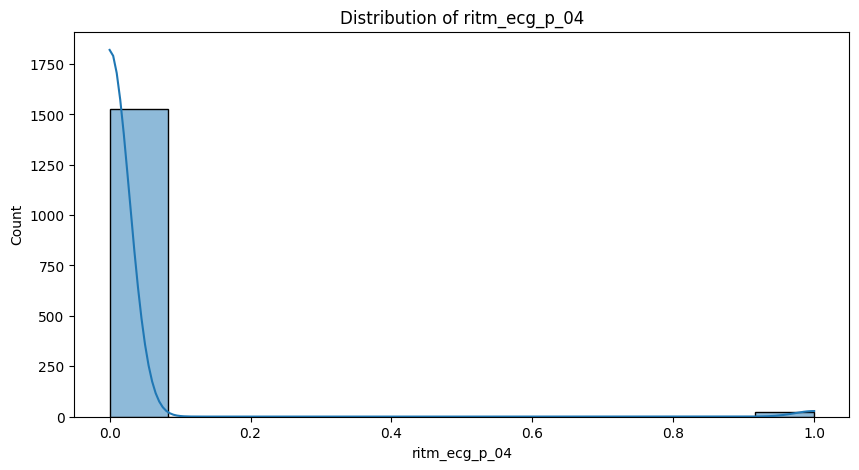

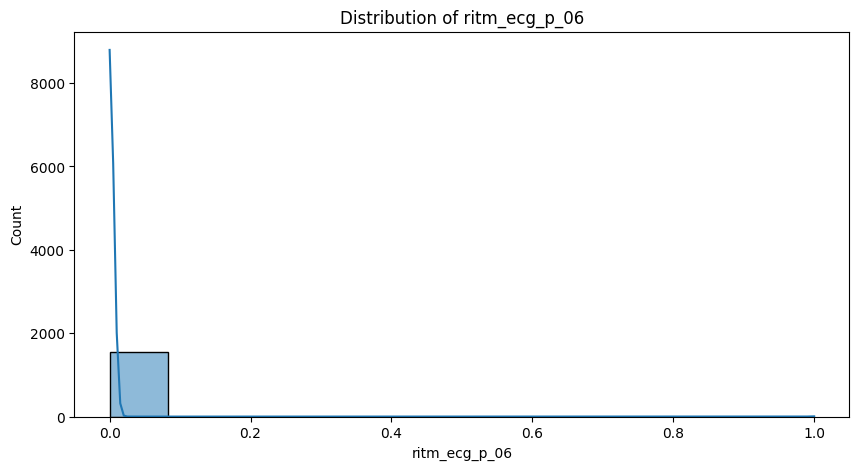

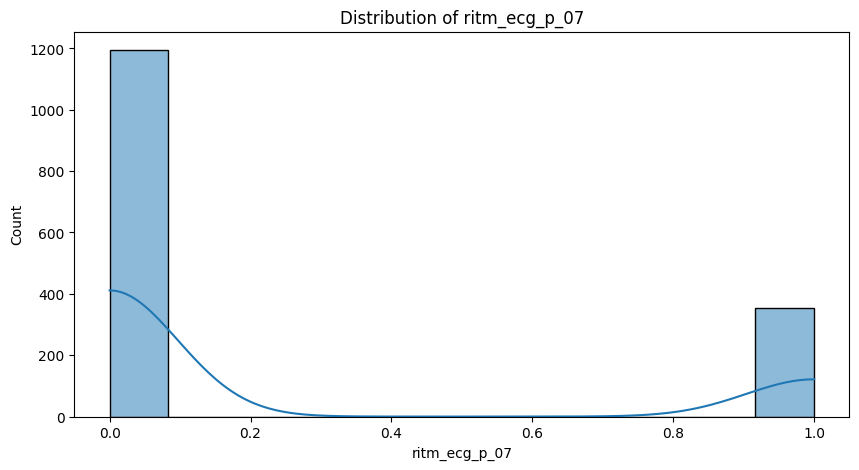

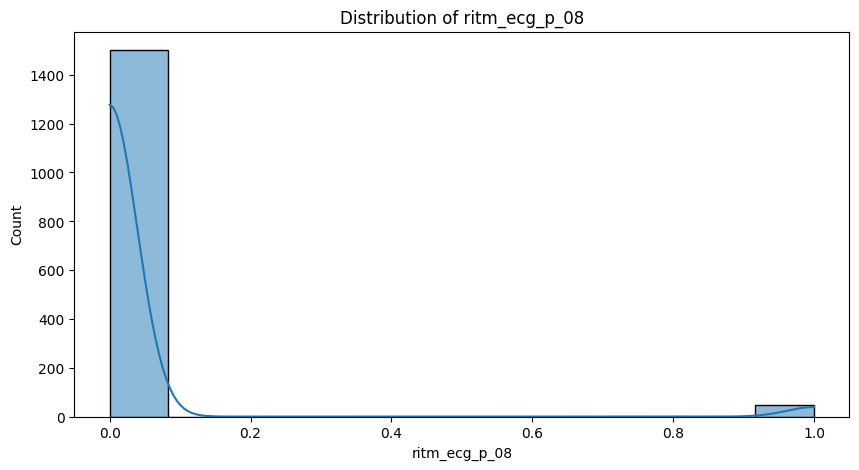

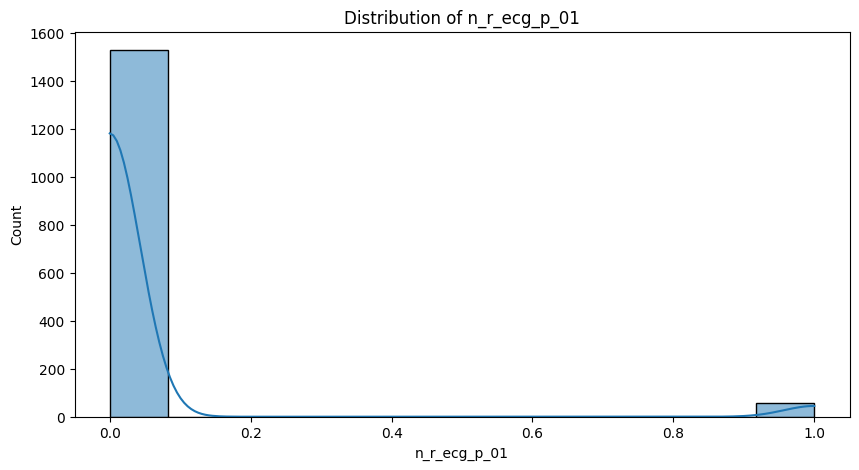

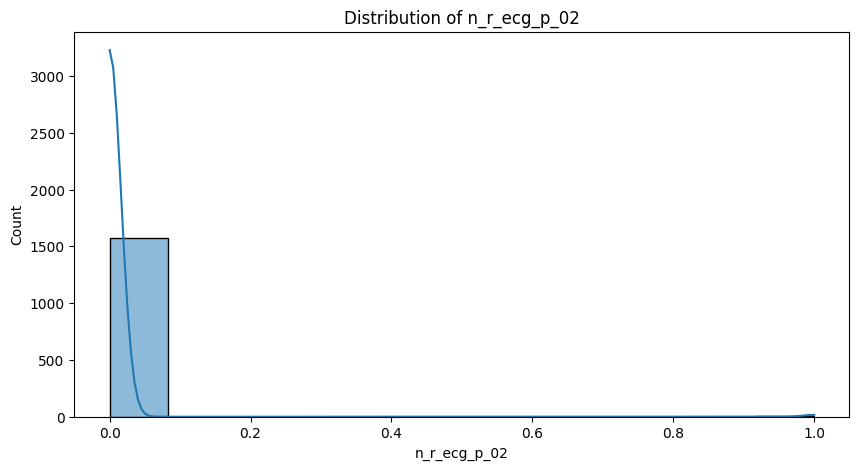

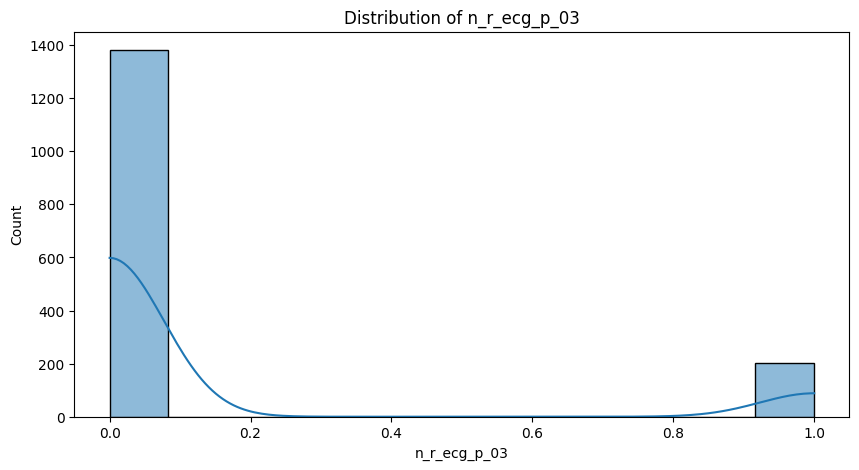

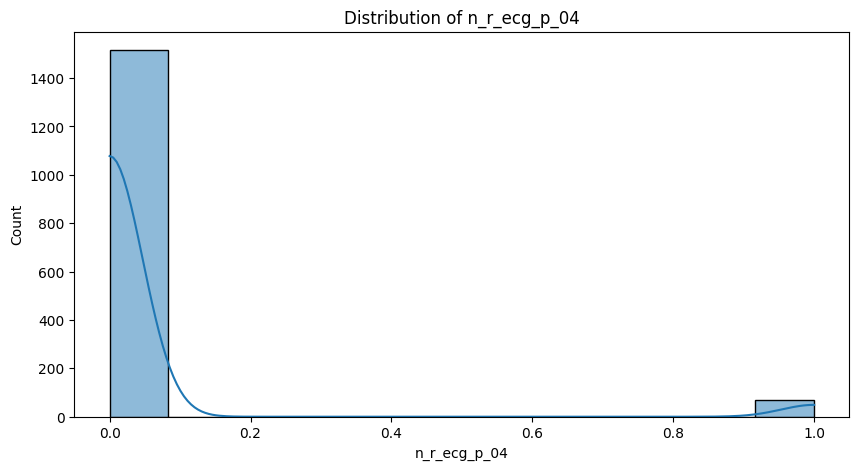

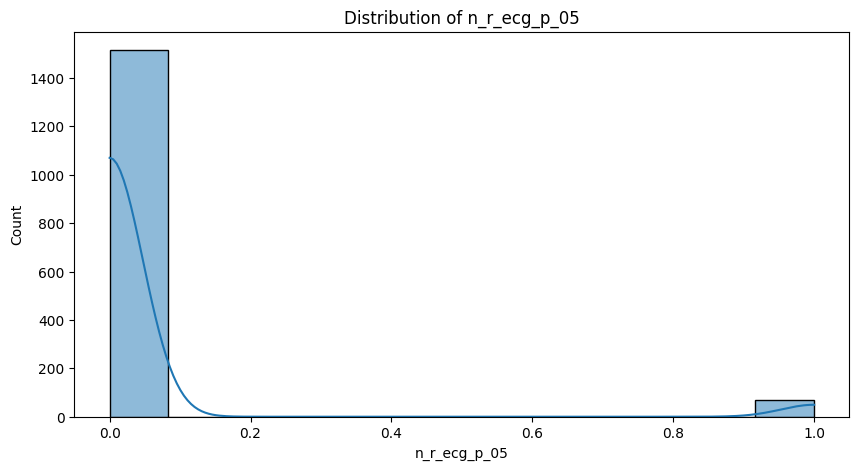

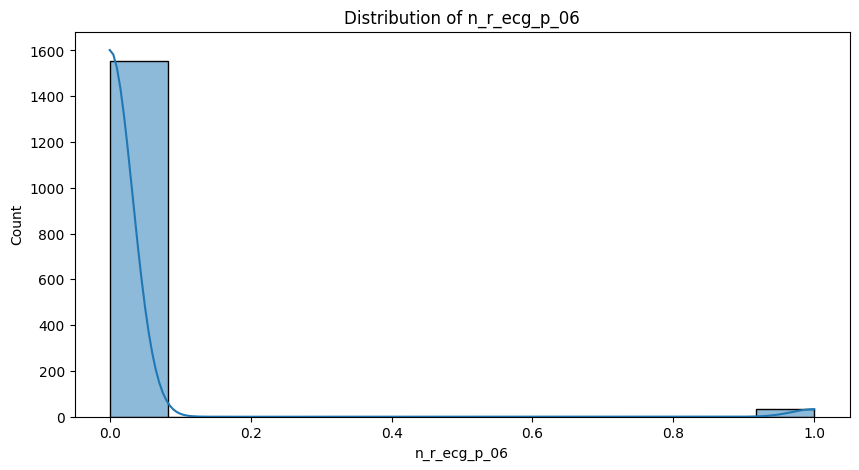

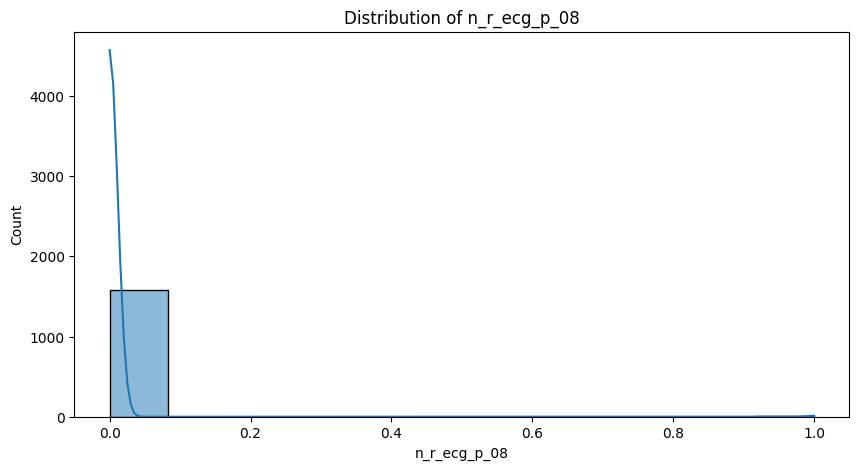

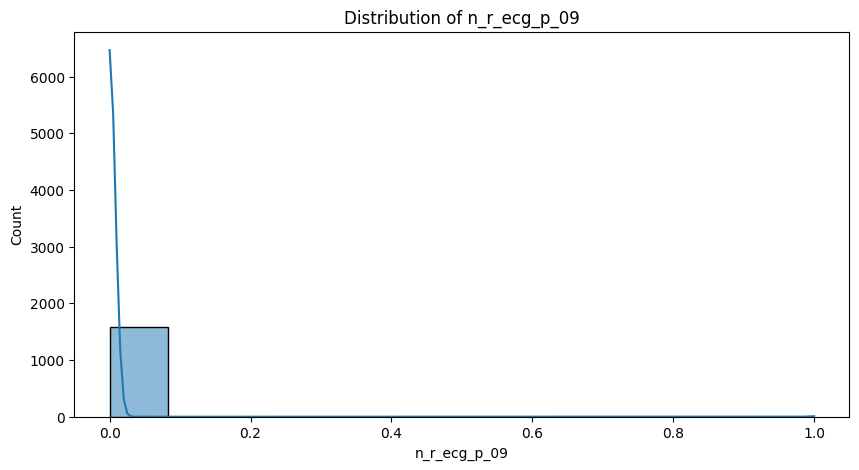

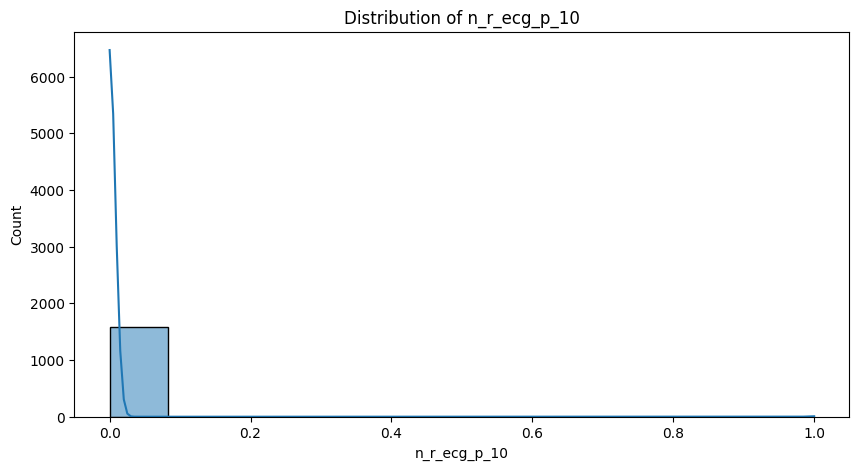

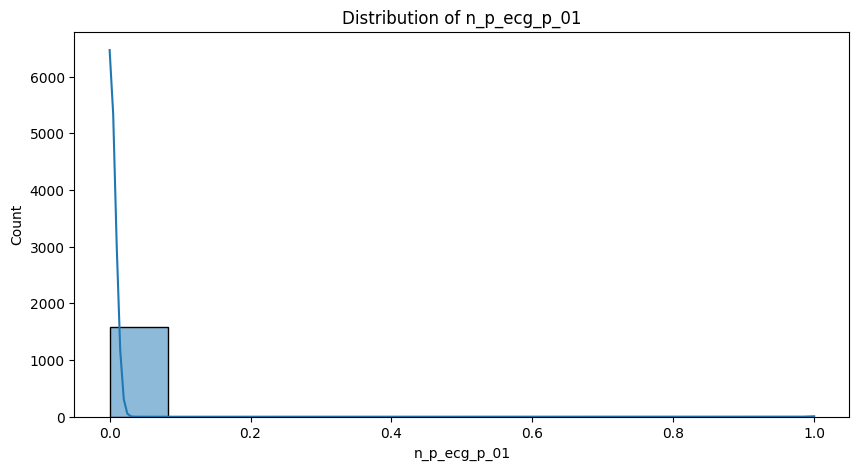

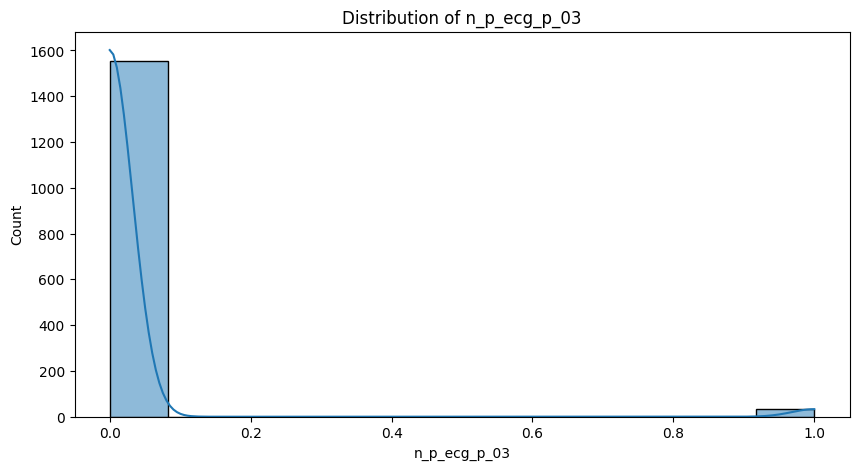

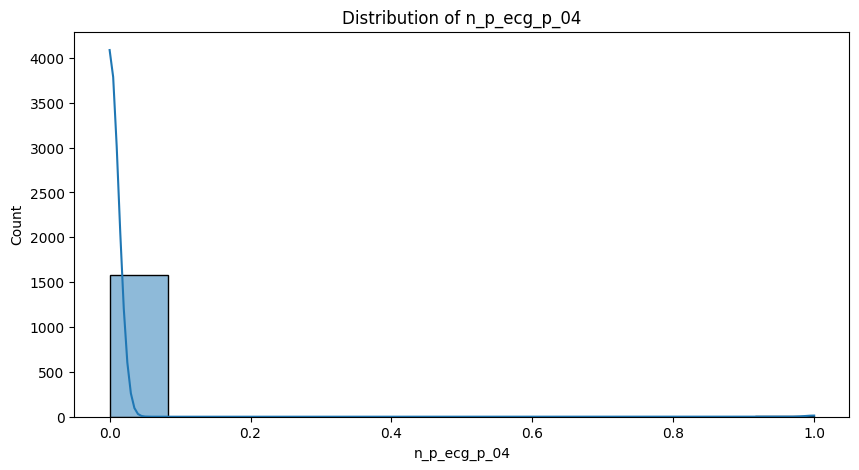

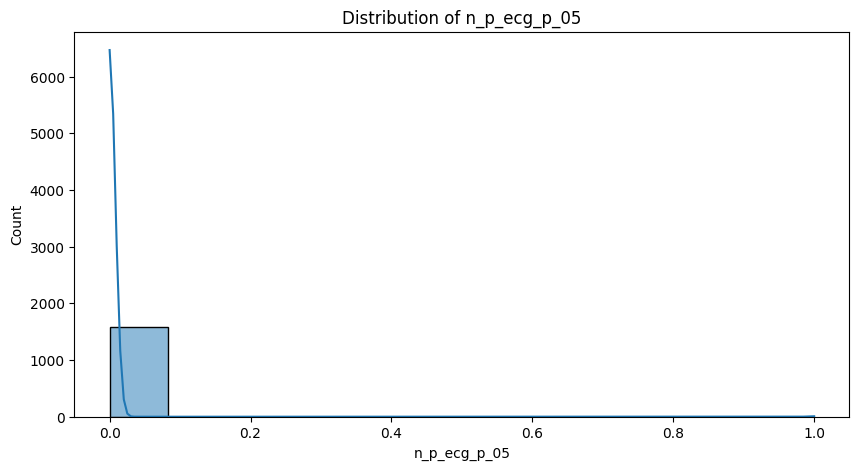

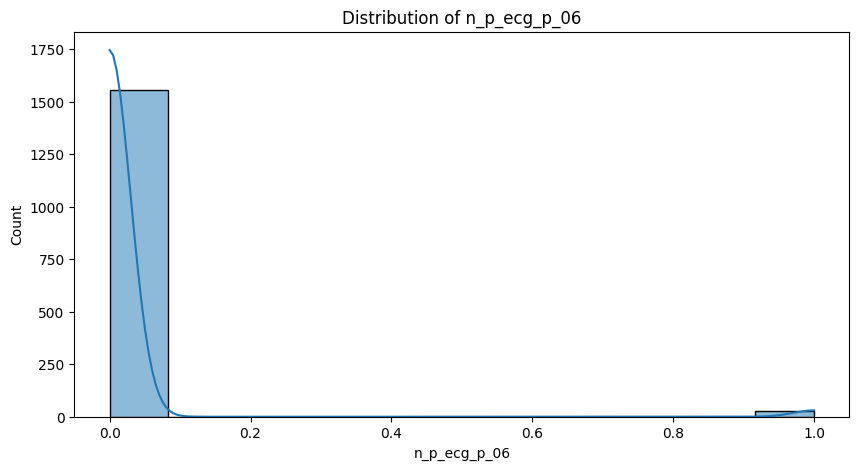

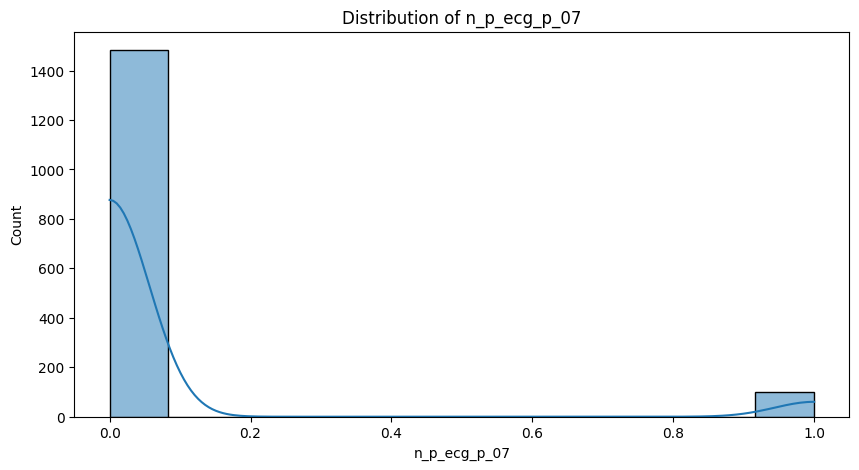

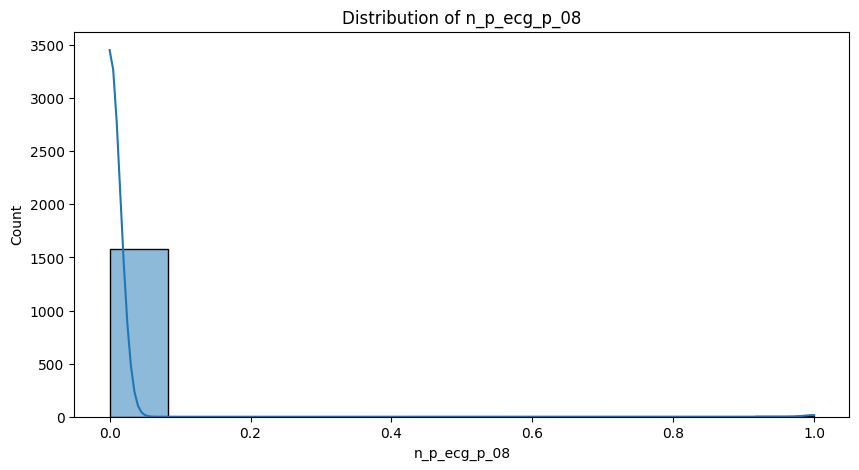

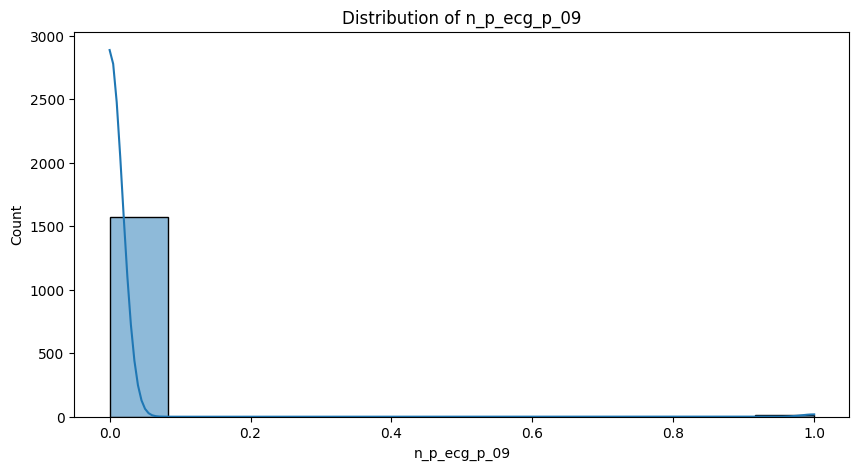

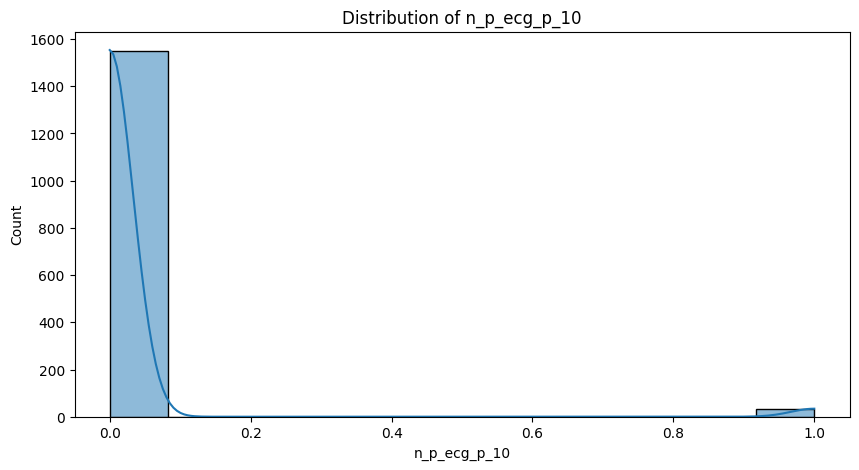

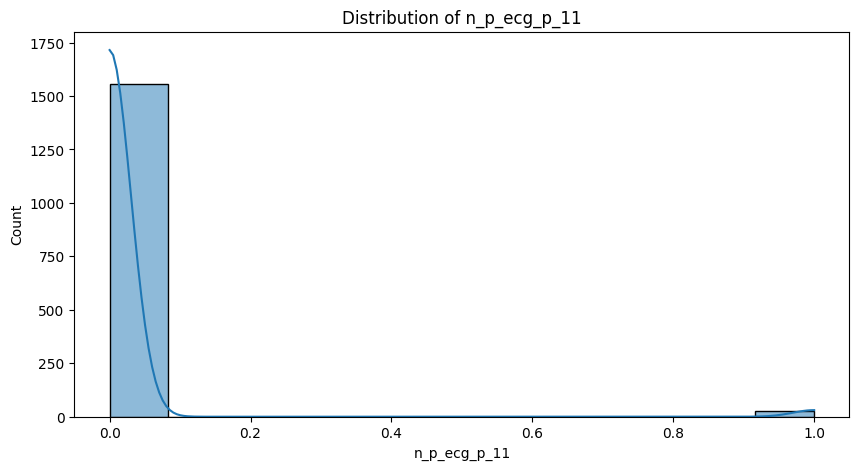

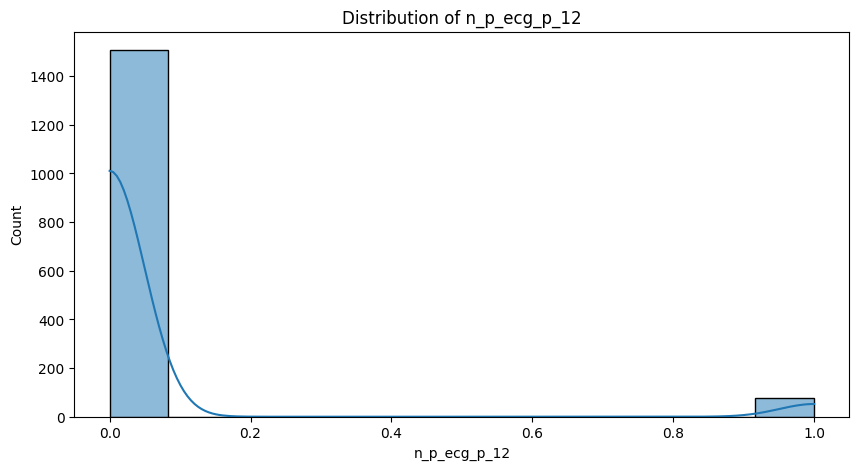

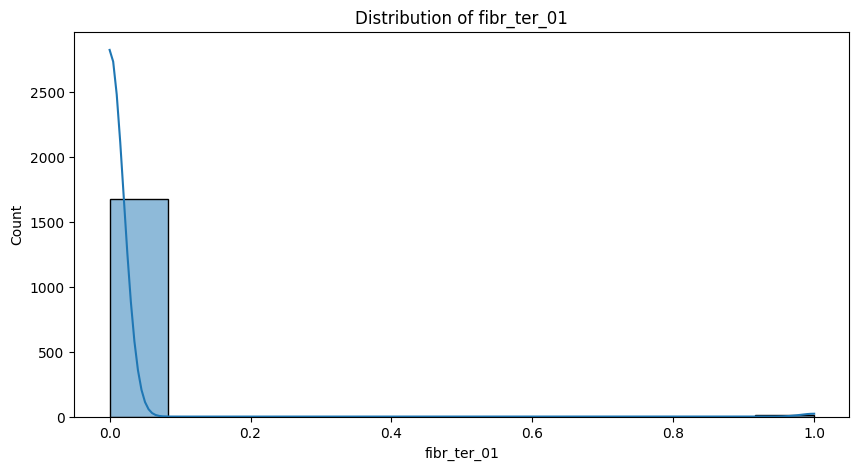

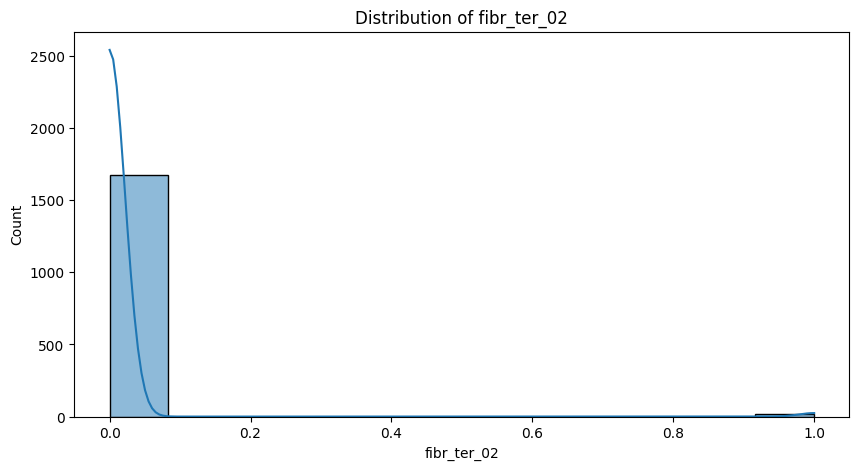

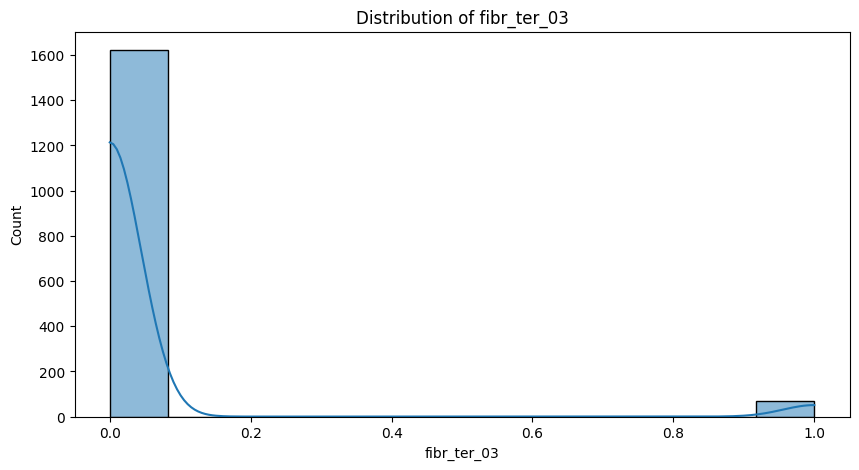

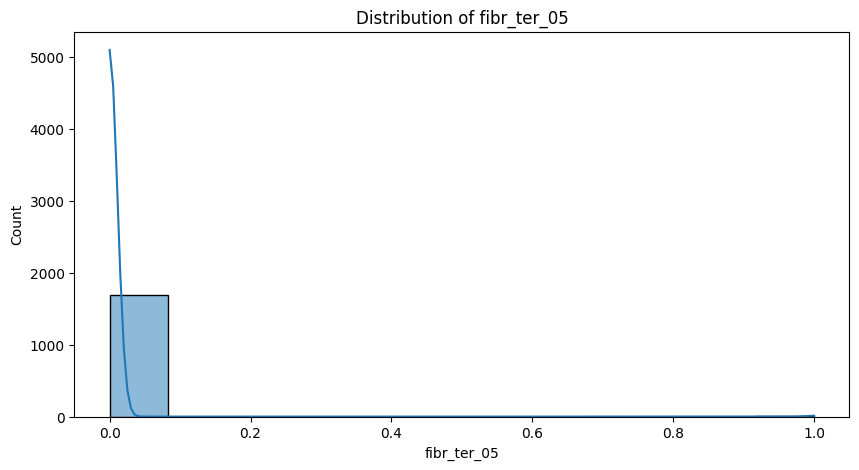

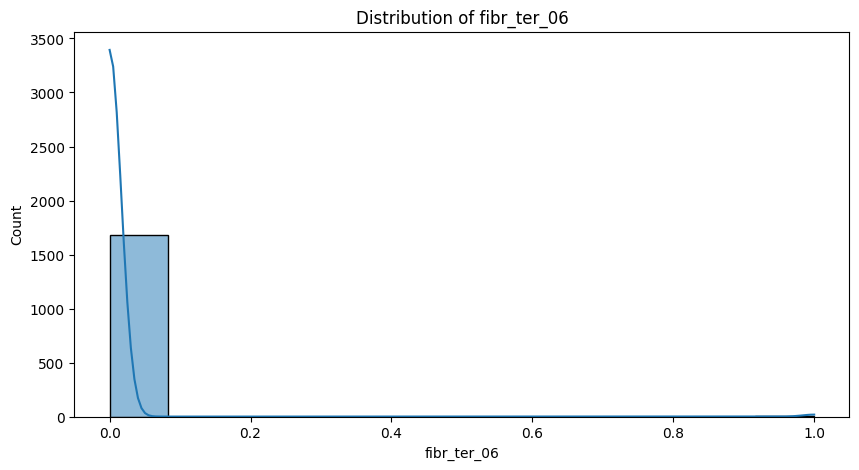

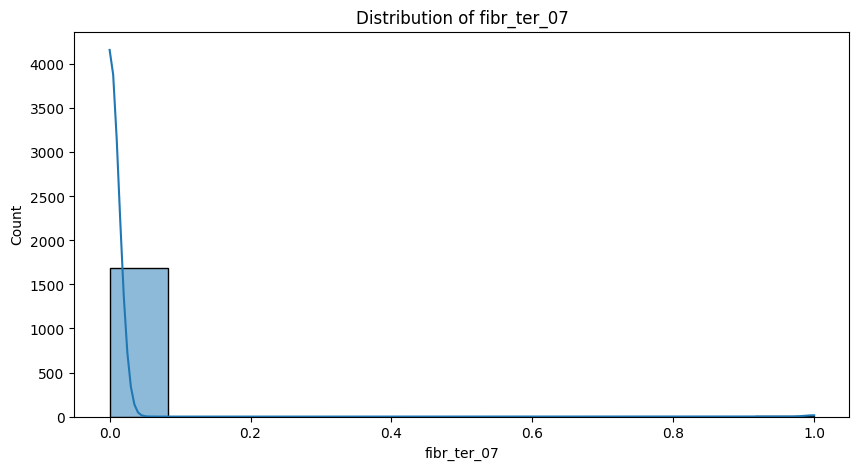

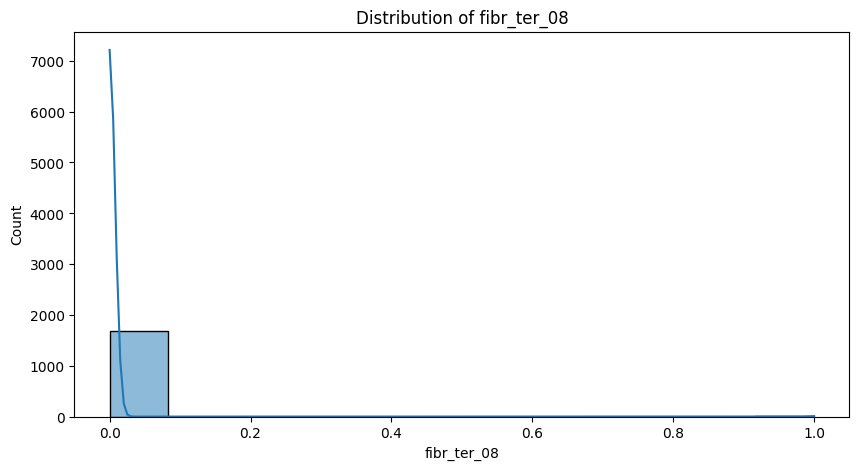

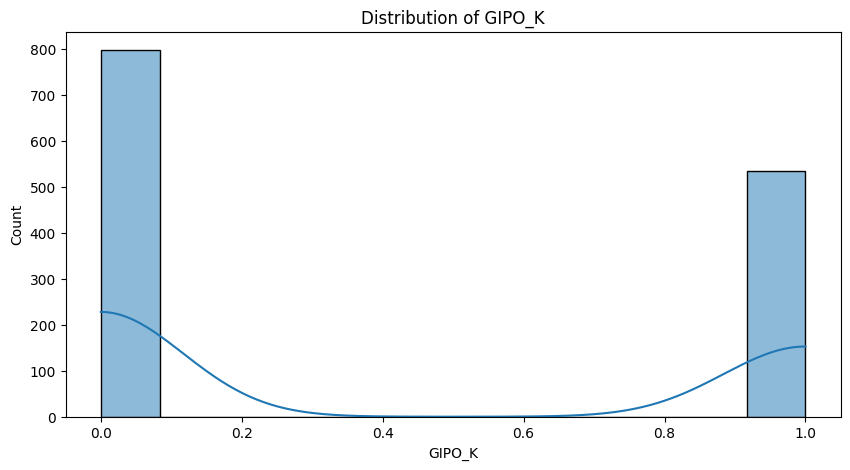

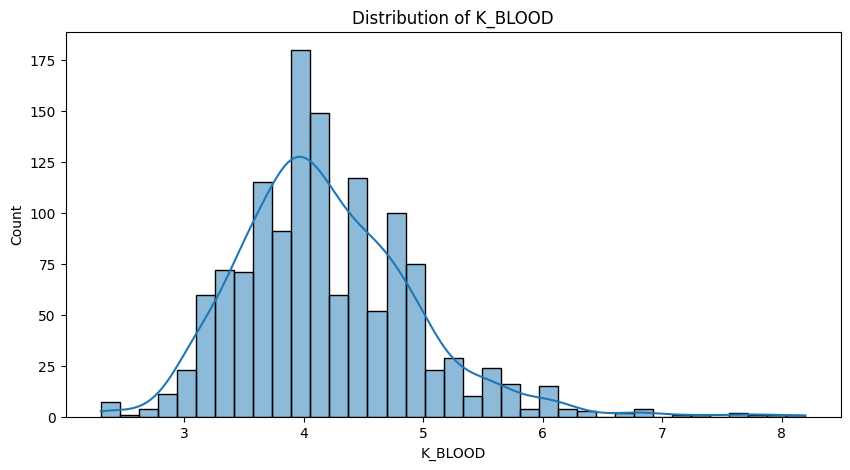

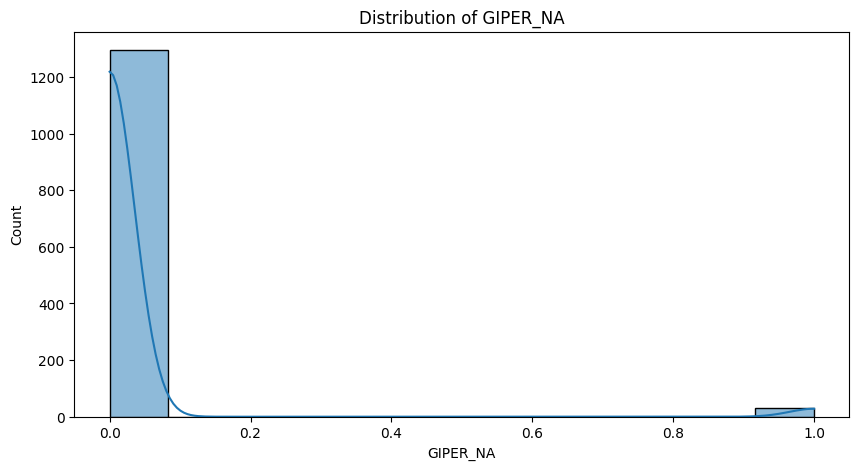

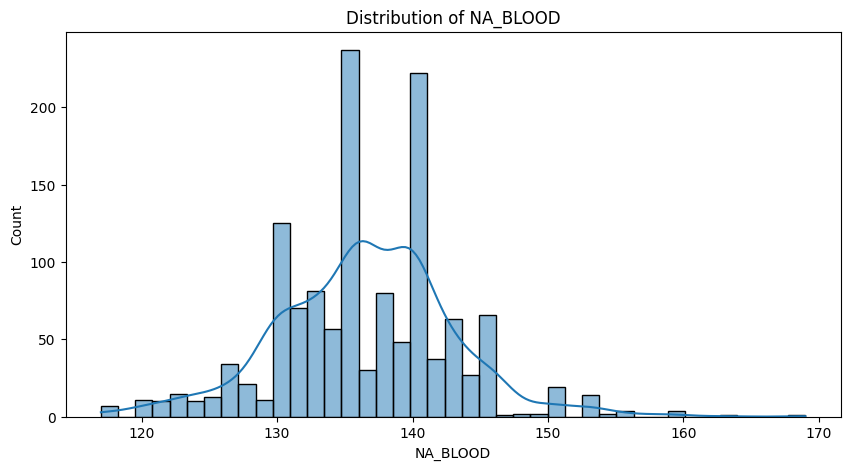

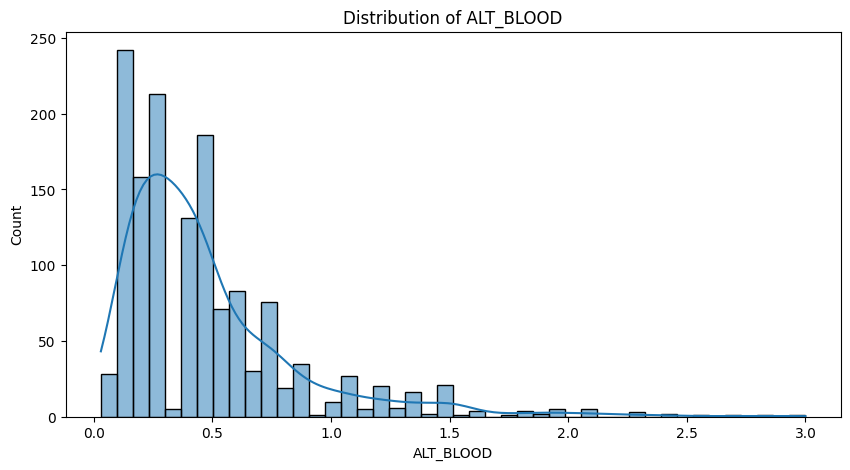

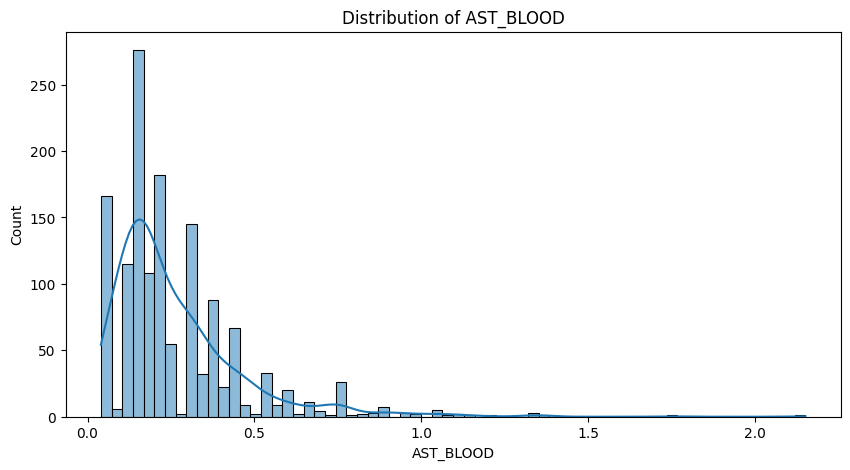

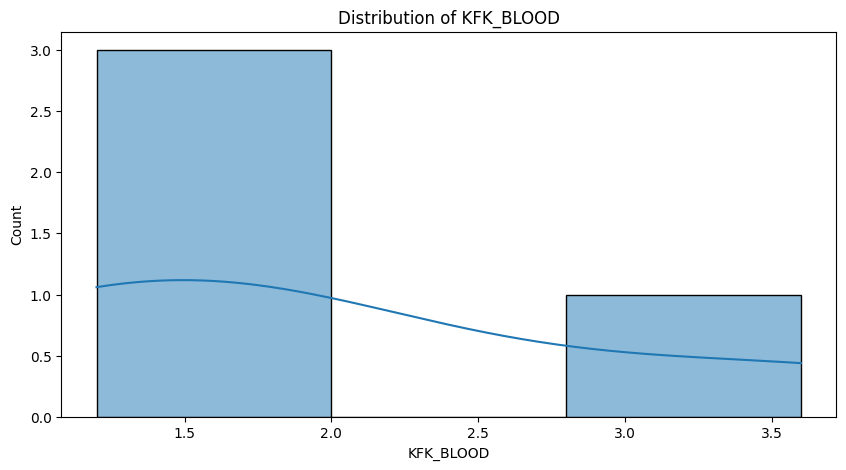

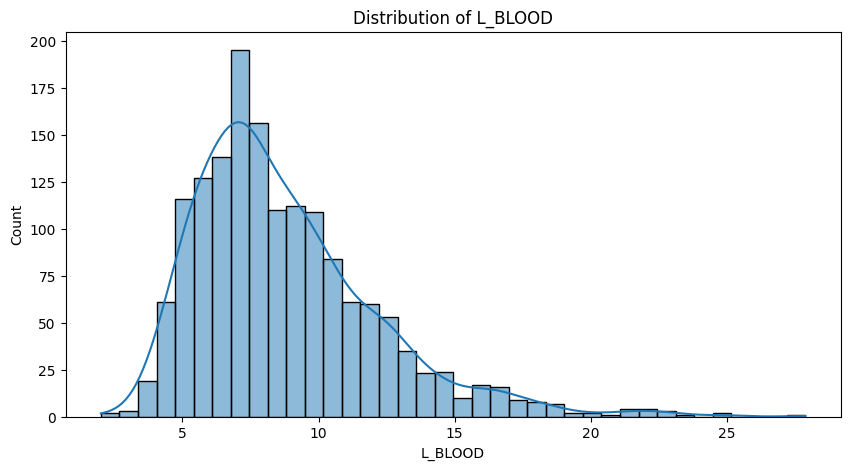

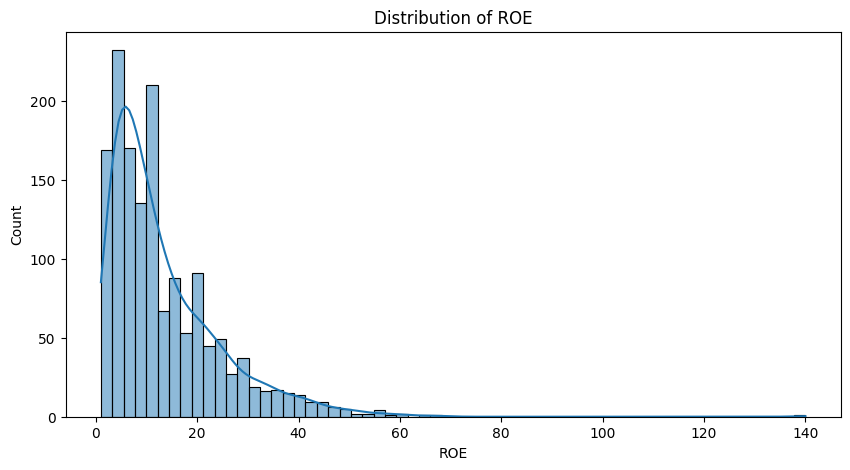

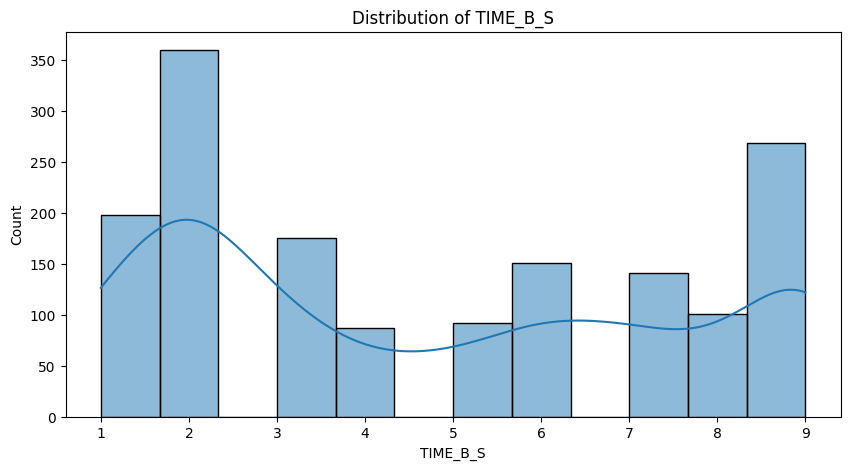

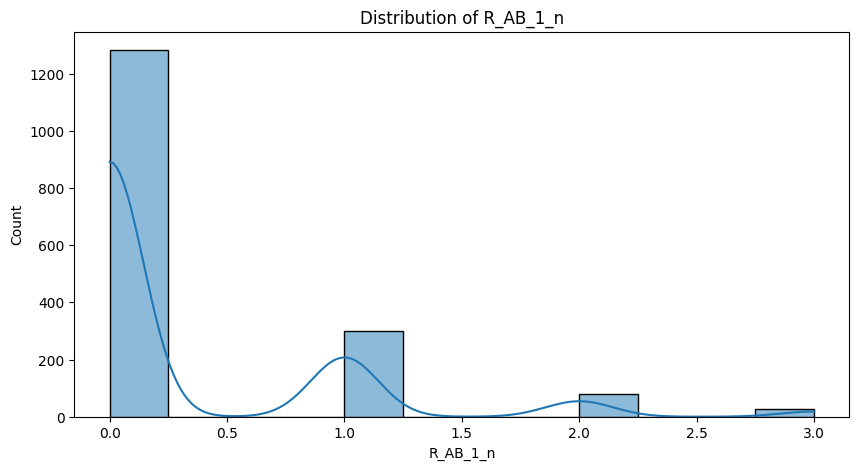

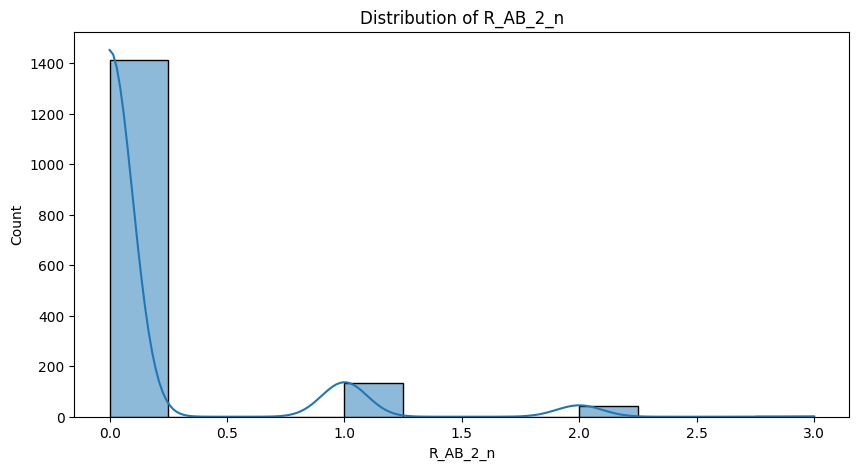

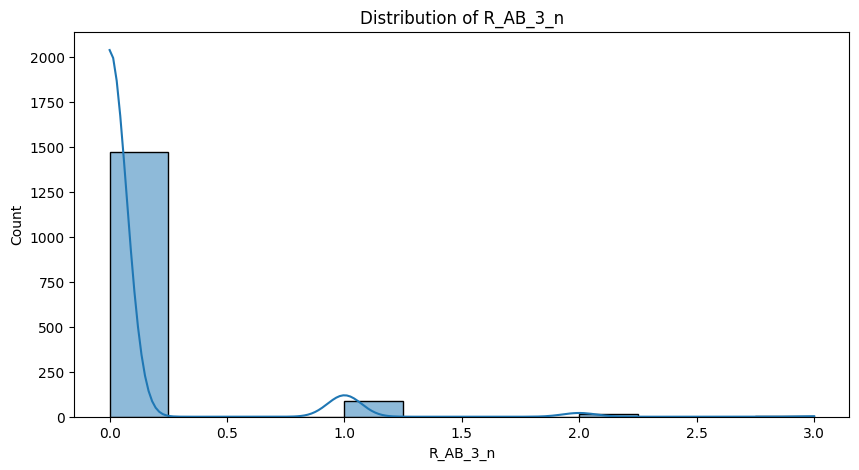

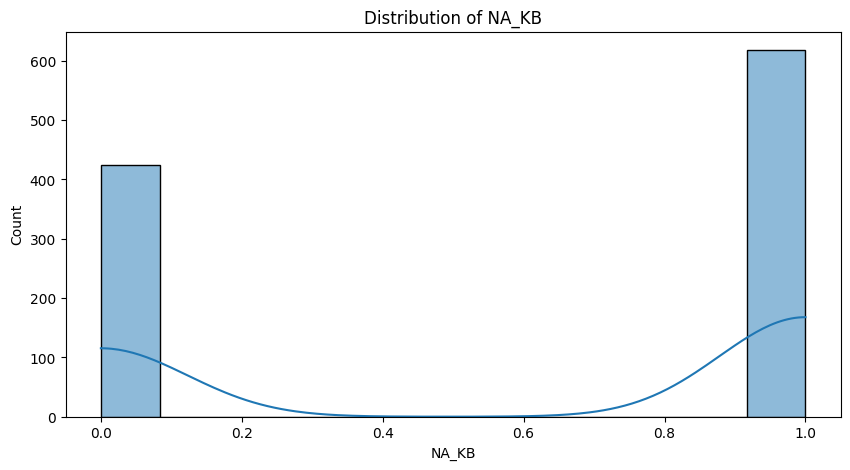

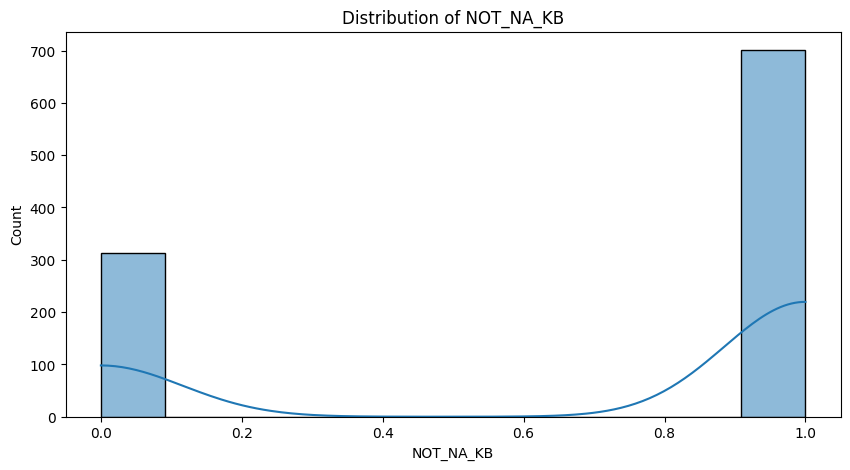

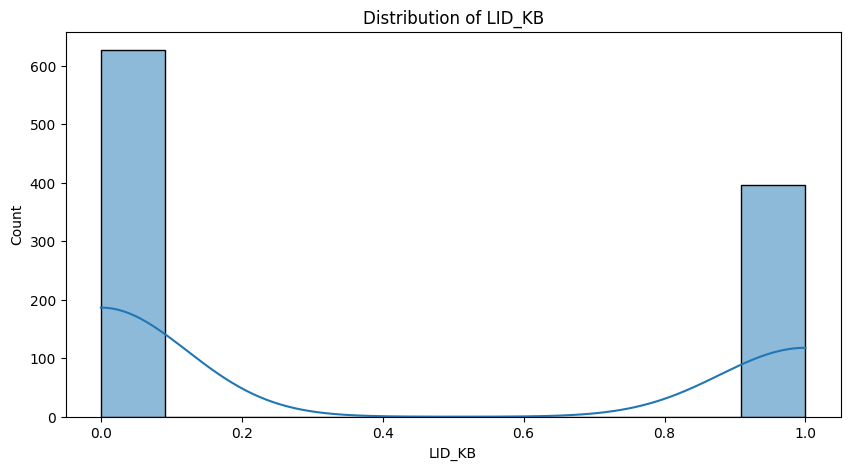

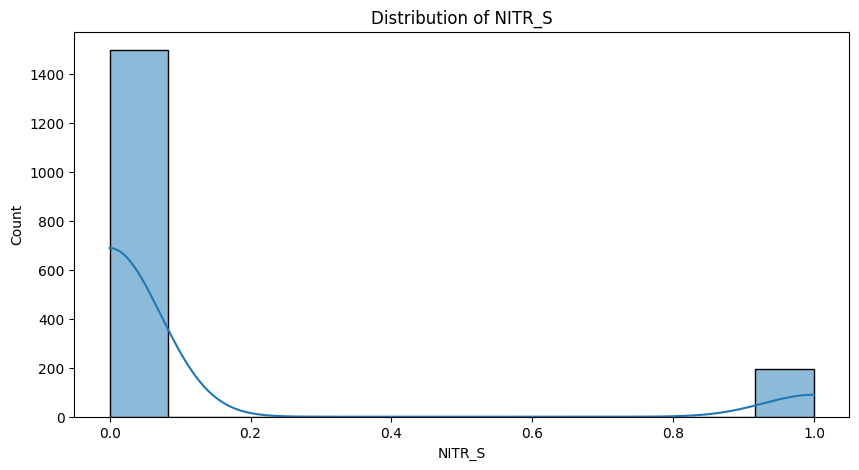

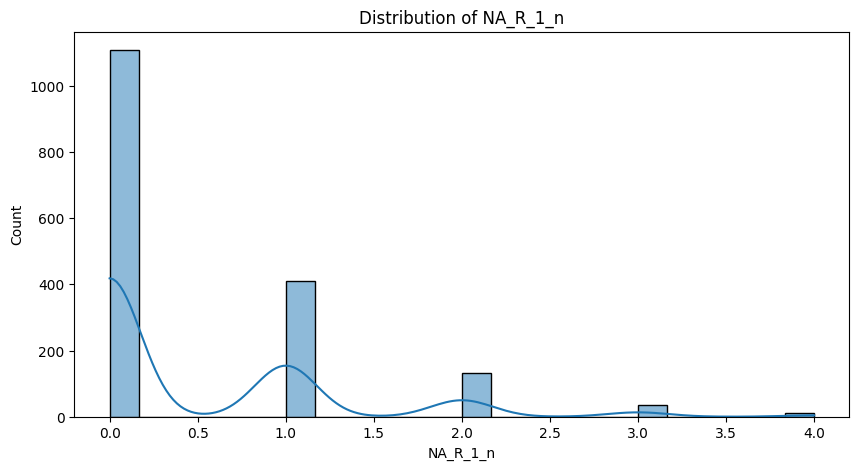

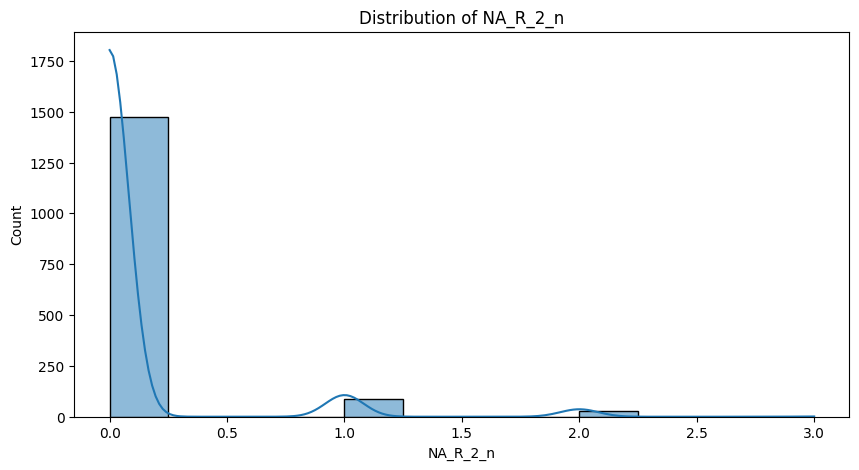

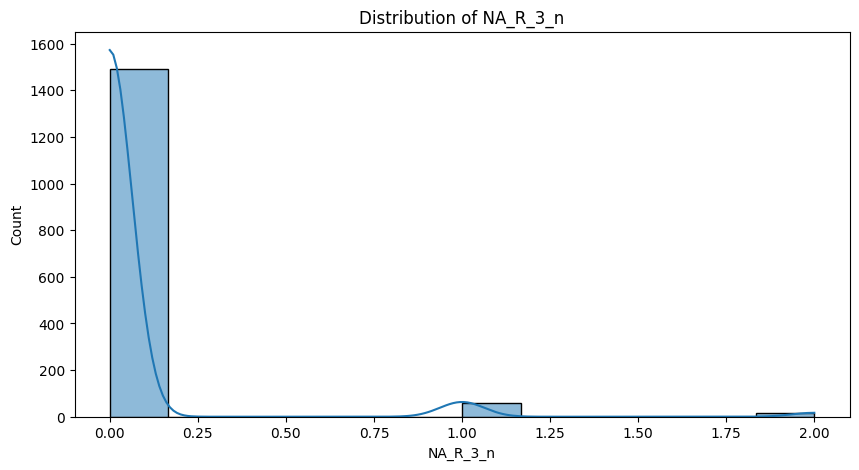

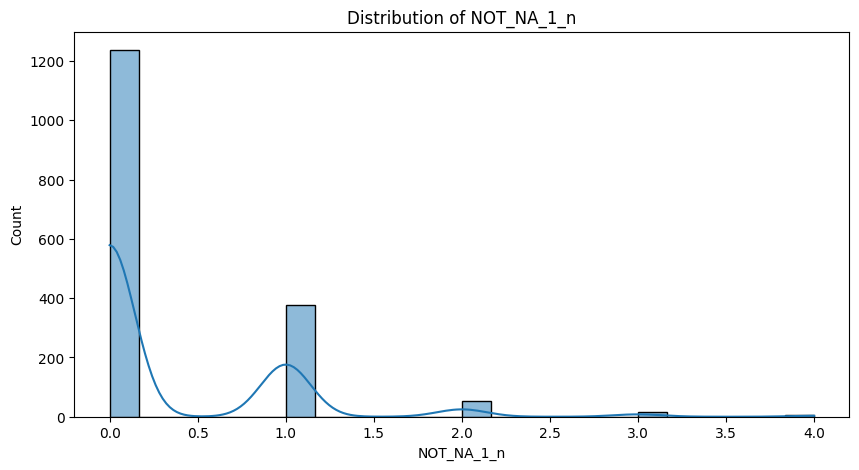

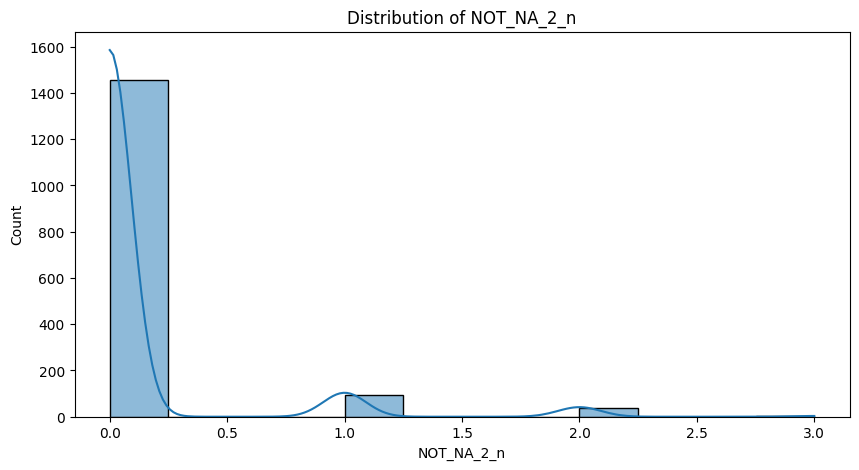

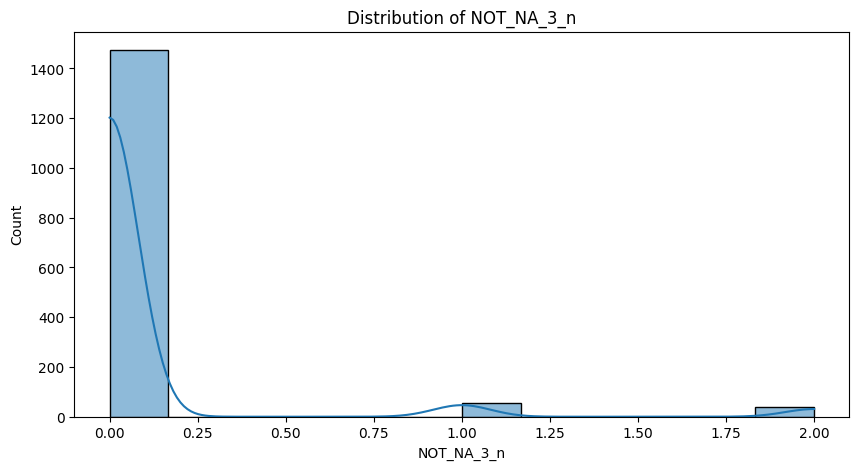

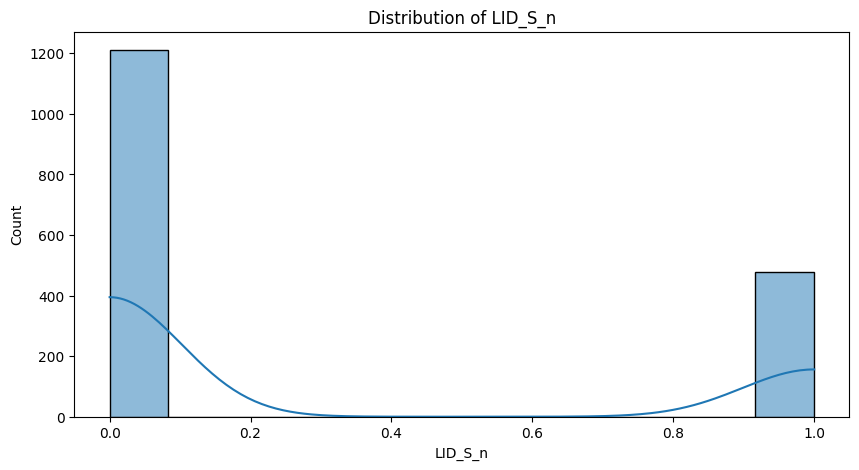

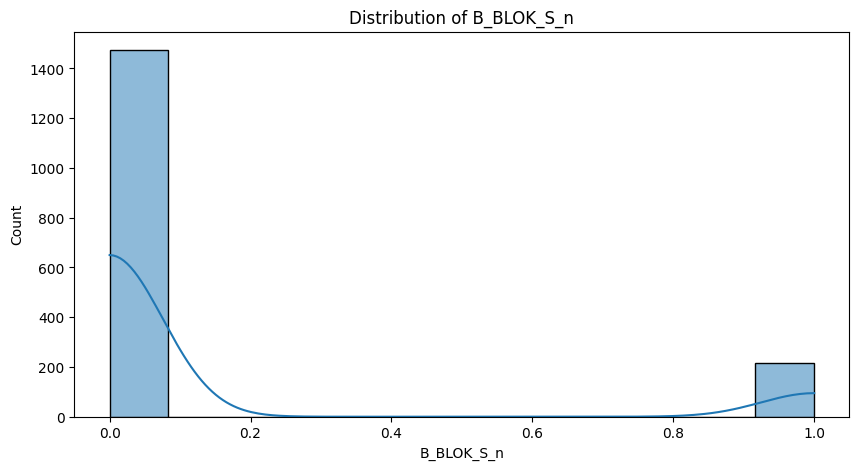

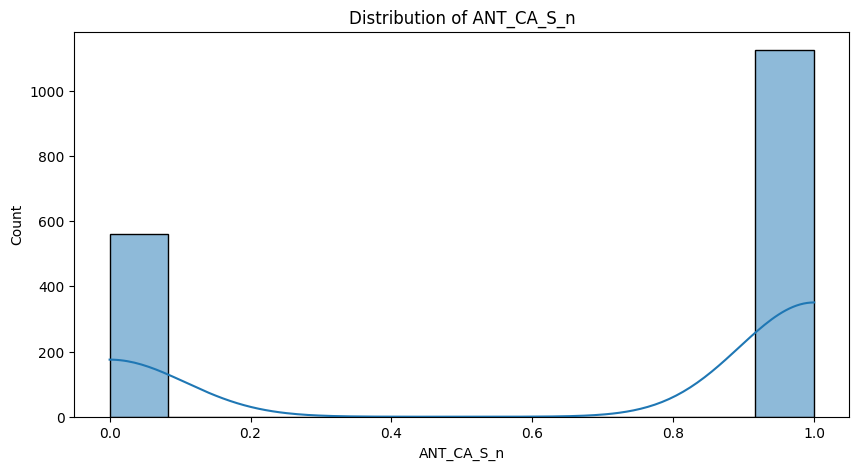

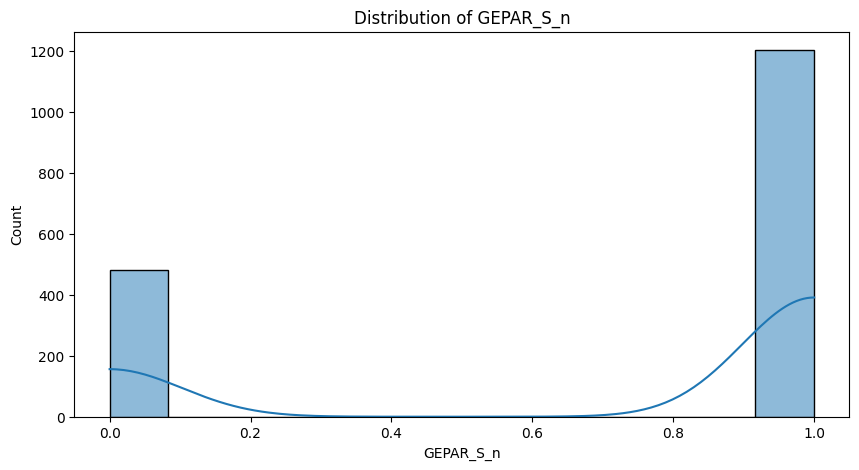

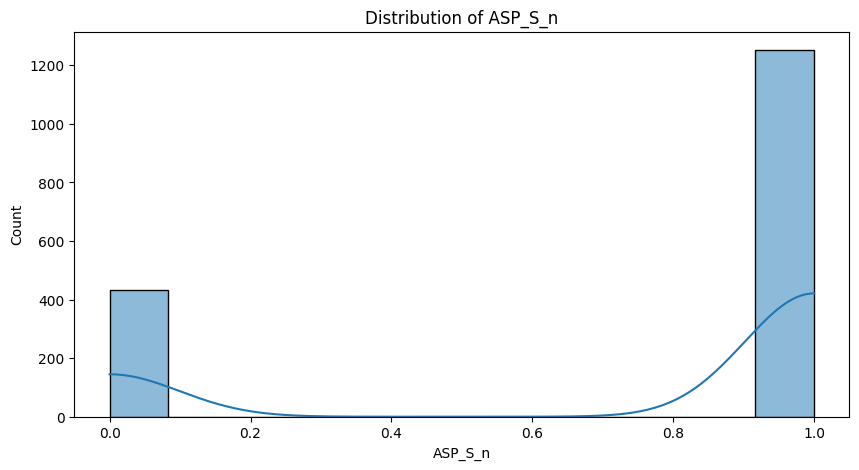

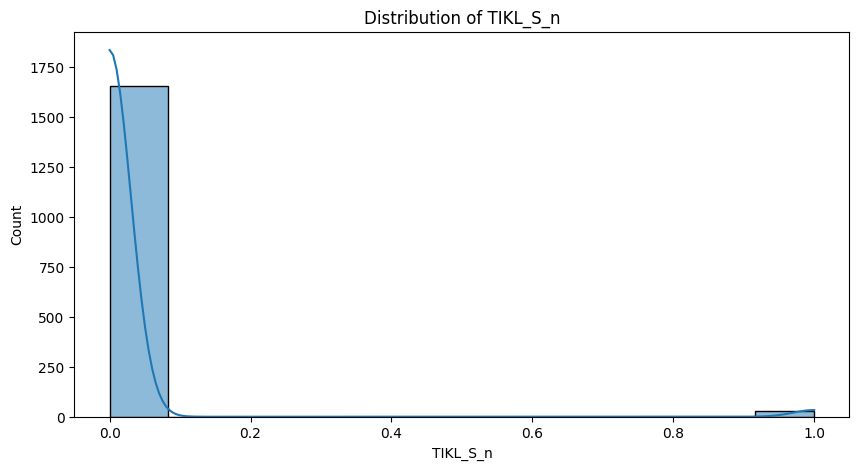

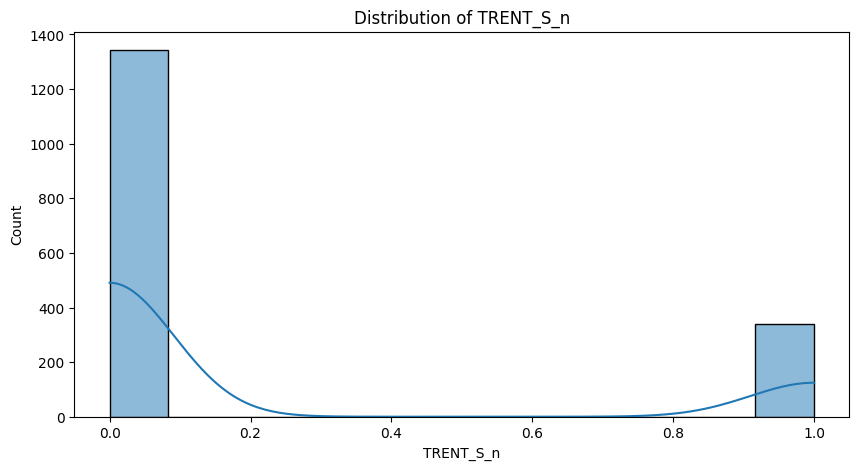

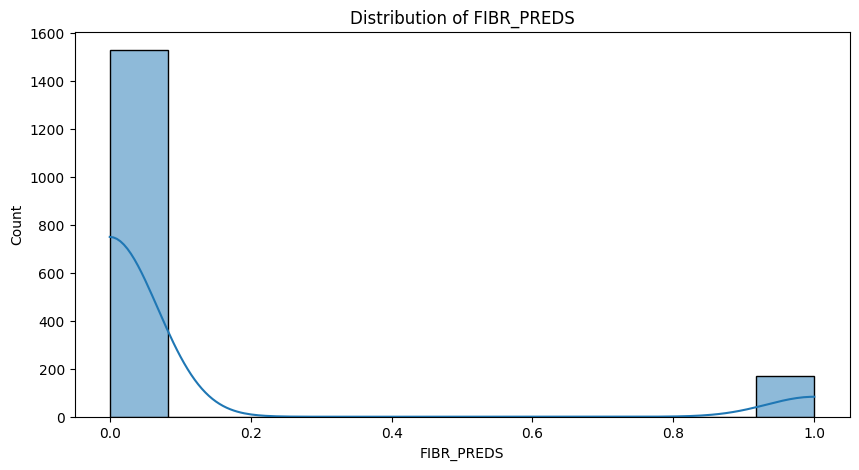

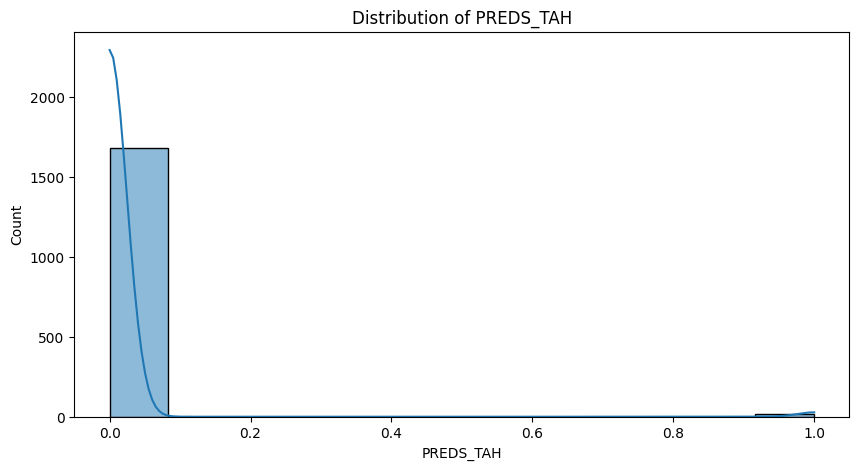

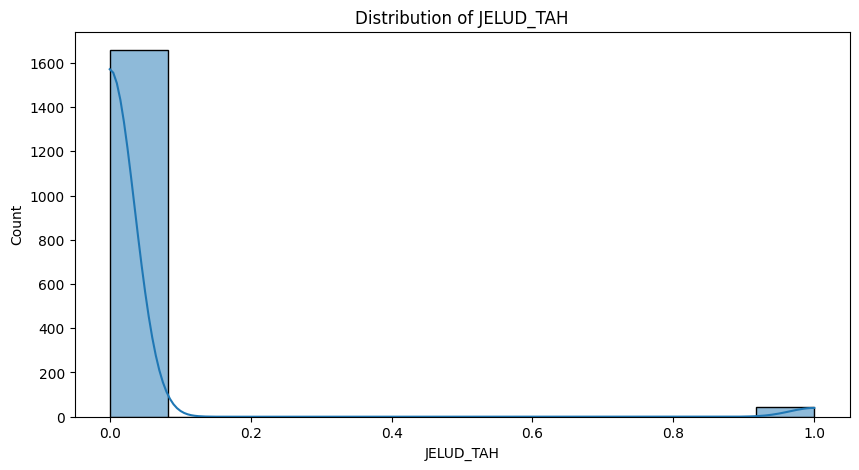

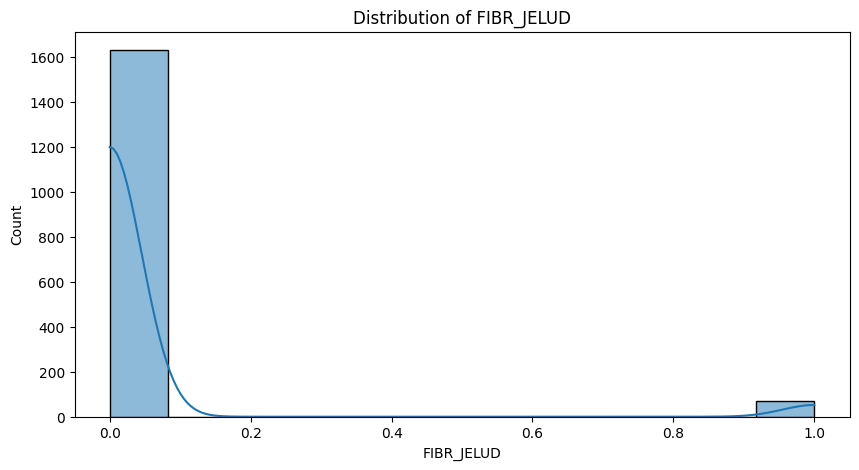

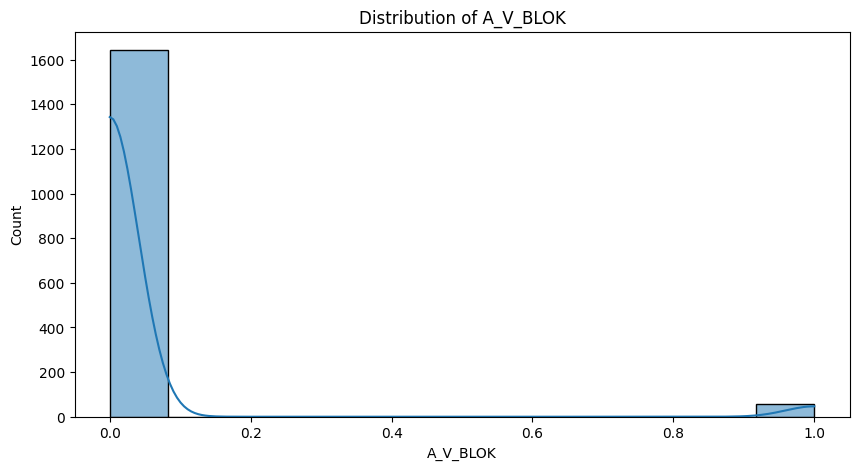

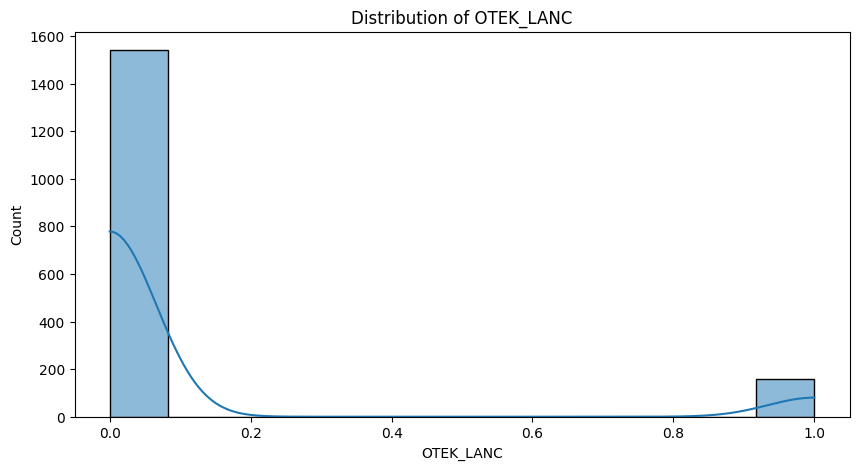

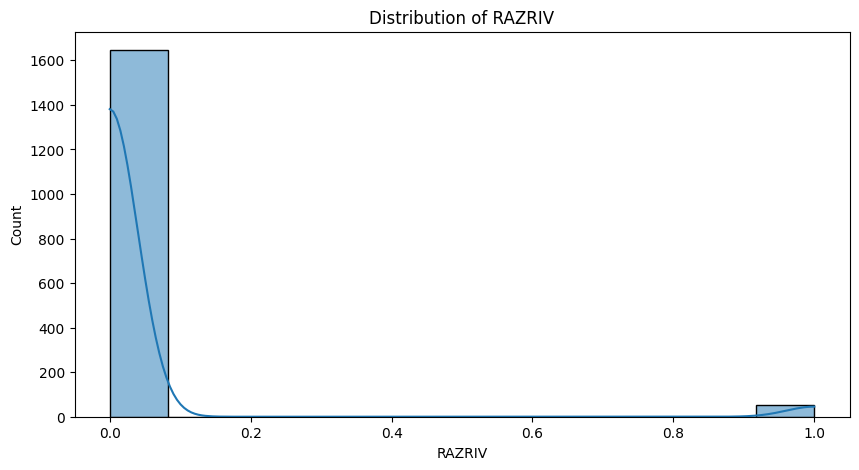

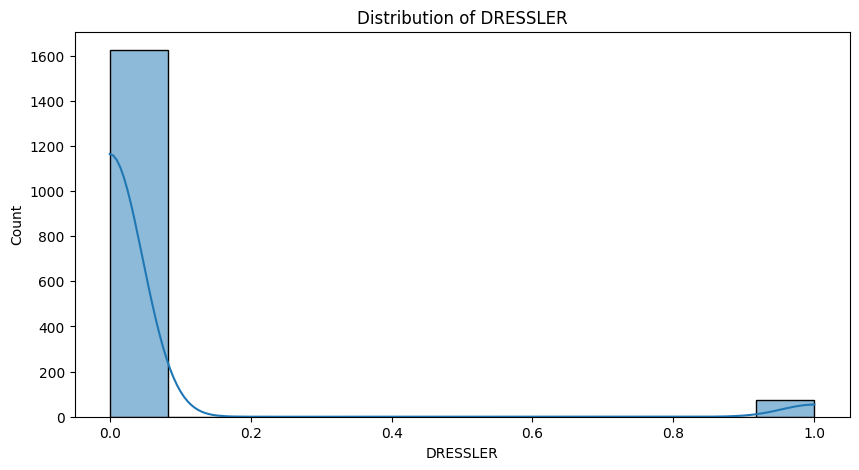

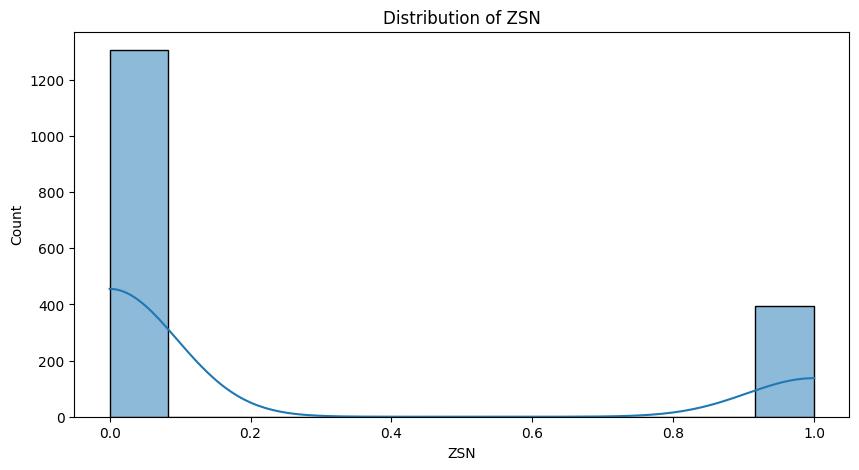

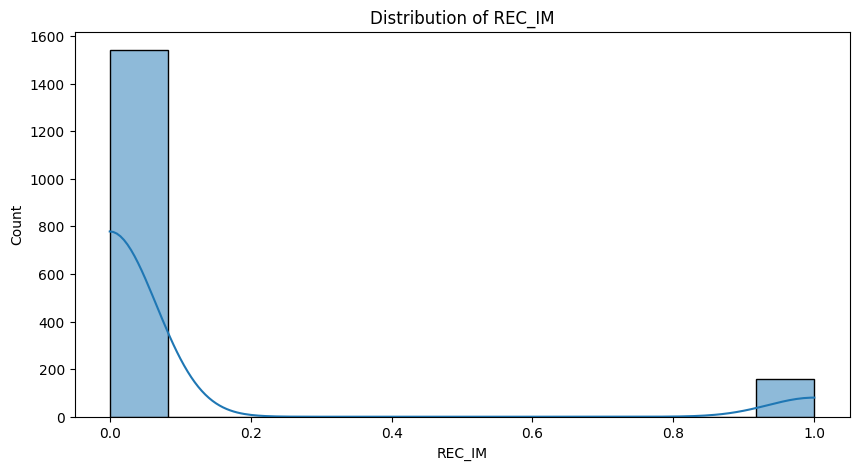

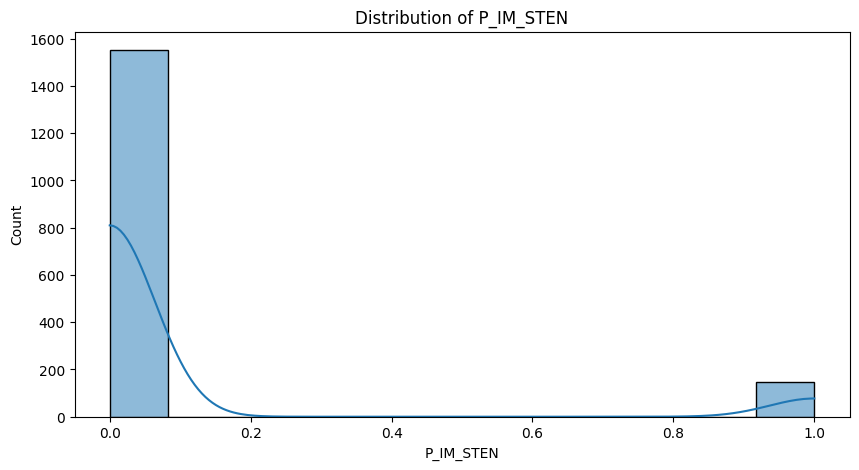

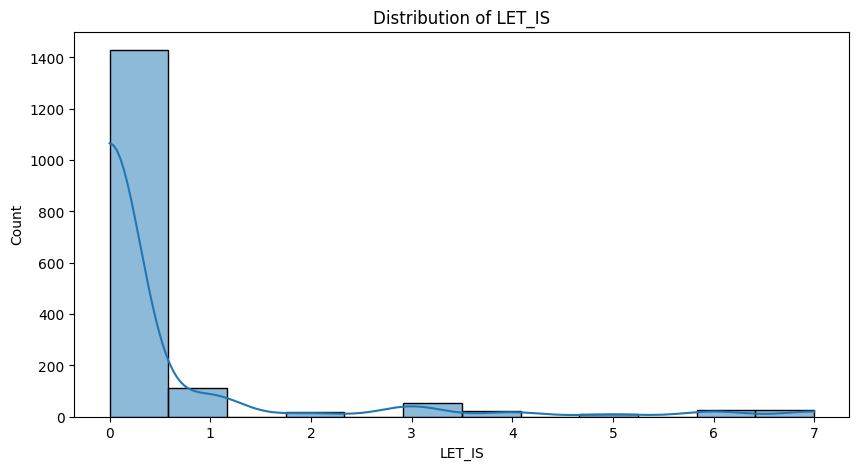

Distribution analysis complete.


In [48]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Distribution of numerical variables
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

print("Distribution analysis complete.")

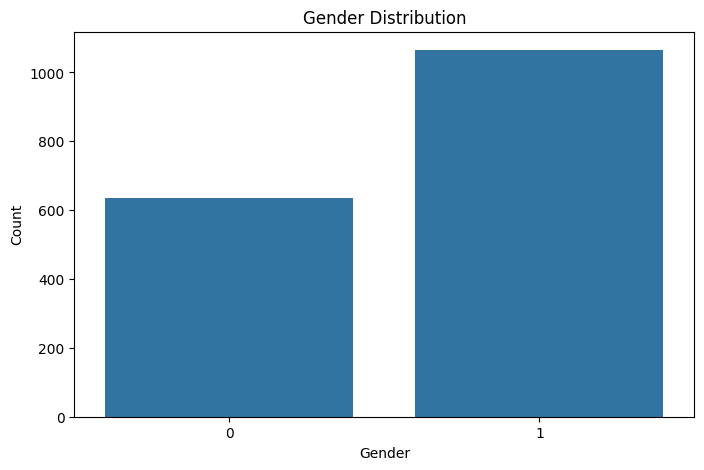

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SEX')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-50-cbc0c69b24b9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Complication', y='Frequency', data=complication_data, palette='Blues_d')


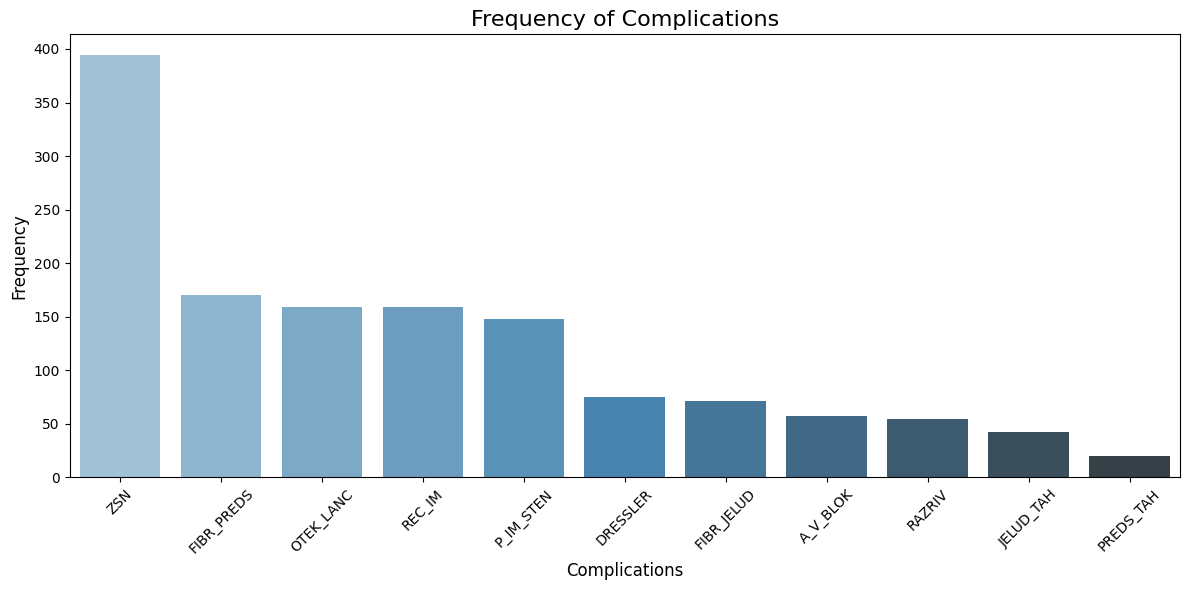

In [50]:
# Sélection des colonnes de complications à visualiser
complication_columns = ['ZSN', 'FIBR_PREDS', 'OTEK_LANC', 'REC_IM', 'P_IM_STEN', 'DRESSLER',
                        'FIBR_JELUD', 'A_V_BLOK', 'RAZRIV', 'JELUD_TAH', 'PREDS_TAH']

# Compter la fréquence de chaque complication
# Replacing 'dataset' with 'df' to reference the DataFrame
complication_counts = df[complication_columns].sum()

# Créer un DataFrame pour faciliter la visualisation
complication_data = pd.DataFrame({
    'Complication': complication_counts.index,
    'Frequency': complication_counts.values
})

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.barplot(x='Complication', y='Frequency', data=complication_data, palette='Blues_d')
plt.title('Frequency of Complications', fontsize=16)
plt.xlabel('Complications', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

Firstly, we decided which complications to analyze by visualizing the frequency of each
complication . As seen in the figure, the complications with the most
amount of cases were chronic heart failure (ZSN) with 394 cases, atrial fibrillation
(FIBR_PREDS) with 170 cases, pulmonary edema (OTEK_LANC) with 159 cases, and relapse
of myocardial infarction (REC_IM) with 159 cases.

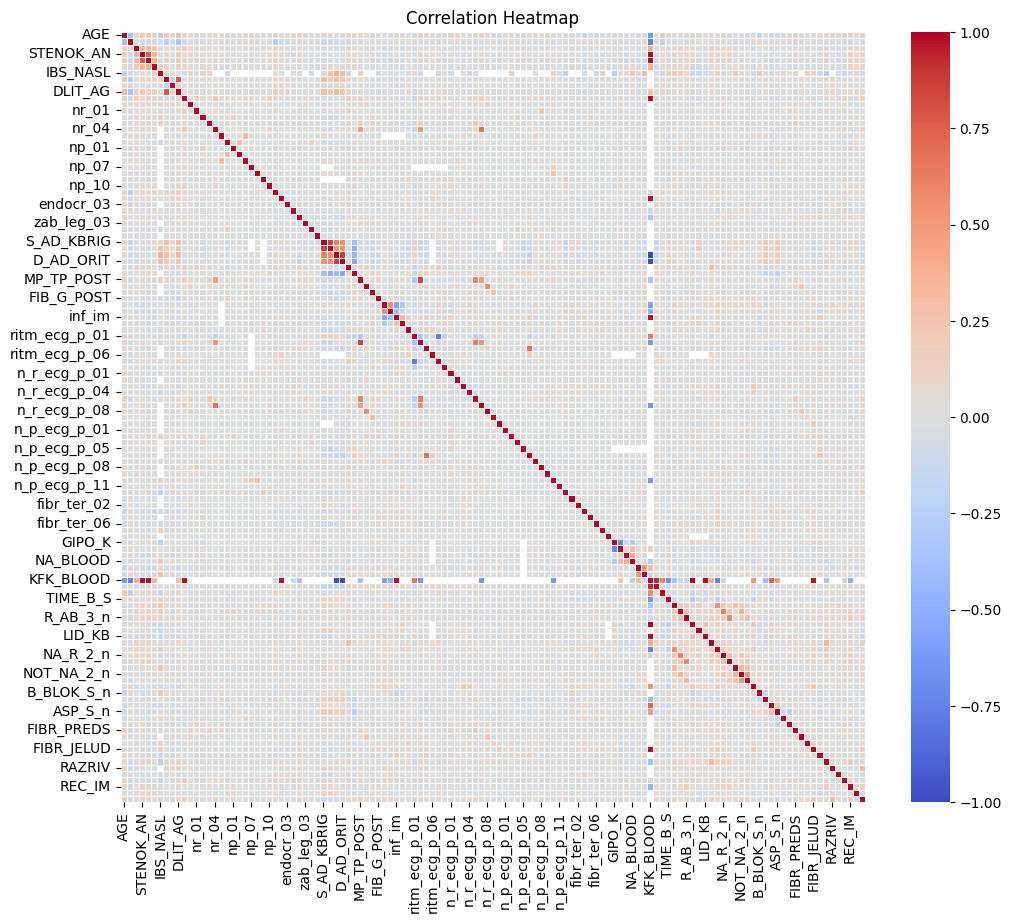

In [51]:
# Step 5: Data Visualization
# 5.1 Correlation Analysis
# Plot heatmap of correlations to understand relationships between features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

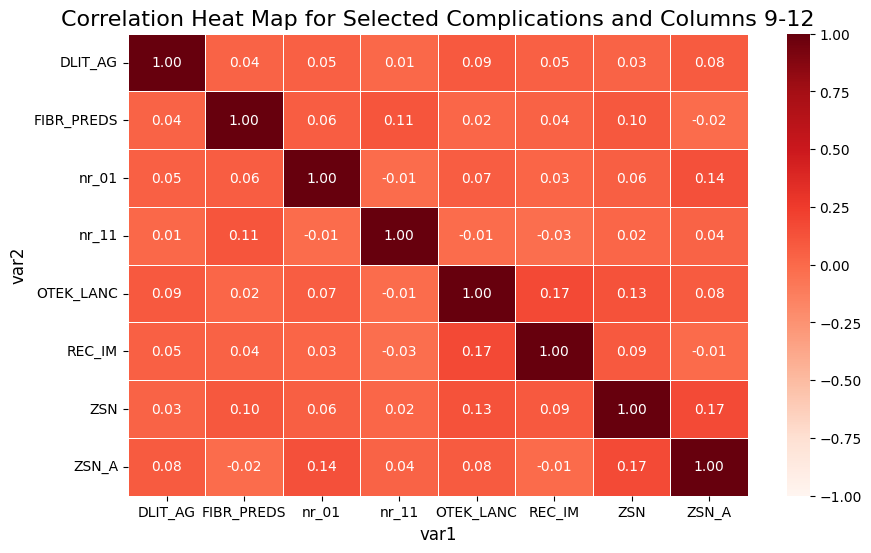

In [52]:
# Sélection des colonnes spécifiques pour calculer la corrélation
selected_columns = ['DLIT_AG', 'FIBR_PREDS', 'nr_01', 'nr_11', 'OTEK_LANC', 'REC_IM', 'ZSN', 'ZSN_A']

# Calcul de la matrice de corrélation pour ces colonnes
# Replacing 'dataset' with 'df' to reference the DataFrame
correlation_matrix = df[selected_columns].corr()

# Création de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')

# Personnalisation des titres et des axes
plt.title('Correlation Heat Map for Selected Complications and Columns 9-12', fontsize=16)
plt.xlabel('var1', fontsize=12)
plt.ylabel('var2', fontsize=12)

# Affichage de la heatmap
plt.show()

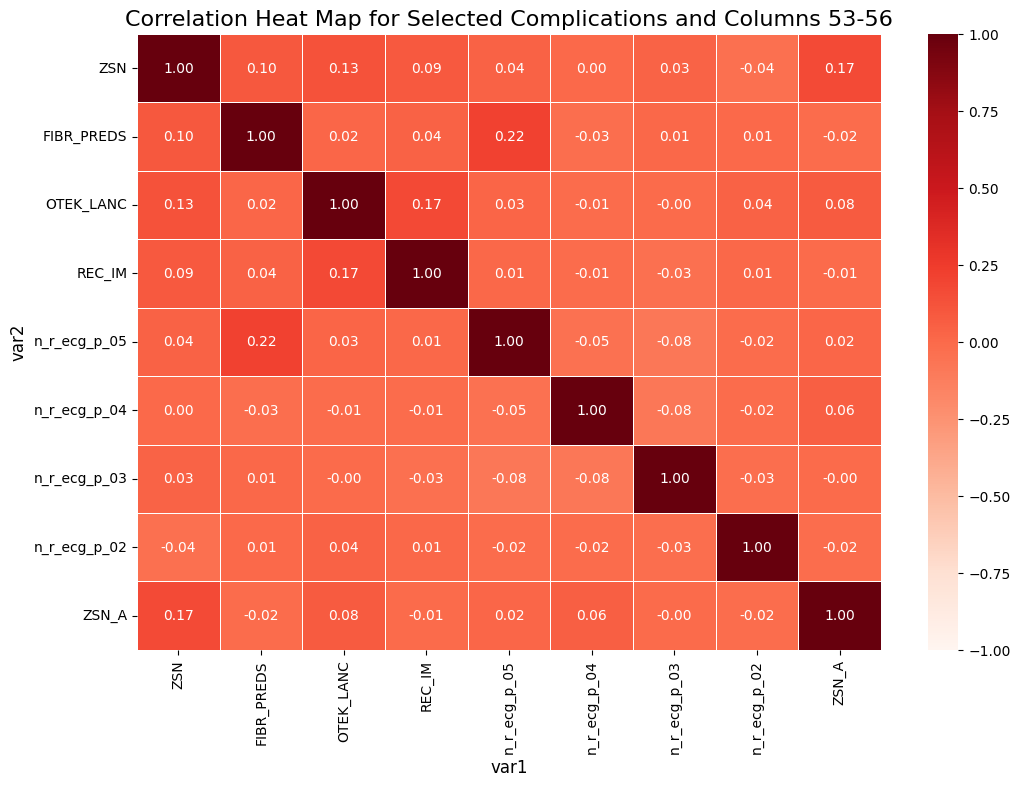

In [53]:
selected_columns = ['ZSN', 'FIBR_PREDS', 'OTEK_LANC', 'REC_IM', 'n_r_ecg_p_05', 'n_r_ecg_p_04', 'n_r_ecg_p_03', 'n_r_ecg_p_02', 'ZSN_A']

# Calcul de la matrice de corrélation pour ces colonnes
correlation_matrix = df[selected_columns].corr()

# Création de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')

# Personnalisation des titres et des axes
plt.title('Correlation Heat Map for Selected Complications and Columns 53-56', fontsize=16)
plt.xlabel('var1', fontsize=12)
plt.ylabel('var2', fontsize=12)

# Affichage de la heatmap
plt.show()

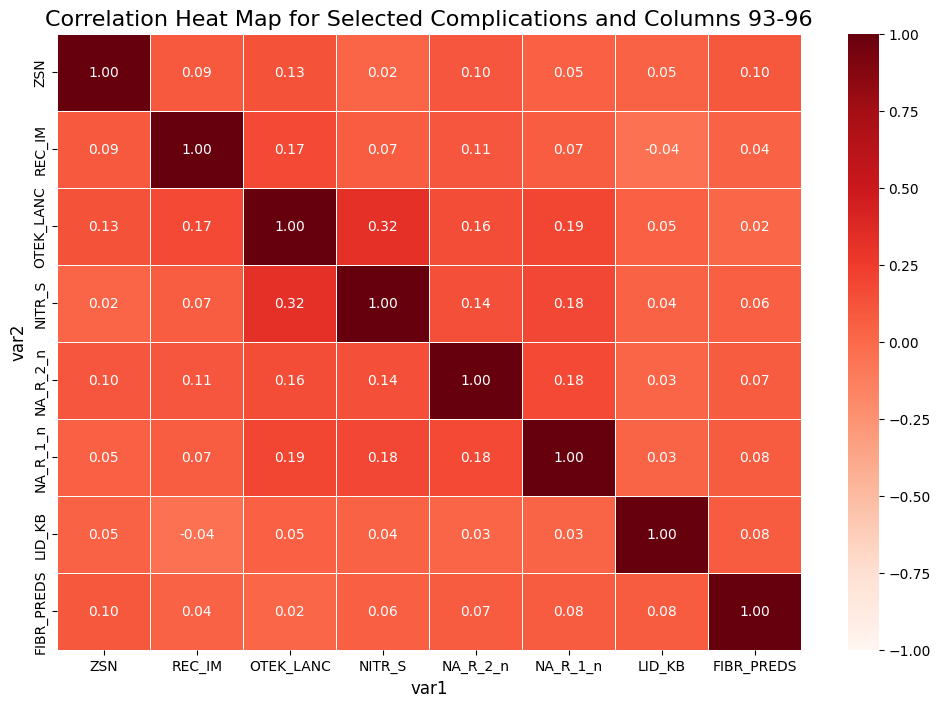

In [54]:
# Sélection des colonnes spécifiques pour calculer la corrélation
selected_columns = ['ZSN', 'REC_IM', 'OTEK_LANC', 'NITR_S', 'NA_R_2_n', 'NA_R_1_n', 'LID_KB', 'FIBR_PREDS']

# Calcul de la matrice de corrélation pour ces colonnes
correlation_matrix = df[selected_columns].corr()

# Création de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')

# Personnalisation des titres et des axes
plt.title('Correlation Heat Map for Selected Complications and Columns 93-96', fontsize=16)
plt.xlabel('var1', fontsize=12)
plt.ylabel('var2', fontsize=12)

# Affichage de la heatmap
plt.show()

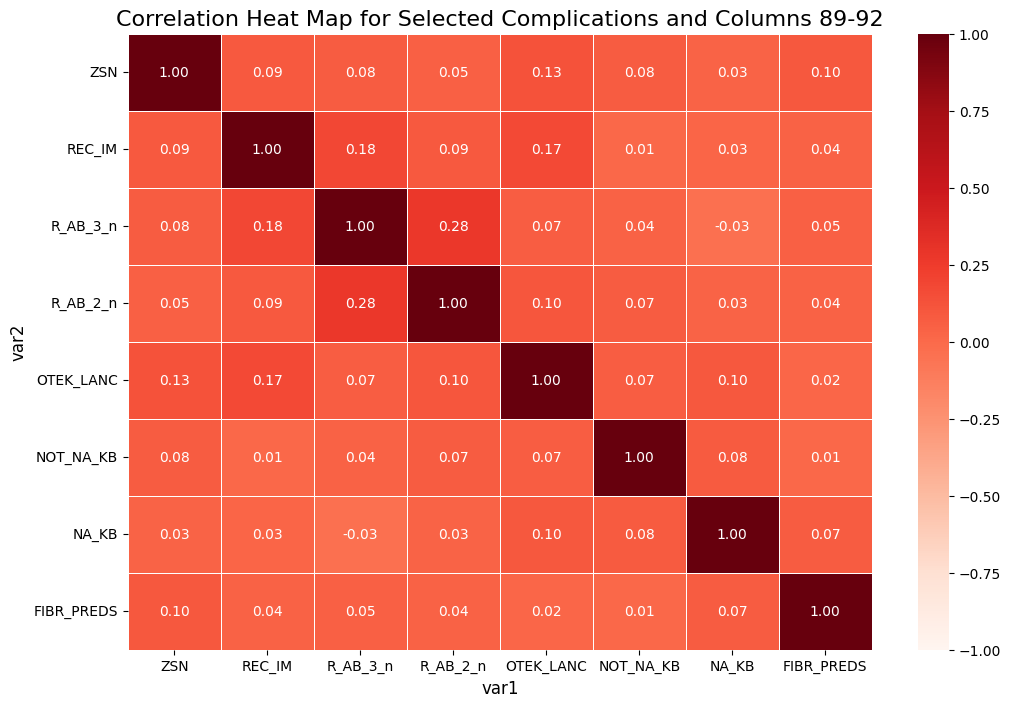

In [55]:
# Sélection des colonnes spécifiques pour calculer la corrélation
selected_columns = ['ZSN', 'REC_IM', 'R_AB_3_n', 'R_AB_2_n', 'OTEK_LANC', 'NOT_NA_KB', 'NA_KB', 'FIBR_PREDS']

# Calcul de la matrice de corrélation pour ces colonnes
correlation_matrix = df[selected_columns].corr()

# Création de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')

# Personnalisation des titres et des axes
plt.title('Correlation Heat Map for Selected Complications and Columns 89-92', fontsize=16)
plt.xlabel('var1', fontsize=12)
plt.ylabel('var2', fontsize=12)

# Affichage de la heatmap
plt.show()

After selecting a subset of the total complications to analyze, we created correlation heat
maps for each of the input variables with the selected complications. The choice to use
correlation heat maps was based upon the fact that each complication was a nominal categorical
variable. The following heat maps show the highest correlated input variables with each selected
complication

In [56]:

missing_values = df.isnull().sum()

missing_values[missing_values > 0]

AGE                 8
INF_ANAM            4
STENOK_AN         106
FK_STENOK          73
IBS_POST           51
IBS_NASL         1628
GB                  9
SIM_GIPERT          8
DLIT_AG           248
ZSN_A              54
nr_11              21
nr_01              21
nr_02              21
nr_03              21
nr_04              21
nr_07              21
nr_08              21
np_01              18
np_04              18
np_05              18
np_07              18
np_08              18
np_09              18
np_10              18
endocr_01          11
endocr_02          10
endocr_03          10
zab_leg_01          7
zab_leg_02          7
zab_leg_03          7
zab_leg_04          7
zab_leg_06          7
S_AD_KBRIG       1076
D_AD_KBRIG       1076
S_AD_ORIT         267
D_AD_ORIT         267
O_L_POST           12
K_SH_POST          15
MP_TP_POST         14
SVT_POST           12
GT_POST            12
FIB_G_POST         12
ant_im             83
lat_im             80
inf_im             80
post_im            72
IM_PG_P             1
ritm_ecg_p_01     152
ritm_ecg_p_02     152
ritm_ecg_p_04     152
ritm_ecg_p_06     152
ritm_ecg_p_07     152
ritm_ecg_p_08     152
n_r_ecg_p_01      115
n_r_ecg_p_02      115
n_r_ecg_p_03      115
n_r_ecg_p_04      115
n_r_ecg_p_05      115
n_r_ecg_p_06      115
n_r_ecg_p_08      115
n_r_ecg_p_09      115
n_r_ecg_p_10      115
n_p_ecg_p_01      115
n_p_ecg_p_03      115
n_p_ecg_p_04      115
n_p_ecg_p_05      115
n_p_ecg_p_06      115
n_p_ecg_p_07      115
n_p_ecg_p_08      115
n_p_ecg_p_09      115
n_p_ecg_p_10      115
n_p_ecg_p_11      115
n_p_ecg_p_12      115
fibr_ter_01        10
fibr_ter_02        10
fibr_ter_03        10
fibr_ter_05        10
fibr_ter_06        10
fibr_ter_07        10
fibr_ter_08        10
GIPO_K            369
K_BLOOD           371
GIPER_NA          375
NA_BLOOD          375
ALT_BLOOD         284
AST_BLOOD         285
KFK_BLOOD        1696
L_BLOOD           125
ROE               203
TIME_B_S          126
R_AB_1_n           16
R_AB_2_n          108
R_AB_3_n          128
NA_KB             657
NOT_NA_KB         686
LID_KB            677
NITR_S              9
NA_R_1_n            5
NA_R_2_n          108
NA_R_3_n          131
NOT_NA_1_n         10
NOT_NA_2_n        110
NOT_NA_3_n        131
LID_S_n            10
B_BLOK_S_n         11
ANT_CA_S_n         13
GEPAR_S_n          17
ASP_S_n            17
TIKL_S_n           16
TRENT_S_n          16
dtype: int64

In [57]:
pd.set_option('display.max_rows',123)
missing_percentage = df.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0])


AGE               0.470588
INF_ANAM          0.235294
STENOK_AN         6.235294
FK_STENOK         4.294118
IBS_POST          3.000000
IBS_NASL         95.764706
GB                0.529412
SIM_GIPERT        0.470588
DLIT_AG          14.588235
ZSN_A             3.176471
nr_11             1.235294
nr_01             1.235294
nr_02             1.235294
nr_03             1.235294
nr_04             1.235294
nr_07             1.235294
nr_08             1.235294
np_01             1.058824
np_04             1.058824
np_05             1.058824
np_07             1.058824
np_08             1.058824
np_09             1.058824
np_10             1.058824
endocr_01         0.647059
endocr_02         0.588235
endocr_03         0.588235
zab_leg_01        0.411765
zab_leg_02        0.411765
zab_leg_03        0.411765
zab_leg_04        0.411765
zab_leg_06        0.411765
S_AD_KBRIG       63.294118
D_AD_KBRIG       63.294118
S_AD_ORIT        15.705882
D_AD_ORIT        15.705882
O_L_POST          0.705882
K

<Axes: >

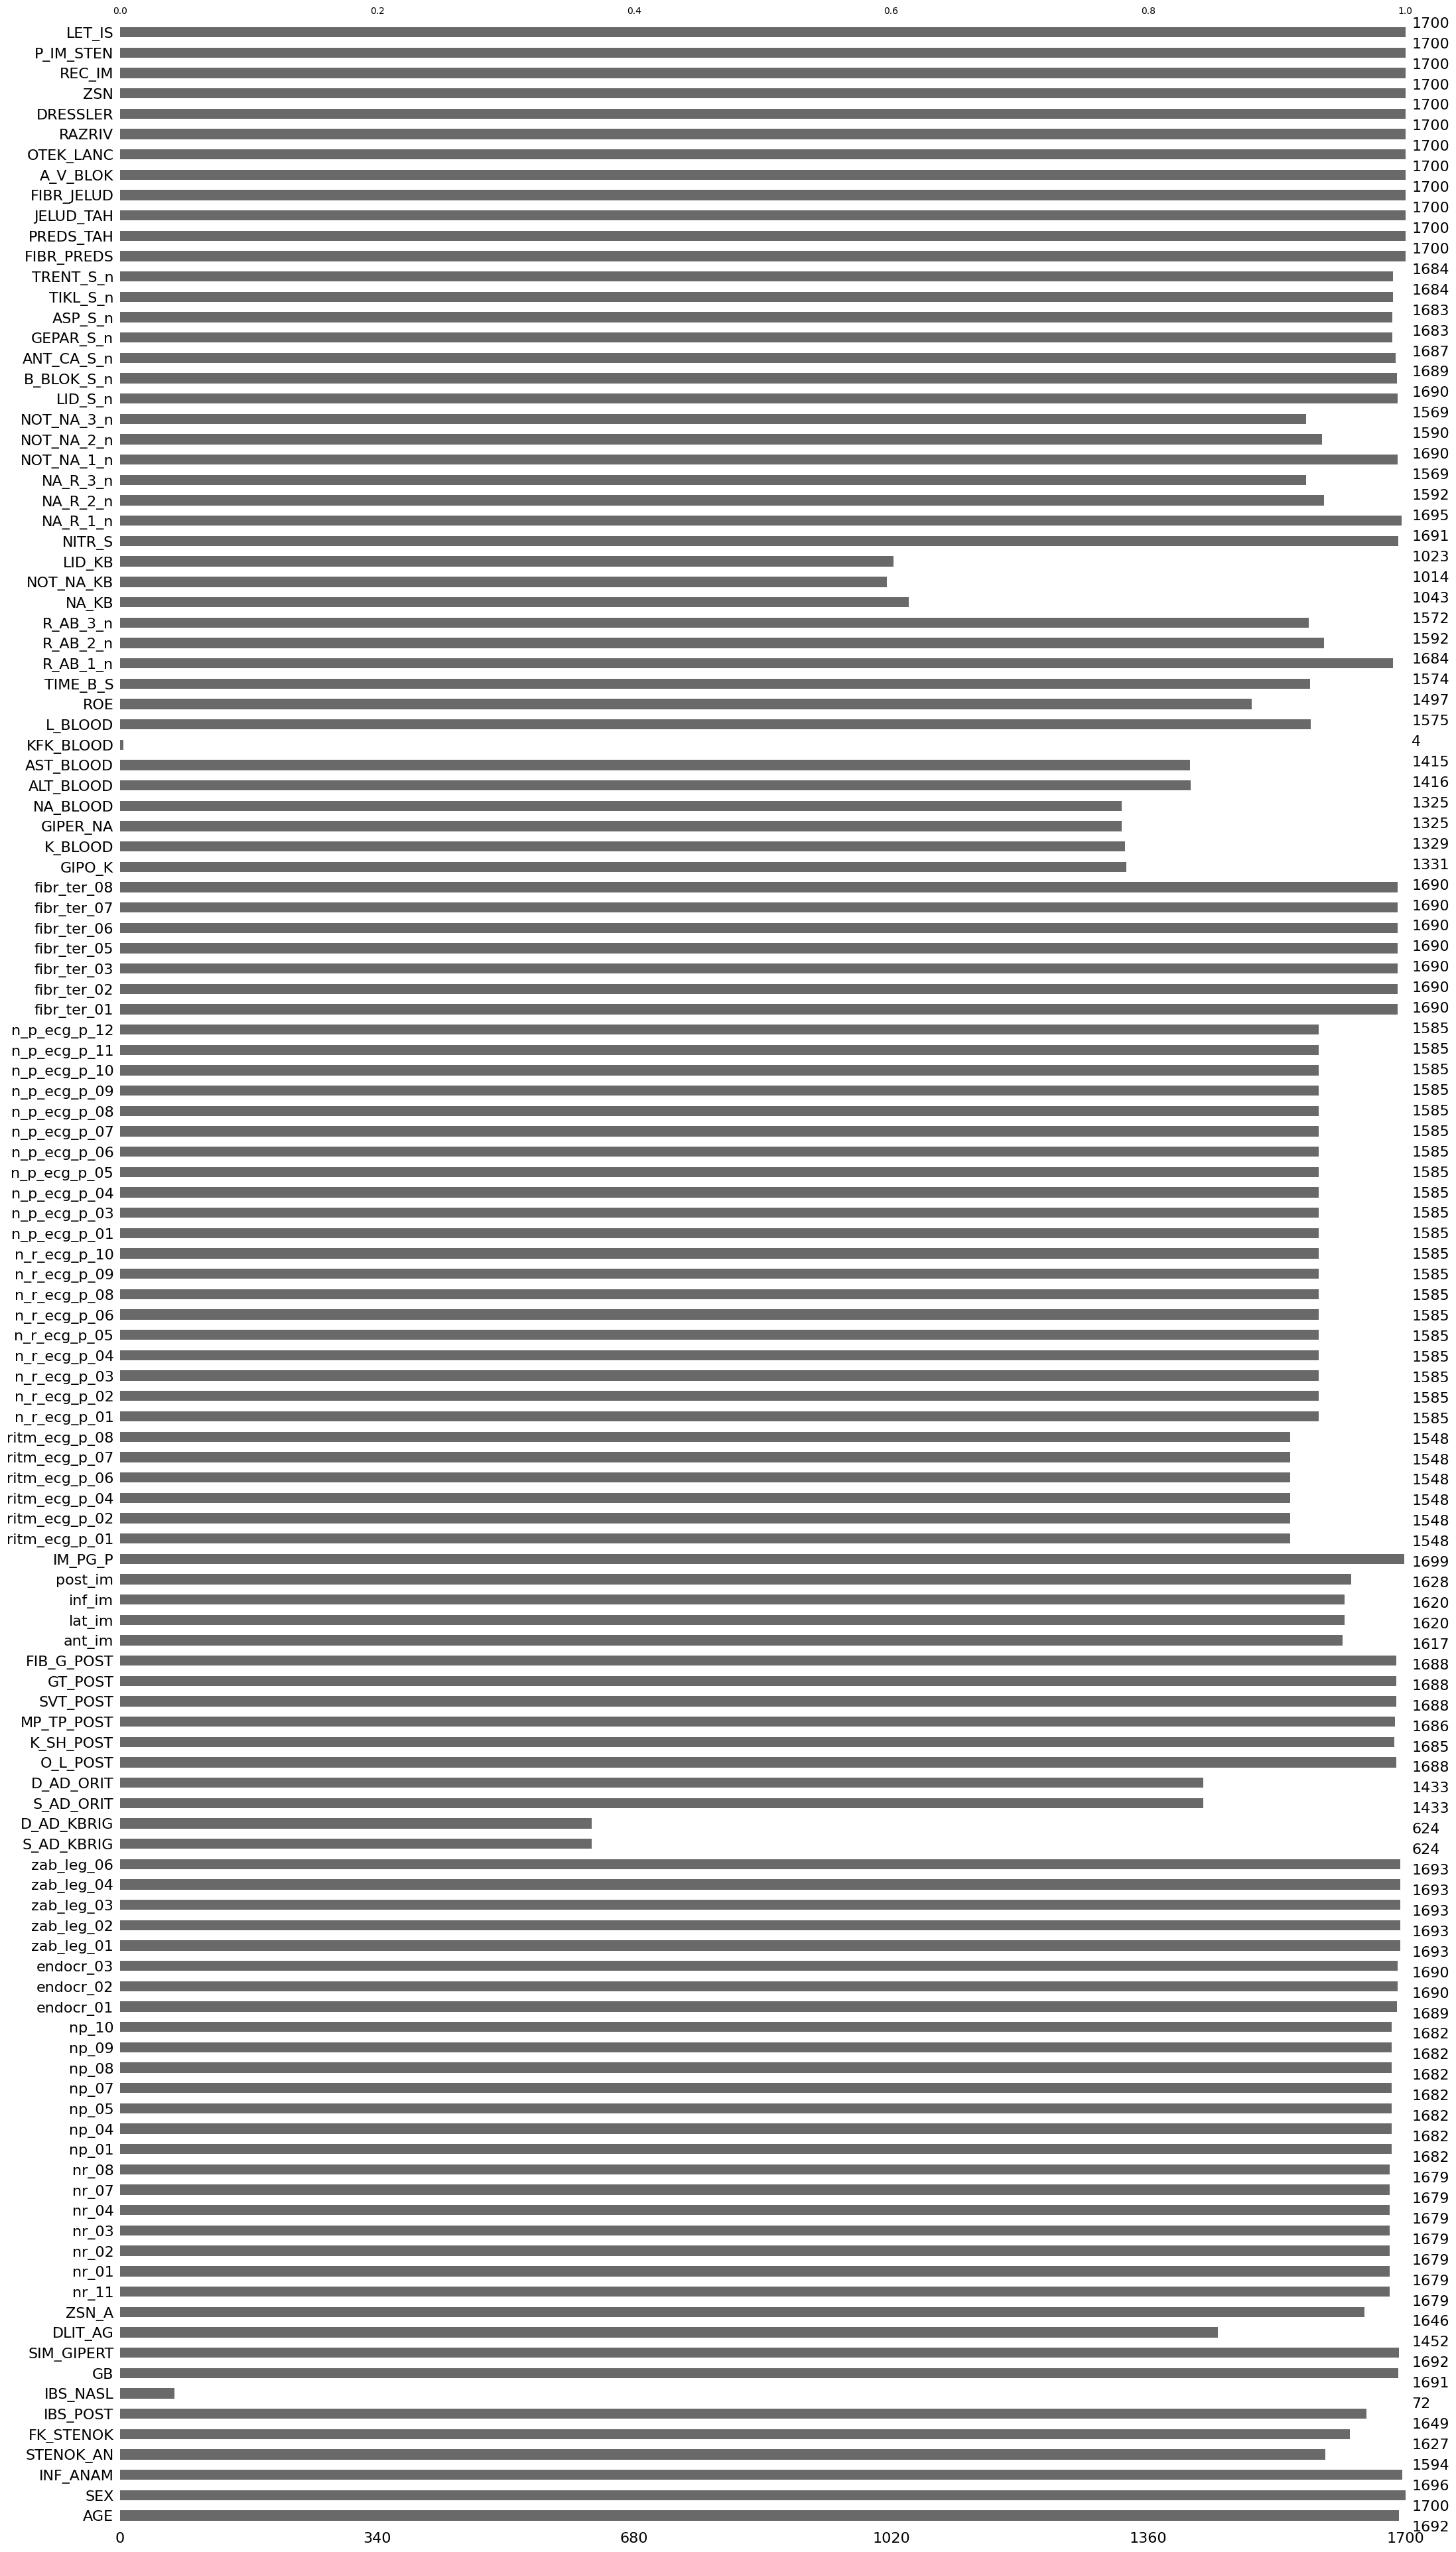

In [58]:
import missingno as msno
msno.bar(df)

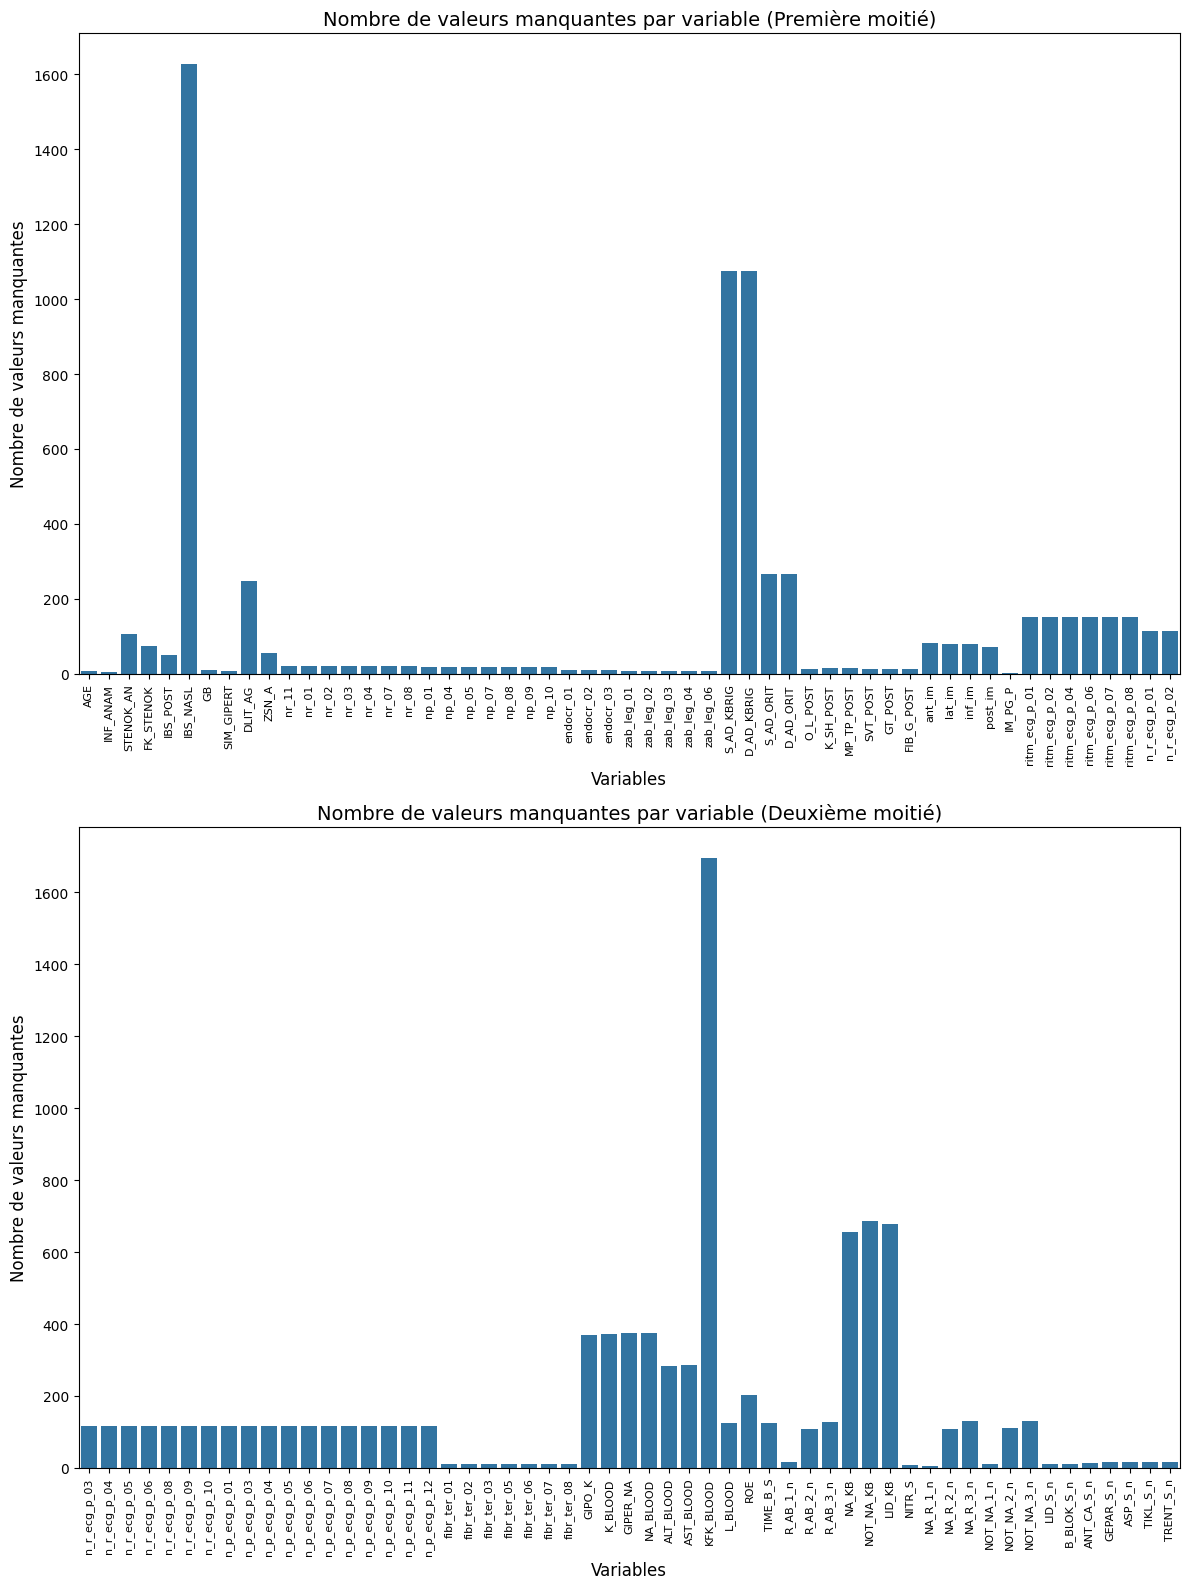

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
y = len(missing_values)


missing_values_first_half = missing_values[:int(y/2)]


missing_values_second_half = missing_values[int(y/2):]


fig, axes = plt.subplots(2, 1, figsize=(12, 16))


sns.barplot(x=missing_values_first_half.index, y=missing_values_first_half.values, ax=axes[0])
axes[0].set_title('Nombre de valeurs manquantes par variable (Première moitié)', fontsize=14)
axes[0].set_ylabel('Nombre de valeurs manquantes', fontsize=12)
axes[0].set_xlabel('Variables', fontsize=12)
axes[0].tick_params(axis='x', rotation=90, labelsize=8)

sns.barplot(x=missing_values_second_half.index, y=missing_values_second_half.values, ax=axes[1])
axes[1].set_title('Nombre de valeurs manquantes par variable (Deuxième moitié)', fontsize=14)
axes[1].set_ylabel('Nombre de valeurs manquantes', fontsize=12)
axes[1].set_xlabel('Variables', fontsize=12)
axes[1].tick_params(axis='x', rotation=90, labelsize=8)

plt.tight_layout()


plt.show()


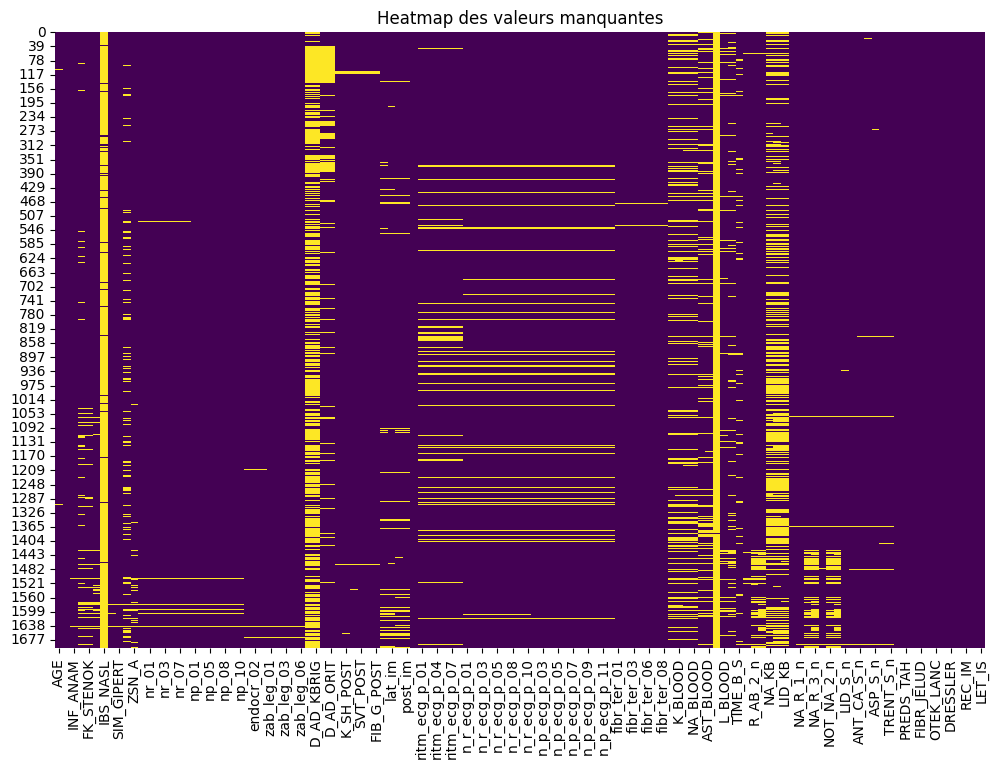

In [60]:
# Heatmap des valeurs manquantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs manquantes')
plt.show()


In [61]:
df.describe(include="all")

AGE          SEX     INF_ANAM    STENOK_AN    FK_STENOK  \
count  1692.000000  1700.000000  1696.000000  1594.000000  1627.000000   
mean     61.856974     0.626471     0.554835     2.316186     1.205286   
std      11.259936     0.483883     0.836801     2.440586     1.040814   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      54.000000     0.000000     0.000000     0.000000     0.000000   
50%      63.000000     1.000000     0.000000     1.000000     2.000000   
75%      70.000000     1.000000     1.000000     5.000000     2.000000   
max      92.000000     1.000000     3.000000     6.000000     4.000000   

          IBS_POST  IBS_NASL           GB   SIM_GIPERT      DLIT_AG  ...  \
count  1649.000000  72.00000  1691.000000  1692.000000  1452.000000  ...   
mean      1.160703   0.37500     1.393258     0.033688     3.340220  ...   
std       0.801400   0.48752     1.088803     0.180478     3.098646  ...   
min       0.000000   0.00000     0.000000     0.000000     0.000000  ...   
25%       0.000000   0.00000     0.000000     0.000000     0.000000  ...   
50%       1.000000   0.00000     2.000000     0.000000     3.000000  ...   
75%       2.000000   1.00000     2.000000     0.000000     7.000000  ...   
max       2.000000   1.00000     3.000000     1.000000     7.000000  ...   

         JELUD_TAH   FIBR_JELUD     A_V_BLOK    OTEK_LANC       RAZRIV  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean      0.024706     0.041765     0.033529     0.093529     0.031765   
std       0.155273     0.200110     0.180067     0.291259     0.175425   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          DRESSLER          ZSN       REC_IM    P_IM_STEN       LET_IS  
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000  
mean      0.044118     0.231765     0.093529     0.087059     0.477059  
std       0.205417     0.422084     0.291259     0.282004     1.381818  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     7.000000  

[8 rows x 123 columns]

## 3. Data Cleaning and Transformation

In [62]:
numerical_columns=["AGE","S_AD_KBRIG","D_AD_KBRIG","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD","ALT_BLOOD","AST_BLOOD","L_BLOOD","ROE","KFK_BLOOD"]

In [63]:



df_numerical = df[numerical_columns]


Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1


outliers = ((df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR)))

print(outliers.sum())


AGE             3
S_AD_KBRIG     12
D_AD_KBRIG     20
S_AD_ORIT      96
D_AD_ORIT     246
K_BLOOD        39
NA_BLOOD       55
ALT_BLOOD      96
AST_BLOOD      78
L_BLOOD        56
ROE            67
KFK_BLOOD       0
dtype: int64


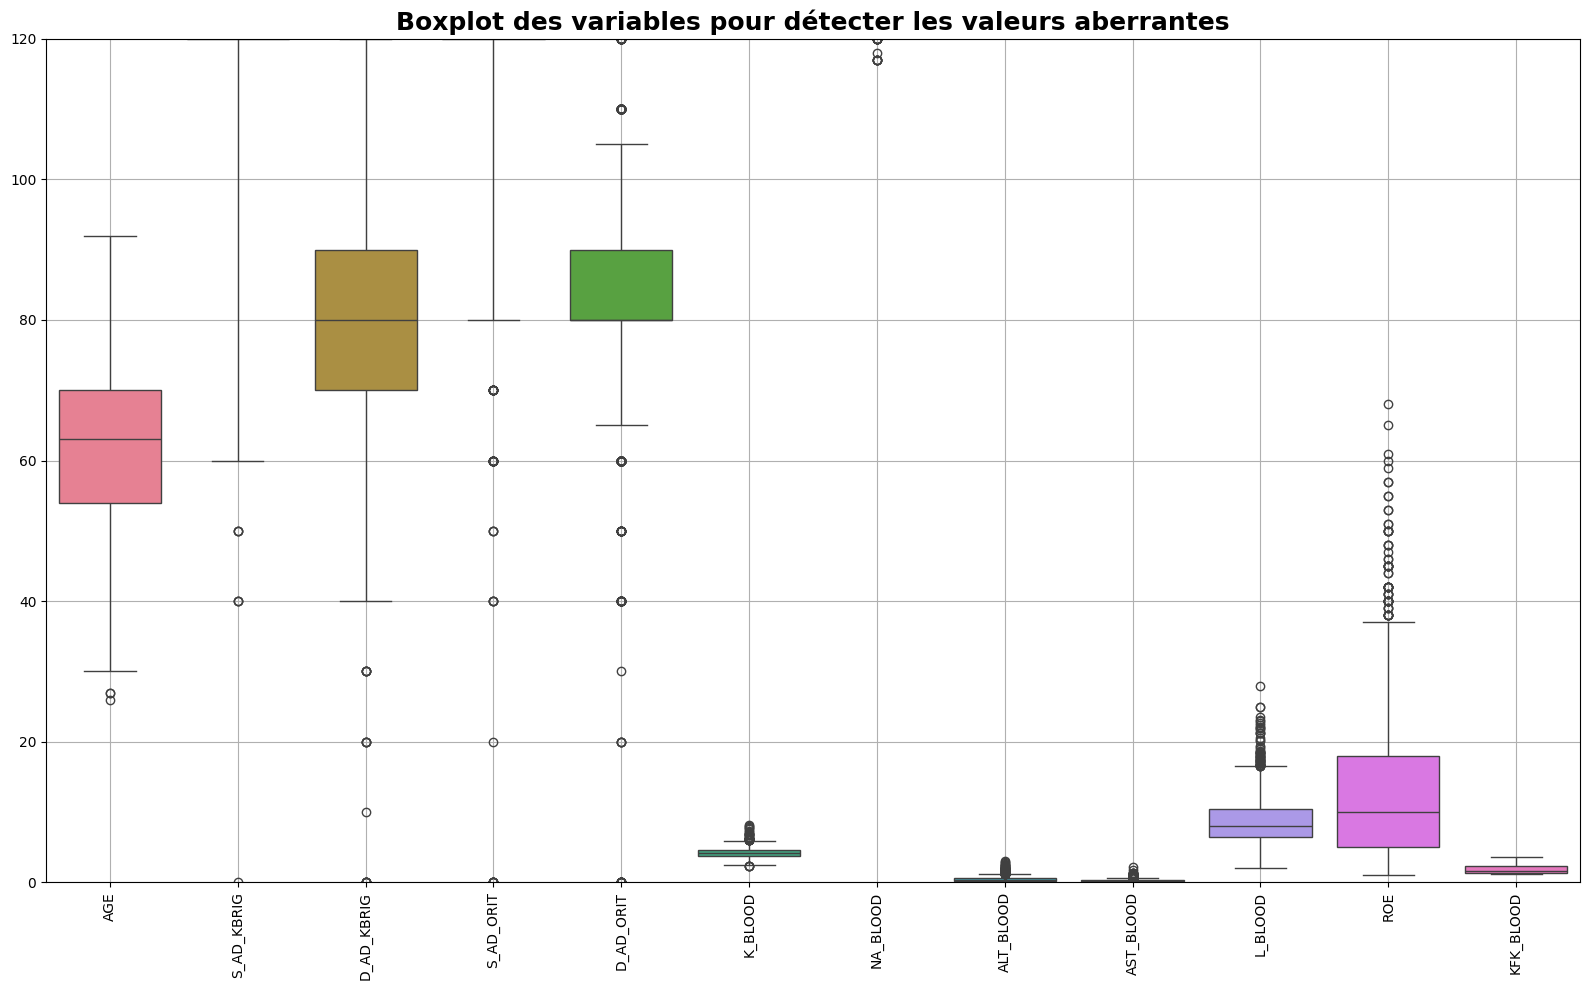

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt



df_numerical = df[numerical_columns]


plt.figure(figsize=(16, 10))


sns.boxplot(data=df_numerical)

plt.title('Boxplot des variables pour détecter les valeurs aberrantes', fontsize=18, weight='bold')


plt.xticks(rotation=90, fontsize=10)


plt.grid(True)


plt.ylim(0, 120)

plt.tight_layout()
plt.show()



In [65]:
import numpy as np

def replace_outliers_with_nan(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])




for column in numerical_columns:
    replace_outliers_with_nan(df, column)
    Q11 = df[column].quantile(0.25)
    Q33 = df[column].quantile(0.75)
    IQRR = Q33 - Q11
    outlierss = ((df[column] < (Q11 - 1.5 * IQRR)) | (df[column] > (Q33 + 1.5 * IQRR)))
   # print(outlierss.sum())

 #Recalculate outliers after replacement to confirm
outliers_after_replacement = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))
print(outliers_after_replacement.sum())  # Check if there are any remaining outliers




AGE           0
S_AD_KBRIG    0
D_AD_KBRIG    0
S_AD_ORIT     0
D_AD_ORIT     0
K_BLOOD       0
NA_BLOOD      0
ALT_BLOOD     0
AST_BLOOD     0
L_BLOOD       0
ROE           0
KFK_BLOOD     0
dtype: int64


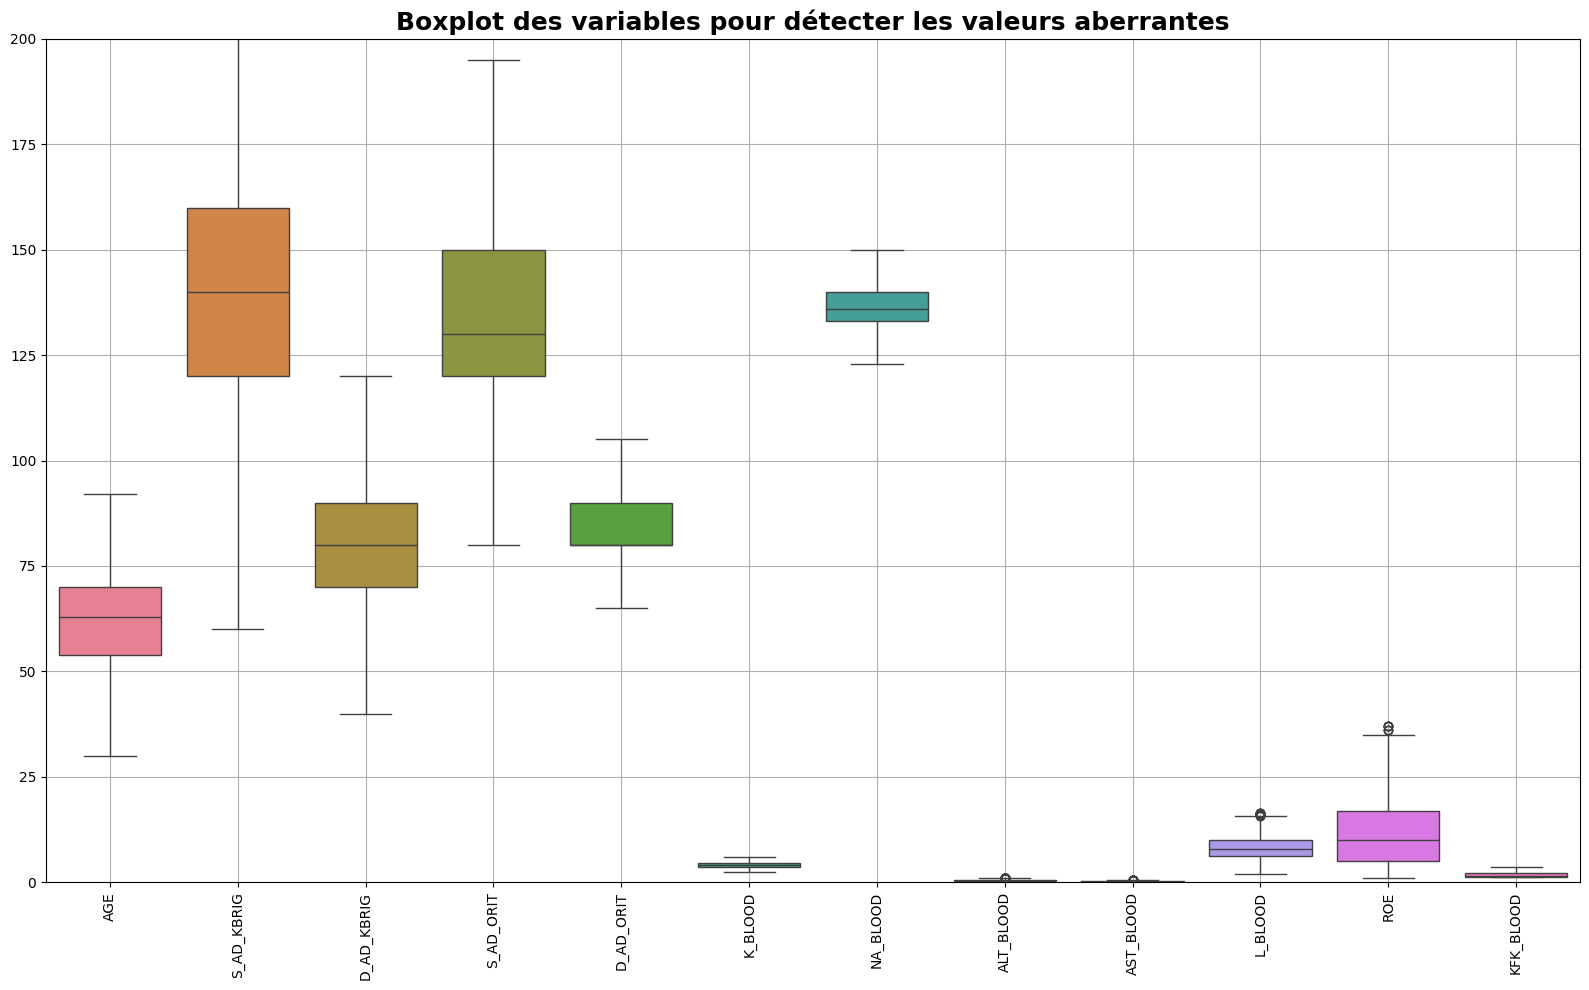

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt




df_numerical = df[numerical_columns]


plt.figure(figsize=(16, 10))


sns.boxplot(data=df_numerical)


plt.title('Boxplot des variables pour détecter les valeurs aberrantes', fontsize=18, weight='bold')


plt.xticks(rotation=90, fontsize=10)


plt.grid(True)


plt.ylim(0, 200)

plt.tight_layout()
plt.show()

In [67]:
##plus que 95% vide
df.drop("KFK_BLOOD", axis=1, inplace=True)
df.drop("IBS_NASL", axis=1, inplace=True)

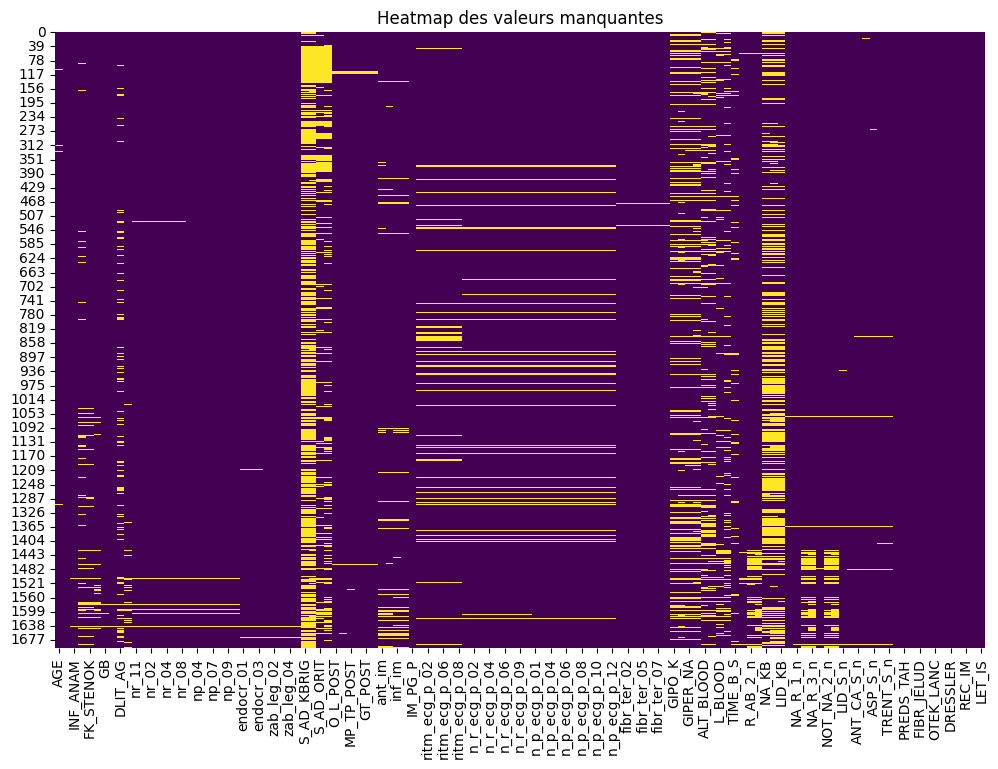

In [68]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs manquantes')
plt.show()

In [69]:
from sklearn.impute import KNNImputer

# Appliquer KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

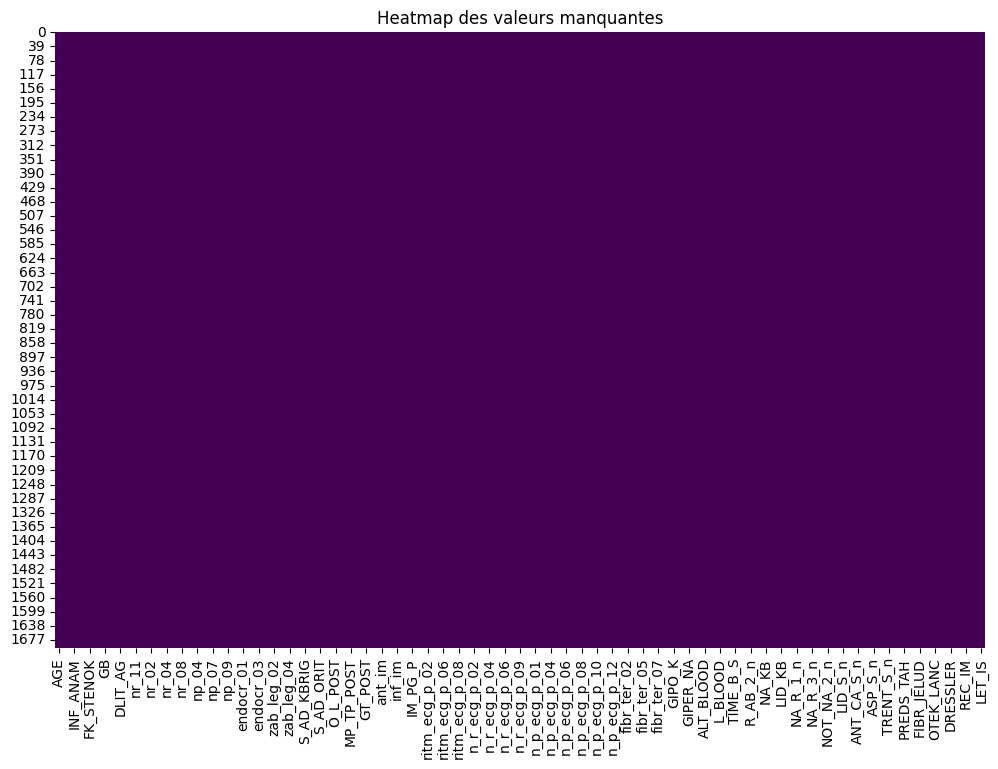

In [70]:
# Heatmap des valeurs manquantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs manquantes')
plt.show()

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
numerical_columns=["AGE","S_AD_KBRIG","D_AD_KBRIG","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD","ALT_BLOOD","AST_BLOOD","L_BLOOD","ROE"]

df_numeric = df[numerical_columns]


scaler = MinMaxScaler()


df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numerical_columns)


df[numerical_columns] = df_normalized


print(df.head())

        AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST   GB  SIM_GIPERT  \
0  0.758065  1.0       2.0        1.0        1.0       2.0  3.0         0.0   
1  0.403226  1.0       1.0        0.0        0.0       0.0  0.0         0.0   
2  0.354839  1.0       0.0        0.0        0.0       2.0  2.0         0.0   
3  0.612903  0.0       0.0        0.0        0.0       2.0  2.0         0.0   
4  0.483871  1.0       0.0        0.0        0.0       2.0  3.0         0.0   

   DLIT_AG  ZSN_A  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0      7.0    0.0  ...        0.0         0.0       0.0        0.0     0.0   
1      0.0    0.0  ...        0.0         0.0       0.0        0.0     0.0   
2      2.0    0.0  ...        0.0         0.0       0.0        0.0     0.0   
3      3.0    1.0  ...        0.0         0.0       0.0        0.0     0.0   
4      7.0    0.0  ...        0.0         0.0       0.0        0.0     0.0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0       0.

In [72]:

df.describe(include="all")

AGE          SEX     INF_ANAM    STENOK_AN    FK_STENOK  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean      0.514713     0.626471     0.555412     2.342824     1.216471   
std       0.179901     0.483883     0.835928     2.383369     1.026184   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.387097     0.000000     0.000000     0.000000     0.000000   
50%       0.532258     1.000000     0.000000     2.000000     2.000000   
75%       0.645161     1.000000     1.000000     5.000000     2.000000   
max       1.000000     1.000000     3.000000     6.000000     4.000000   

          IBS_POST           GB   SIM_GIPERT      DLIT_AG        ZSN_A  ...  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000  ...   
mean      1.165059     1.391882     0.033647     3.363882     0.200941  ...   
std       0.792150     1.086535     0.180111     2.939666     0.652752  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.800000     0.000000     0.000000     0.000000     0.000000  ...   
50%       1.000000     2.000000     0.000000     3.000000     0.000000  ...   
75%       2.000000     2.000000     0.000000     7.000000     0.000000  ...   
max       2.000000     3.000000     1.000000     7.000000     4.000000  ...   

         JELUD_TAH   FIBR_JELUD     A_V_BLOK    OTEK_LANC       RAZRIV  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean      0.024706     0.041765     0.033529     0.093529     0.031765   
std       0.155273     0.200110     0.180067     0.291259     0.175425   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          DRESSLER          ZSN       REC_IM    P_IM_STEN       LET_IS  
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000  
mean      0.044118     0.231765     0.093529     0.087059     0.477059  
std       0.205417     0.422084     0.291259     0.282004     1.381818  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     7.000000  

[8 rows x 121 columns]

In [73]:
df

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST   GB  \
0     0.758065  1.0       2.0        1.0        1.0       2.0  3.0   
1     0.403226  1.0       1.0        0.0        0.0       0.0  0.0   
2     0.354839  1.0       0.0        0.0        0.0       2.0  2.0   
3     0.612903  0.0       0.0        0.0        0.0       2.0  2.0   
4     0.483871  1.0       0.0        0.0        0.0       2.0  3.0   
...        ...  ...       ...        ...        ...       ...  ...   
1695  0.758065  0.0       0.0        4.0        2.0       1.0  2.0   
1696  0.645161  0.0       0.0        6.0        2.0       1.0  2.0   
1697  0.403226  1.0       3.0        6.0        2.0       2.0  0.0   
1698  0.790323  0.0       2.0        2.0        2.0       1.0  2.0   
1699  0.532258  1.0       2.0        4.4        2.2       1.4  2.0   

      SIM_GIPERT  DLIT_AG  ZSN_A  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  \
0            0.0      7.0    0.0  ...        0.0         0.0       0.0   
1            0.0      0.0    0.0  ...        0.0         0.0       0.0   
2            0.0      2.0    0.0  ...        0.0         0.0       0.0   
3            0.0      3.0    1.0  ...        0.0         0.0       0.0   
4            0.0      7.0    0.0  ...        0.0         0.0       0.0   
...          ...      ...    ...  ...        ...         ...       ...   
1695         0.0      7.0    0.0  ...        0.0         0.0       1.0   
1696         0.0      7.0    0.0  ...        0.0         0.0       0.0   
1697         0.0      0.0    0.0  ...        0.0         0.0       0.0   
1698         0.0      7.0    0.0  ...        0.0         0.0       0.0   
1699         0.0      5.6    4.0  ...        0.0         0.0       0.0   

      OTEK_LANC  RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0           0.0     0.0       0.0  0.0     0.0        0.0     0.0  
1           0.0     0.0       0.0  0.0     0.0        0.0     0.0  
2           0.0     0.0       0.0  0.0     0.0        0.0     0.0  
3           0.0     0.0       0.0  1.0     0.0        0.0     0.0  
4           0.0     0.0       0.0  0.0     0.0        0.0     0.0  
...         ...     ...       ...  ...     ...        ...     ...  
1695        0.0     1.0       0.0  0.0     0.0        0.0     3.0  
1696        0.0     0.0       0.0  0.0     0.0        0.0     1.0  
1697        0.0     0.0       0.0  0.0     1.0        0.0     6.0  
1698        1.0     0.0       0.0  0.0     0.0        0.0     1.0  
1699        0.0     0.0       0.0  0.0     0.0        0.0     1.0  

[1700 rows x 121 columns]

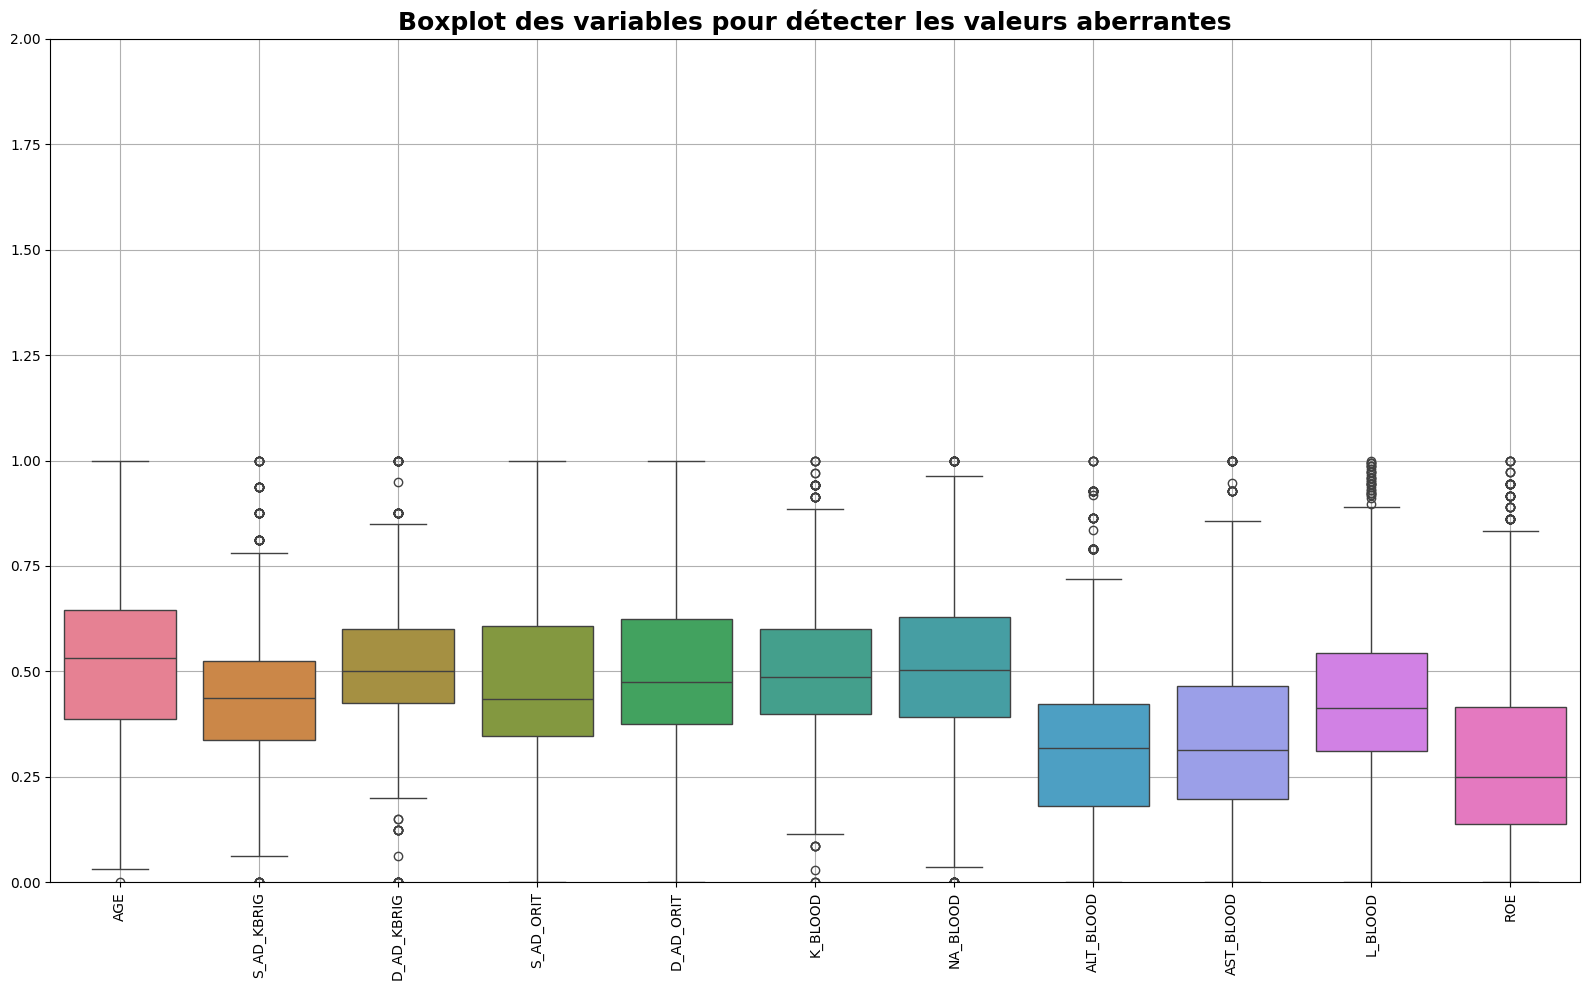

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 10))


sns.boxplot(data=df_normalized)


plt.title('Boxplot des variables pour détecter les valeurs aberrantes', fontsize=18, weight='bold')


plt.xticks(rotation=90, fontsize=10)


plt.grid(True)


plt.ylim(0, 2)


plt.tight_layout()
plt.show()

##Reduction du demension pour le modele

In [75]:
from sklearn.decomposition import PCA
df_features = pd.read_csv('datasetFeatures.csv', delimiter=';')
df_features.drop("KFK_BLOOD", axis=1, inplace=True)
df_features.drop("IBS_NASL", axis=1, inplace=True)
features=df_features.columns

In [76]:

pca = PCA(n_components=0.95)
df_to_reduce=df[features]
df_reduced = pca.fit_transform(df_to_reduce[numerical_columns])


print("Nouvelle forme du dataset après PCA:", df_reduced.shape)

df_reduced = pd.DataFrame(df_reduced)


print(df_reduced.head())

Nouvelle forme du dataset après PCA: (1700, 10)
          0         1         2         3         4         5         6  \
0  0.530184  0.024838  0.066864  0.114335  0.162691 -0.030641  0.194069   
1 -0.157359 -0.032095 -0.274541 -0.235256  0.174112 -0.150915  0.072809   
2  0.525908 -0.037702 -0.277379 -0.163754  0.206657  0.114432 -0.232592   
3 -0.573520  0.260052  0.082041  0.224152  0.007271  0.050054  0.244914   
4  0.387567  0.049722  0.005099 -0.264842 -0.175432  0.152939 -0.201943   

          7         8         9  
0  0.124828  0.069785  0.113132  
1  0.006223 -0.064461 -0.111750  
2  0.071018  0.040673  0.047924  
3  0.003977 -0.266060  0.224148  
4  0.018068 -0.065891  0.005423  


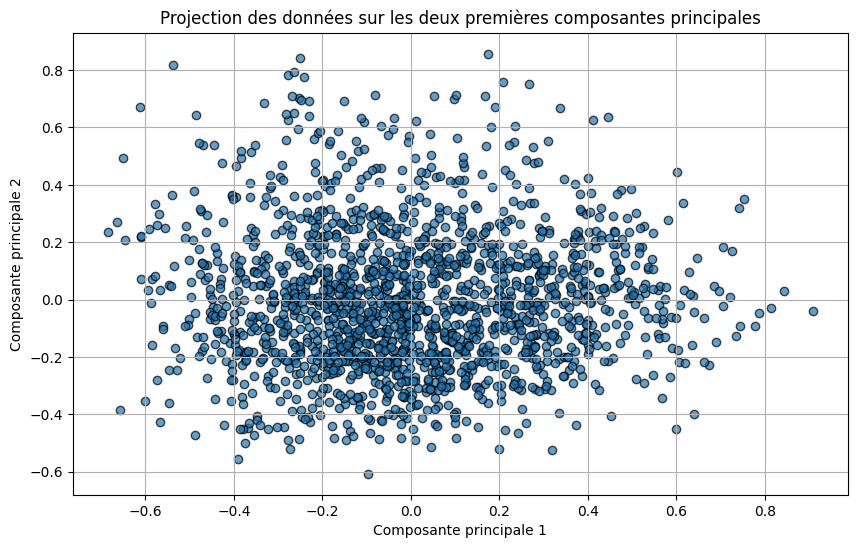

In [77]:

import matplotlib.pyplot as plt


if df_reduced.shape[1] >= 2:
    plt.figure(figsize=(10, 6))


    plt.scatter(df_reduced.iloc[:, 0], df_reduced.iloc[:, 1], alpha=0.7, edgecolors='k')

    plt.title("Projection des données sur les deux premières composantes principales")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.grid()
    plt.show()
else:
    print("Le DataFrame réduit n'a pas assez de composantes pour la visualisation.")


##exporter le donne

In [78]:
with open("datasetFinal.csv", "w", newline="") as f:
    df.to_csv(f, index=False)
    print("Les données ont été exportées avec succès")


Les données ont été exportées avec succès
